### PERSIAPAN DATA


In [1]:
import pandas as pd
import numpy as np

In [2]:
# Membaca file CSV dari lokasi di drive D
file_path = 'D:\skripsi - Copy\code\Data Labelling Bert'
data_review = pd.read_csv(file_path)

# Menampilkan 5 baris pertama dari data
print(data_review.head())

                                              ulasan     label
0  Tolong dong min, makin lama shopee makin lemot...  negative
1  Shopee yg skrng enggak banget, aku atur pengin...  negative
2  Penarikan dana penjual ke rekening penjual sek...  negative
3  Makin kesini loadingnya makin ga karuan. Mau b...  negative
4  Saran: untuk jual, alangkah baiknya ditambah u...   neutral


In [3]:
data_review.head(10)

,ulasan,label
0,"Tolong dong min, makin lama shopee makin lemot...",negative
1,"Shopee yg skrng enggak banget, aku atur pengin...",negative
2,Penarikan dana penjual ke rekening penjual sek...,negative
3,Makin kesini loadingnya makin ga karuan. Mau b...,negative
4,"Saran: untuk jual, alangkah baiknya ditambah u...",neutral
5,Sangat suka belanja disini..ini aplikasi belan...,positive
6,Tolong ya buat shopee untuk pemesanan pelangga...,negative
7,"Kalau dishopee sendiri sih bagus,aman dan terp...",negative
8,"Aplikasi sangat sangat baik, respon call cente...",negative
9,Wah ini aplikasi bener2 parah. Bikin dompet ke...,negative


In [4]:
# Hitung jumlah ulasan per label
label_counts = data_review['label'].value_counts()

# Menampilkan jumlah untuk setiap kategori
jumlah_positif = label_counts.get('positive', 0)
jumlah_netral = label_counts.get('neutral', 0)
jumlah_negatif = label_counts.get('negative', 0)

print(f"Jumlah Positif: {jumlah_positif}")
print(f"Jumlah Netral: {jumlah_netral}")
print(f"Jumlah Negatif: {jumlah_negatif}")

Jumlah Positif: 16826
Jumlah Netral: 3394
Jumlah Negatif: 29780


In [5]:
len(data_review)

50000

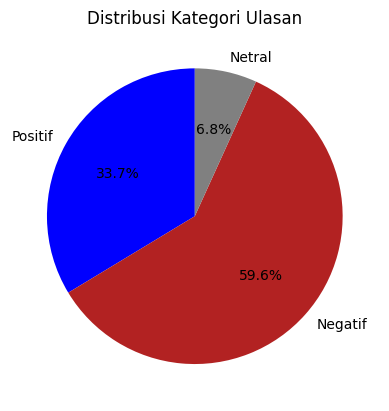

In [6]:
import matplotlib.pyplot as plt

# Data untuk pie chart
labels_balance = [jumlah_positif, jumlah_negatif, jumlah_netral]
labels = ["Positif", "Negatif", "Netral"]

# Membuat pie chart
plt.pie(labels_balance,
        startangle=90,
        colors=['blue', 'firebrick', 'gray'],
        labels=labels,
        autopct="%1.1f%%")

# Menambahkan judul
plt.title("Distribusi Kategori Ulasan")

# Menampilkan pie chart
plt.show()

#### EDA



Tujuan dilakukannya eksplorasi data adalah untuk mengetahui kondisi atau kualitas dari data.
Pada dataset yang digunakan terdapat data numerik yaitu label. Tim akan melihat analisis statistik dari data label tersebut.


In [7]:
# menampilkan info deskripsi dataset
data_review.describe(include='all')

,ulasan,label
count,50000,50000
unique,49908,3
top,Terlalu banyak iklan,negative
freq,22,29780


### PRA-PROCESSING DATA

#### CLEANING DATASET

In [8]:
data_review_copy = data_review.copy()

In [9]:
import re

def clean_text(text):
    # Menghapus http/https (link)
    text = re.sub(r'(?:http?\://|https?\://|www\.)\S+', '', text)
    # Menghapus karakter HTML
    text = re.sub(r'<.*?>', '', text)
    # Menghilangkan tanda baca dan karakter khusus
    text = re.sub(r'[^\w\s]', ' ', text)  # Ini akan menghapus sebagian besar tanda baca tetapi menyisakan underscore
    # Menghapus angka
    text = re.sub(r'\d+', ' ', text)
    # Menghapus karakter underscore
    text = re.sub(r'_', ' ', text)
    # Mengganti line baru dengan spasi
    text = re.sub(r'\n', ' ', text)
    # Menghapus spasi berlebihan
    text = re.sub(r'\s+', ' ', text).strip()
    return text

In [10]:
# Apply the function to the 'ulasan' column
data_review_copy['Cleaning Text'] = data_review_copy['ulasan'].apply(clean_text)

In [11]:
data_review_copy

,ulasan,label,Cleaning Text
0,"Tolong dong min, makin lama shopee makin lemot...",negative,Tolong dong min makin lama shopee makin lemot ...
1,"Shopee yg skrng enggak banget, aku atur pengin...",negative,Shopee yg skrng enggak banget aku atur penging...
2,Penarikan dana penjual ke rekening penjual sek...,negative,Penarikan dana penjual ke rekening penjual sek...
3,Makin kesini loadingnya makin ga karuan. Mau b...,negative,Makin kesini loadingnya makin ga karuan Mau bu...
4,"Saran: untuk jual, alangkah baiknya ditambah u...",neutral,Saran untuk jual alangkah baiknya ditambah unt...
...,...,...,...
49995,aplikasi Shopee sangat membantu sekali kalau s...,positive,aplikasi Shopee sangat membantu sekali kalau s...
49996,"sangat jelek, foto produk saya dicuri sama sel...",negative,sangat jelek foto produk saya dicuri sama sell...
49997,Penjual nya kayak butuh gak butuh.....lamaa ba...,negative,Penjual nya kayak butuh gak butuh lamaa banget...
49998,"Banyak penjualnya yg ngk amanah, misalnya jual...",positive,Banyak penjualnya yg ngk amanah misalnya jual ...


#### NORMALISASI DATA

##### 1. Mengubah menjadi lower case


In [12]:
# Function to perform case folding
def casefoldingText(ulasan):
    ulasan = ulasan.lower()
    return ulasan

In [13]:
data_review_copy['Case Folding'] = data_review_copy['Cleaning Text'].apply(casefoldingText)

In [14]:
data_review_copy

,ulasan,label,Cleaning Text,Case Folding
0,"Tolong dong min, makin lama shopee makin lemot...",negative,Tolong dong min makin lama shopee makin lemot ...,tolong dong min makin lama shopee makin lemot ...
1,"Shopee yg skrng enggak banget, aku atur pengin...",negative,Shopee yg skrng enggak banget aku atur penging...,shopee yg skrng enggak banget aku atur penging...
2,Penarikan dana penjual ke rekening penjual sek...,negative,Penarikan dana penjual ke rekening penjual sek...,penarikan dana penjual ke rekening penjual sek...
3,Makin kesini loadingnya makin ga karuan. Mau b...,negative,Makin kesini loadingnya makin ga karuan Mau bu...,makin kesini loadingnya makin ga karuan mau bu...
4,"Saran: untuk jual, alangkah baiknya ditambah u...",neutral,Saran untuk jual alangkah baiknya ditambah unt...,saran untuk jual alangkah baiknya ditambah unt...
...,...,...,...,...
49995,aplikasi Shopee sangat membantu sekali kalau s...,positive,aplikasi Shopee sangat membantu sekali kalau s...,aplikasi shopee sangat membantu sekali kalau s...
49996,"sangat jelek, foto produk saya dicuri sama sel...",negative,sangat jelek foto produk saya dicuri sama sell...,sangat jelek foto produk saya dicuri sama sell...
49997,Penjual nya kayak butuh gak butuh.....lamaa ba...,negative,Penjual nya kayak butuh gak butuh lamaa banget...,penjual nya kayak butuh gak butuh lamaa banget...
49998,"Banyak penjualnya yg ngk amanah, misalnya jual...",positive,Banyak penjualnya yg ngk amanah misalnya jual ...,banyak penjualnya yg ngk amanah misalnya jual ...


# 2. Tokenizing

In [15]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [16]:
# Fungsi untuk tokenisasi teks
def tokenize_text(text):
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts([text])
    word_index = tokenizer.word_index
    tokens = list(word_index.keys())
    return tokens

In [17]:
data_review_copy['Tokenizing'] = data_review_copy['Case Folding'].apply(tokenize_text)

In [18]:
data_review_copy.head()

,ulasan,label,Cleaning Text,Case Folding,Tokenizing
0,"Tolong dong min, makin lama shopee makin lemot...",negative,Tolong dong min makin lama shopee makin lemot ...,tolong dong min makin lama shopee makin lemot ...,"[makin, shopee, lemot, sekali, mau, bagus, tol..."
1,"Shopee yg skrng enggak banget, aku atur pengin...",negative,Shopee yg skrng enggak banget aku atur penging...,shopee yg skrng enggak banget aku atur penging...,"[flash, sale, nggak, nya, sama, yg, tp, pas, a..."
2,Penarikan dana penjual ke rekening penjual sek...,negative,Penarikan dana penjual ke rekening penjual sek...,penarikan dana penjual ke rekening penjual sek...,"[jam, dana, penjual, ke, rekening, sekarang, s..."
3,Makin kesini loadingnya makin ga karuan. Mau b...,negative,Makin kesini loadingnya makin ga karuan Mau bu...,makin kesini loadingnya makin ga karuan mau bu...,"[makin, di, atau, nya, kesini, loadingnya, ga,..."
4,"Saran: untuk jual, alangkah baiknya ditambah u...",neutral,Saran untuk jual alangkah baiknya ditambah unt...,saran untuk jual alangkah baiknya ditambah unt...,"[untuk, alamat, toko, dari, satu, saran, jual,..."


## Normalisasi Slangword dan Singkatan

In [228]:
# Read the content of the file
file_path_slang = 'D:\skripsi - Copy\code\slangwords.txt'

with open(file_path_slang, 'r') as file:
    file_content = file.read()

In [229]:
import ast

# Mengekstrak Bagian Kamus
start_index = file_content.find('{')
end_index = file_content.rfind('}') + 1
dict_part = file_content[start_index:end_index]

# Evaluasi Kamus Menggunakan ast.literal_eval
slang_dict = ast.literal_eval(dict_part)

In [230]:
# Print the resulting dictionary
print(slang_dict)

{'@': 'di', 'abis': 'habis', 'ad': 'ada', 'adlh': 'adalah', 'afaik': 'as far as i know', 'ahaha': 'haha', 'aj': 'saja', 'ajep ajep': 'dunia gemerlap', 'ak': 'saya', 'akika': 'aku', 'akkoh': 'aku', 'akuwh': 'aku', 'alay': 'norak', 'alow': 'halo', 'ambilin': 'ambilkan', 'ancur': 'hancur', 'anjrit': 'anjing', 'anter': 'antar', 'ap2': 'apa apa', 'apasih': 'apa sih', 'apes': 'sial', 'aps': 'apa', 'aq': 'saya', 'aquwh': 'aku', 'asbun': 'asal bunyi', 'aseekk': 'asyik', 'asekk': 'asyik', 'asem': 'asam', 'aspal': 'asli tetapi palsu', 'astul': 'asal tulis', 'ato': 'atau', 'au ah': 'tidak mau tahu', 'awak': 'saya', 'ay': 'sayang', 'ayank': 'sayang', 'b4': 'sebelum', 'bakalan': 'akan', 'bandes': 'bantuan desa', 'bangedh': 'banget', 'banpol': 'bantuan polisi', 'banpur': 'bantuan tempur', 'basbang': 'basi', 'bcanda': 'bercanda', 'bdg': 'bandung', 'begajulan': 'nakal', 'beliin': 'belikan', 'bencong': 'banci', 'bentar': 'sebentar', 'ber3': 'bertiga', 'beresin': 'membereskan', 'bete': 'bosan', 'beud': 

In [231]:
# Definisikan fungsi untuk normalisasi slang
def normalize_with_slang(tokens):
    normalize_tokens = []
    for token in tokens:
        # Periksa apakah token tersebut adalah slang
        if token in slang_dict:
            # Jika iya, ganti dengan kata slang yang sesuai dari kamus
            normalize_tokens.append(slang_dict[token])
        else:
            normalize_tokens.append(token)
    return normalize_tokens

In [232]:
check_words = ["bgt", "bgs"]

# Check if the string is in the dictionary
for word in check_words:
  if word in slang_dict:
      print(f"{word} is present in the dictionary.")
      # You can also access the corresponding value if needed
      value_for_search_string = slang_dict[word]
      print(f"Value for {word}: {value_for_search_string}")
  else:
      print(f"{word} is not present in the dictionary.")

bgt is present in the dictionary.
Value for bgt: banget
bgs is present in the dictionary.
Value for bgs: bagus


In [233]:
# Menerapkan normalisasi slang pada setiap token dalam data
data_review_copy['Normalisasi Slangword dan Singkatan'] = data_review_copy['Tokenizing'].apply(normalize_with_slang)

In [234]:
data_review_copy

,ulasan,label,Cleaning Text,Case Folding,Tokenizing,Normalisasi Slangword dan Singkatan
0,"Tolong dong min, makin lama shopee makin lemot...",negative,Tolong dong min makin lama shopee makin lemot ...,tolong dong min makin lama shopee makin lemot ...,"[tolong, dong, min, makin, lama, shopee, makin...","[tolong, dong, min, makin, lama, shopee, makin..."
1,"Shopee yg skrng enggak banget, aku atur pengin...",negative,Shopee yg skrng enggak banget aku atur penging...,shopee yg skrng enggak banget aku atur penging...,"[shopee, yg, skrng, enggak, banget, aku, atur,...","[shopee, yang, sekarang, tidak, banget, aku, a..."
2,Penarikan dana penjual ke rekening penjual sek...,negative,Penarikan dana penjual ke rekening penjual sek...,penarikan dana penjual ke rekening penjual sek...,"[penarikan, dana, penjual, ke, rekening, penju...","[penarikan, dana, penjual, ke, rekening, penju..."
3,Makin kesini loadingnya makin ga karuan. Mau b...,negative,Makin kesini loadingnya makin ga karuan Mau bu...,makin kesini loadingnya makin ga karuan mau bu...,"[makin, kesini, loadingnya, makin, ga, karuan,...","[makin, kesini, menunggu, makin, ga, karuan, m..."
4,"Saran: untuk jual, alangkah baiknya ditambah u...",neutral,Saran untuk jual alangkah baiknya ditambah unt...,saran untuk jual alangkah baiknya ditambah unt...,"[saran, untuk, jual, alangkah, baiknya, ditamb...","[saran, untuk, jual, alangkah, baiknya, ditamb..."
...,...,...,...,...,...,...
49995,aplikasi Shopee sangat membantu sekali kalau s...,positive,aplikasi Shopee sangat membantu sekali kalau s...,aplikasi shopee sangat membantu sekali kalau s...,"[aplikasi, shopee, sangat, membantu, sekali, k...","[aplikasi, shopee, sangat, membantu, sekali, k..."
49996,"sangat jelek, foto produk saya dicuri sama sel...",negative,sangat jelek foto produk saya dicuri sama sell...,sangat jelek foto produk saya dicuri sama sell...,"[sangat, jelek, foto, produk, saya, dicuri, sa...","[sangat, jelek, foto, produk, saya, dicuri, sa..."
49997,Penjual nya kayak butuh gak butuh.....lamaa ba...,negative,Penjual nya kayak butuh gak butuh lamaa banget...,penjual nya kayak butuh gak butuh lamaa banget...,"[penjual, nya, kayak, butuh, gak, butuh, lamaa...","[penjual, nya, kayak, butuh, gak, butuh, lamaa..."
49998,"Banyak penjualnya yg ngk amanah, misalnya jual...",positive,Banyak penjualnya yg ngk amanah misalnya jual ...,banyak penjualnya yg ngk amanah misalnya jual ...,"[banyak, penjualnya, yg, ngk, amanah, misalnya...","[banyak, penjualnya, yang, ngk, amanah, misaln..."


#4. Remove Stopwords

In [235]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
# Download stopwords bahasa Indonesia jika belum diunduh
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\anasafira\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\anasafira\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [236]:
# Mengambil daftar stopwords bahasa Indonesia
stopwords_indonesia = set(stopwords.words('indonesian'))

def remove_stopwords(tokens):
    filtered_tokens = [token for token in tokens if token.lower() not in stopwords_indonesia]
    return filtered_tokens

# Contoh penggunaan:
tokenized_text = ["Ini", "adalah", "contoh", "teks", "yang", "akan", "dihapus", "stopwords-nya"]
cleaned_tokens = remove_stopwords(tokenized_text)
print(cleaned_tokens)

['contoh', 'teks', 'dihapus', 'stopwords-nya']


In [237]:
# Menerapkan fungsi remove_stopwords pada kolom 'ulasan'
data_review_copy['Stopword Removal'] = data_review_copy['Normalisasi Slangword dan Singkatan'].apply(remove_stopwords)

In [238]:
data_review_copy

,ulasan,label,Cleaning Text,Case Folding,Tokenizing,Normalisasi Slangword dan Singkatan,Stopword Removal
0,"Tolong dong min, makin lama shopee makin lemot...",negative,Tolong dong min makin lama shopee makin lemot ...,tolong dong min makin lama shopee makin lemot ...,"[tolong, dong, min, makin, lama, shopee, makin...","[tolong, dong, min, makin, lama, shopee, makin...","[tolong, min, shopee, lelet, lihat, barang, ga..."
1,"Shopee yg skrng enggak banget, aku atur pengin...",negative,Shopee yg skrng enggak banget aku atur penging...,shopee yg skrng enggak banget aku atur penging...,"[shopee, yg, skrng, enggak, banget, aku, atur,...","[shopee, yang, sekarang, tidak, banget, aku, a...","[shopee, banget, atur, pengingat, flash, sale,..."
2,Penarikan dana penjual ke rekening penjual sek...,negative,Penarikan dana penjual ke rekening penjual sek...,penarikan dana penjual ke rekening penjual sek...,"[penarikan, dana, penjual, ke, rekening, penju...","[penarikan, dana, penjual, ke, rekening, penju...","[penarikan, dana, penjual, rekening, penjual, ..."
3,Makin kesini loadingnya makin ga karuan. Mau b...,negative,Makin kesini loadingnya makin ga karuan Mau bu...,makin kesini loadingnya makin ga karuan mau bu...,"[makin, kesini, loadingnya, makin, ga, karuan,...","[makin, kesini, menunggu, makin, ga, karuan, m...","[kesini, menunggu, ga, karuan, buka, laptop, a..."
4,"Saran: untuk jual, alangkah baiknya ditambah u...",neutral,Saran untuk jual alangkah baiknya ditambah unt...,saran untuk jual alangkah baiknya ditambah unt...,"[saran, untuk, jual, alangkah, baiknya, ditamb...","[saran, untuk, jual, alangkah, baiknya, ditamb...","[saran, jual, alangkah, baiknya, ditambah, ala..."
...,...,...,...,...,...,...,...
49995,aplikasi Shopee sangat membantu sekali kalau s...,positive,aplikasi Shopee sangat membantu sekali kalau s...,aplikasi shopee sangat membantu sekali kalau s...,"[aplikasi, shopee, sangat, membantu, sekali, k...","[aplikasi, shopee, sangat, membantu, sekali, k...","[aplikasi, shopee, membantu, tinggal, klik, sh..."
49996,"sangat jelek, foto produk saya dicuri sama sel...",negative,sangat jelek foto produk saya dicuri sama sell...,sangat jelek foto produk saya dicuri sama sell...,"[sangat, jelek, foto, produk, saya, dicuri, sa...","[sangat, jelek, foto, produk, saya, dicuri, sa...","[jelek, foto, produk, dicuri, seller, pekalong..."
49997,Penjual nya kayak butuh gak butuh.....lamaa ba...,negative,Penjual nya kayak butuh gak butuh lamaa banget...,penjual nya kayak butuh gak butuh lamaa banget...,"[penjual, nya, kayak, butuh, gak, butuh, lamaa...","[penjual, nya, kayak, butuh, gak, butuh, lamaa...","[penjual, nya, kayak, butuh, gak, butuh, lamaa..."
49998,"Banyak penjualnya yg ngk amanah, misalnya jual...",positive,Banyak penjualnya yg ngk amanah misalnya jual ...,banyak penjualnya yg ngk amanah misalnya jual ...,"[banyak, penjualnya, yg, ngk, amanah, misalnya...","[banyak, penjualnya, yang, ngk, amanah, misaln...","[penjualnya, ngk, amanah, jual, seluler, selul..."


#5. STEMMING

In [239]:
# Import yang diperlukan
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import swifter

In [240]:
# Inisialisasi stemmer dari Sastrawi
factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [241]:
# Fungsi untuk melakukan stemming pada satu term
def stemmed_wrapper(term):
    return stemmer.stem(term)

In [242]:
# Membuat kamus untuk menyimpan term yang sudah distem
term_dict = {}

# Melakukan stemming pada semua term unik dalam kolom 'ulasan'
for document in data_review_copy['Stopword Removal']:
    for term in document:
        if term not in term_dict:
            term_dict[term] = ' '

# Melakukan stemming untuk semua term dalam kamus term_dict
for term in term_dict:
    term_dict[term] = stemmed_wrapper(term)
    print(term,":" ,term_dict[term])

# Definisikan fungsi untuk melakukan stemming pada setiap dokumen
def stemmingText(document):
    return [term_dict[term] for term in document]

data_review_copy['Stemming'] = data_review_copy['Stopword Removal'].swifter.apply(stemmingText)

tolong : tolong
min : min
shopee : shopee
lelet : lelet
lihat : lihat
barang : barang
gak : gak
perbaharui : baharu
bagus : bagus
lancar : lancar
kesini : kesini
chek : chek
susah : susah
banget : banget
atur : atur
pengingat : ingat
flash : flash
sale : sale
jam : jam
checkout : checkout
pas : pas
jamnya : jam
taunya : tau
bodoh : bodoh
nya : nya
hilang : hilang
kemana : mana
nongol : nongol
pencarian : cari
populer : populer
grup : grup
hemat : hemat
coba : coba
hapus : hapus
cache : cache
pengaturan : atur
aplikasi : aplikasi
log : log
matikan : mati
seluler : seluler
masuk : masuk
ttp : ttp
tanggal : tanggal
kemarin : kemarin
menghilang : hilang
aplikasinya : aplikasi
diperbaiki : baik
biar : biar
kecewa : kecewa
konsumen : konsumen
penarikan : tari
dana : dana
penjual : jual
rekening : rekening
luamaaaaaa : luamaaaaaa
app : app
butuh : butuh
cairin : cairin
perbaiki : baik
terima kasih : terima kasih
menunggu : tunggu
ga : ga
karuan : karuan
buka : buka
laptop : laptop
parah : par

Pandas Apply: 100%|██████████| 50000/50000 [00:08<00:00, 6149.31it/s]  


In [250]:
data_review_copy.shape

(50000, 8)

In [251]:
data_review_copy

,ulasan,label,Cleaning Text,Case Folding,Tokenizing,Normalisasi Slangword dan Singkatan,Stopword Removal,Stemming
0,"Tolong dong min, makin lama shopee makin lemot...",negative,Tolong dong min makin lama shopee makin lemot ...,tolong dong min makin lama shopee makin lemot ...,"[tolong, dong, min, makin, lama, shopee, makin...","[tolong, dong, min, makin, lama, shopee, makin...","[tolong, min, shopee, lelet, lihat, barang, ga...","[tolong, min, shopee, lelet, lihat, barang, ga..."
1,"Shopee yg skrng enggak banget, aku atur pengin...",negative,Shopee yg skrng enggak banget aku atur penging...,shopee yg skrng enggak banget aku atur penging...,"[shopee, yg, skrng, enggak, banget, aku, atur,...","[shopee, yang, sekarang, tidak, banget, aku, a...","[shopee, banget, atur, pengingat, flash, sale,...","[shopee, banget, atur, ingat, flash, sale, jam..."
2,Penarikan dana penjual ke rekening penjual sek...,negative,Penarikan dana penjual ke rekening penjual sek...,penarikan dana penjual ke rekening penjual sek...,"[penarikan, dana, penjual, ke, rekening, penju...","[penarikan, dana, penjual, ke, rekening, penju...","[penarikan, dana, penjual, rekening, penjual, ...","[tari, dana, jual, rekening, jual, luamaaaaaa,..."
3,Makin kesini loadingnya makin ga karuan. Mau b...,negative,Makin kesini loadingnya makin ga karuan Mau bu...,makin kesini loadingnya makin ga karuan mau bu...,"[makin, kesini, loadingnya, makin, ga, karuan,...","[makin, kesini, menunggu, makin, ga, karuan, m...","[kesini, menunggu, ga, karuan, buka, laptop, a...","[kesini, tunggu, ga, karuan, buka, laptop, apl..."
4,"Saran: untuk jual, alangkah baiknya ditambah u...",neutral,Saran untuk jual alangkah baiknya ditambah unt...,saran untuk jual alangkah baiknya ditambah unt...,"[saran, untuk, jual, alangkah, baiknya, ditamb...","[saran, untuk, jual, alangkah, baiknya, ditamb...","[saran, jual, alangkah, baiknya, ditambah, ala...","[saran, jual, alangkah, baik, tambah, alamat, ..."
...,...,...,...,...,...,...,...,...
49995,aplikasi Shopee sangat membantu sekali kalau s...,positive,aplikasi Shopee sangat membantu sekali kalau s...,aplikasi shopee sangat membantu sekali kalau s...,"[aplikasi, shopee, sangat, membantu, sekali, k...","[aplikasi, shopee, sangat, membantu, sekali, k...","[aplikasi, shopee, membantu, tinggal, klik, sh...","[aplikasi, shopee, bantu, tinggal, klik, shope..."
49996,"sangat jelek, foto produk saya dicuri sama sel...",negative,sangat jelek foto produk saya dicuri sama sell...,sangat jelek foto produk saya dicuri sama sell...,"[sangat, jelek, foto, produk, saya, dicuri, sa...","[sangat, jelek, foto, produk, saya, dicuri, sa...","[jelek, foto, produk, dicuri, seller, pekalong...","[jelek, foto, produk, curi, seller, kalong, sa..."
49997,Penjual nya kayak butuh gak butuh.....lamaa ba...,negative,Penjual nya kayak butuh gak butuh lamaa banget...,penjual nya kayak butuh gak butuh lamaa banget...,"[penjual, nya, kayak, butuh, gak, butuh, lamaa...","[penjual, nya, kayak, butuh, gak, butuh, lamaa...","[penjual, nya, kayak, butuh, gak, butuh, lamaa...","[jual, nya, kayak, butuh, gak, butuh, lamaa, b..."
49998,"Banyak penjualnya yg ngk amanah, misalnya jual...",positive,Banyak penjualnya yg ngk amanah misalnya jual ...,banyak penjualnya yg ngk amanah misalnya jual ...,"[banyak, penjualnya, yg, ngk, amanah, misalnya...","[banyak, penjualnya, yang, ngk, amanah, misaln...","[penjualnya, ngk, amanah, jual, seluler, selul...","[jual, ngk, amanah, jual, seluler, seluler, ha..."


In [243]:
# Assuming data_review_copy is your DataFrame
data_review_copy.to_csv("D:\skripsi - Copy\code\data_hasil_stemming_akhir_new.csv", index=False)


In [245]:
# Memilih dua kolom yang diinginkan
selected_columns = data_review_copy[['Stemming', 'label']] 
selected_columns.to_csv("D:\skripsi - Copy\code\Data Hasil Stemming New (stemming dan label).csv", index=False)


## Load data after stemming

In [1]:
import pandas as pd
import numpy as np

# Contoh data yang disimpan
data_review_stemming = pd.read_csv("D:\skripsi - Copy\code\Data Hasil Stemming New (stemming dan label).csv")
print(data_review_stemming.head())

                                            Stemming     label
0  ['tolong', 'min', 'shopee', 'lelet', 'lihat', ...  negative
1  ['shopee', 'banget', 'atur', 'ingat', 'flash',...  negative
2  ['tari', 'dana', 'jual', 'rekening', 'jual', '...  negative
3  ['kesini', 'tunggu', 'ga', 'karuan', 'buka', '...  negative
4  ['saran', 'jual', 'alangkah', 'baik', 'tambah'...   neutral


In [2]:
import ast
import pandas as pd

# Membaca dataset dari file CSV
data_review_stemming = pd.read_csv("D:\skripsi - Copy\code\Data Hasil Stemming New (stemming dan label).csv")

# Mengubah string list di kolom 'stemming' menjadi list yang sebenarnya
data_review_stemming["Stemming"] = data_review_stemming["Stemming"].apply(lambda x: ast.literal_eval(x))

# Memastikan format list
print(data_review_stemming["Stemming"].head())

0    [tolong, min, shopee, lelet, lihat, barang, ga...
1    [shopee, banget, atur, ingat, flash, sale, jam...
2    [tari, dana, jual, rekening, jual, luamaaaaaa,...
3    [kesini, tunggu, ga, karuan, buka, laptop, apl...
4    [saran, jual, alangkah, baik, tambah, alamat, ...
Name: Stemming, dtype: object


## DEFINISI X DAN Y

In [3]:
# Memisahkan fitur dan label
X = data_review_stemming["Stemming"].tolist()
y = data_review_stemming["label"].tolist()

print(f'X: {X[:2]}')
print(f'y: {y[:2]}')


X: [['tolong', 'min', 'shopee', 'lelet', 'lihat', 'barang', 'gak', 'baharu', 'shopee', 'bagus', 'lancar', 'kesini', 'bagus', 'lelet', 'chek', 'susah'], ['shopee', 'banget', 'atur', 'ingat', 'flash', 'sale', 'jam', 'flash', 'sale', 'checkout', 'pas', 'jam', 'tau', 'bodoh', 'flash', 'sale', 'nya', 'hilang', 'mana', 'nongol', 'cari', 'populer', 'grup', 'hemat', 'coba', 'hapus', 'cache', 'atur', 'aplikasi', 'log', 'aplikasi', 'mati', 'seluler', 'pas', 'log', 'masuk', 'flash', 'sale', 'nya', 'ttp', 'tanggal', 'kemarin', 'flash', 'sale', 'nya', 'hilang', 'tolong', 'aplikasi', 'baik', 'biar', 'kecewa', 'konsumen']]
y: ['negative', 'negative']


## SPLIT DATA

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Memisahkan fitur dan label
X = data_review_stemming["Stemming"].tolist()
y = data_review_stemming["label"].tolist()

# Buat DataFrame dari fitur dan label
df = pd.DataFrame({'X': X, 'y': y})

# Pisahkan berdasarkan label
df_positive = df[df['y'] == 'positive']
df_neutral = df[df['y'] == 'neutral']
df_negative = df[df['y'] == 'negative']

# Fungsi untuk membagi data menjadi train dan test
def split_data(df_subset):
    return train_test_split(df_subset['X'], df_subset['y'], test_size=0.2, random_state=42)

# Pisahkan setiap subset menjadi data train dan test
X_train_positive, X_test_positive, y_train_positive, y_test_positive = split_data(df_positive)
X_train_neutral, X_test_neutral, y_train_neutral, y_test_neutral = split_data(df_neutral)
X_train_negative, X_test_negative, y_train_negative, y_test_negative = split_data(df_negative)

# Gabungkan semua subset data train dan test menggunakan pd.concat
X_train = pd.concat([X_train_positive, X_train_neutral, X_train_negative], axis=0)
y_train = pd.concat([y_train_positive, y_train_neutral, y_train_negative], axis=0)
X_test = pd.concat([X_test_positive, X_test_neutral, X_test_negative], axis=0)
y_test = pd.concat([y_test_positive, y_test_neutral, y_test_negative], axis=0)

# Menyimpan data train dan test ke dalam file CSV (Opsional)
pd.DataFrame({'X': X_train, 'y': y_train}).to_csv("train_data.csv", index=False)
pd.DataFrame({'X': X_test, 'y': y_test}).to_csv("test_data.csv", index=False)

# Menghitung dan menampilkan jumlah data train dan test untuk setiap label
print(f"Jumlah data train positif: {len(X_train_positive)}")
print(f"Jumlah data test positif: {len(X_test_positive)}")
print(f"Jumlah data train netral: {len(X_train_neutral)}")
print(f"Jumlah data test netral: {len(X_test_neutral)}")
print(f"Jumlah data train negatif: {len(X_train_negative)}")
print(f"Jumlah data test negatif: {len(X_test_negative)}")

print(f"Jumlah data train keseluruhan: {len(X_train)}")
print(f"Jumlah data test keseluruhan: {len(X_test)}")


Jumlah data train positif: 13460
Jumlah data test positif: 3366
Jumlah data train netral: 2715
Jumlah data test netral: 679
Jumlah data train negatif: 23824
Jumlah data test negatif: 5956
Jumlah data train keseluruhan: 39999
Jumlah data test keseluruhan: 10001


#### TOKENISASI


In [5]:
from tensorflow.keras.preprocessing.text import Tokenizer

# Inisialisasi tokenizer dan fit pada data ulasan
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)

In [6]:
# Menampilkan kamus token
word_index = tokenizer.word_index
print("Kamus Token:")
print(word_index)

Kamus Token:
{'shopee': 1, 'aplikasi': 2, 'nya': 3, 'belanja': 4, 'barang': 5, 'kirim': 6, 'gak': 7, 'banget': 8, 'ga': 9, 'bagus': 10, 'tolong': 11, 'ongkos kirim': 12, 'pakai': 13, 'bayar': 14, 'beli': 15, 'lelet': 16, 'baik': 17, 'gratis': 18, 'pesan': 19, 'baru': 20, 'iya': 21, 'kecewa': 22, 'buka': 23, 'jual': 24, 'mudah': 25, 'suka': 26, 'cepat': 27, 'toko': 28, 'kurir': 29, 'bantu': 30, 'pilih': 31, 'masuk': 32, 'harga': 33, 'kasih': 34, 'sesuai': 35, 'kali': 36, 'lambat': 37, 'gk': 38, 'voucer': 39, 'seluler': 40, 'paket': 41, 'produk': 42, 'terima kasih': 43, 'sih': 44, 'pas': 45, 'layan': 46, 'murah': 47, 'konsumen': 48, 'jasa': 49, 'jaring': 50, 'akun': 51, 'cari': 52, 'berat': 53, 'langsung': 54, 'bintang': 55, 'fitur': 56, 'online': 57, 'mohon': 58, 'terima': 59, 'udh': 60, 'iklan': 61, 'bikin': 62, 'biaya': 63, 'guna': 64, 'susah': 65, 'puas': 66, 'kembali': 67, 'sistem': 68, 'kadang': 69, 'cod': 70, 'muncul': 71, 'lancar': 72, 'mahal': 73, 'moga': 74, 'shoppe': 75, 'ting

#### TEXT TO SEQUENCE DAN PADDING

In [7]:
from tensorflow.keras.preprocessing.sequence import pad_sequences 

# Konversi teks ke sequences
sequences_train = tokenizer.texts_to_sequences(X_train)
sequences_test = tokenizer.texts_to_sequences(X_test)

# Tentukan panjang maksimal sequence
length_sequences_train = max(len(s) for s in sequences_train)
length_sequences_test = max(len(s) for s in sequences_test)
max_sequence_length = max(length_sequences_train, length_sequences_test)
print(f'Panjang maksimal sequence: {max_sequence_length}')

# Padding sequences
X_train_padded = pad_sequences(sequences_train, maxlen=max_sequence_length, padding='post')
X_test_padded = pad_sequences(sequences_test, maxlen=max_sequence_length, padding='post')

# Tampilkan ukuran data yang dipadded
print(f'Ukuran data train setelah padding: {X_train_padded.shape}')
print(f'Ukuran data test setelah padding: {X_test_padded.shape}')

Panjang maksimal sequence: 114
Ukuran data train setelah padding: (39999, 114)
Ukuran data test setelah padding: (10001, 114)


In [8]:
import pickle

# Menyimpan X_train_sequences ke file pkl
with open('sequences_train.pkl', 'wb') as handle:
    pickle.dump(sequences_train, handle, protocol=pickle.HIGHEST_PROTOCOL)

# Menyimpan X_test_sequences ke file pkl
with open('sequences_test.pkl', 'wb') as handle:
    pickle.dump(sequences_test, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [9]:
import pickle

# Menyimpan tokenizer ke dalam file .pickle
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)


In [14]:
# Menampilkan sequences
print("\nContoh Sequences Train:")
for i in range(min(5, len(sequences_train))):  # Menampilkan hingga 5 contoh pertama
    print(f"Review {i + 1}: {sequences_train[i]}")

print("\nContoh Sequences Test:")
for i in range(min(5, len(sequences_test))):  # Menampilkan hingga 5 contoh pertama
    print(f"Review {i + 1}: {sequences_test[i]}")


Contoh Sequences Train:
Review 1: [2, 1, 10, 25, 228, 25, 2041, 15, 1247, 14, 47, 1782]
Review 2: [47, 4, 1103]
Review 3: [4, 25, 2637, 65, 52]
Review 4: [4, 57, 1, 622, 21148, 66, 216, 191, 950, 21149]
Review 5: [2, 361, 15, 42, 108, 10, 6, 27, 96]

Contoh Sequences Test:
Review 1: [4, 1, 66, 33, 47, 85, 217, 361, 24]
Review 2: [1162, 1, 47, 265]
Review 3: [27, 6, 2946, 1438, 5, 10]
Review 4: [75, 18, 12, 63, 147, 46, 63, 70, 259, 79, 8, 599, 75, 1089, 2827]
Review 5: [315, 2, 7, 88, 19, 5]


In [30]:
# Tampilkan contoh hasil padding
print("Contoh hasil padding:")
for i in range(3):  # Menampilkan 3 contoh
    print(f"Review {i+1} setelah padding: {X_train_padded[i]}")

Contoh hasil padding:
Review 1 setelah padding: [   2    1   10   25  228   25 2041   15 1247   14   47 1782    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0]
Review 2 setelah padding: [  47    4 1103    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0  

In [31]:
# Tampilkan contoh hasil padding
print("Contoh hasil padding:")
for i in range(3):  # Menampilkan 3 contoh
    print(f"Review {i+1} setelah padding: {X_test_padded[i]}")

Contoh hasil padding:
Review 1 setelah padding: [  4   1  66  33  47  85 217 361  24   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0]
Review 2 setelah padding: [1162    1   47  265    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0 

#### WORD2VEC

##### LOAD PRE-TRAIN WORD2VEC

In [17]:
from gensim.models import KeyedVectors

# Load model Word2Vec yang telah diekstrak
path_model = "D:/skripsi - Copy/code/idwiki_word2vec_300/idwiki_word2vec_300.model"
word2vec_model = KeyedVectors.load(path_model)

In [18]:
print(word2vec_model.vector_size) 

300


In [19]:
print(word2vec_model.wv.get_vector('belanja')) 

[-0.54872835 -1.4928229  -1.923646   -0.84258467  1.2284018  -0.5152079
 -0.17419364  1.3196957  -0.62925756 -0.75874853  1.7530355  -0.7110785
  1.7080144  -0.05918022 -0.9992309   0.88833165 -0.3021677   0.32275355
  0.07410137 -1.3049386   0.81403214 -0.19376089 -0.12669224  0.6528556
  0.06289421  0.33402845 -0.6830308  -0.07995784 -0.46071947  0.2027704
 -1.3089365   0.49457577  0.03901006  2.4720113  -2.0601373  -0.2286434
 -1.0001236   1.38755     0.4946092  -0.32884997 -0.2645464   0.41863304
  0.16930078  0.7424918  -0.33702454  0.30994216  1.5081184   0.7873943
 -0.20081428 -0.637882    0.11263675  0.38606295 -0.07099088  0.82644784
 -1.6329345   0.63867235 -0.32204628  0.03746784  1.3544203   0.08267711
 -1.0830058   0.19385275  0.35520592  2.7880335  -0.3636116   0.28015032
  0.64232206  0.6511873  -0.77784806  1.9388115   0.06473467 -0.24850927
 -1.4469591   0.36194527 -0.5638513  -1.0685382  -0.08707379 -1.5547031
  0.5310484   0.07410394 -1.0090463   0.6648416   0.263061

In [20]:
# Mendapatkan ukuran vektor
vector_size = word2vec_model.vector_size
print(f"Ukuran vektor: {vector_size}")

# Mendapatkan jumlah kata dalam kosakata
vocab_size = len(word2vec_model.wv.key_to_index)
print(f"Jumlah kata dalam kosakata: {vocab_size}")

# Mendapatkan daftar kata dalam kosakata
words = list(word2vec_model.wv.key_to_index.keys())
print(f"Kata-kata dalam kosakata: {words[:30]}")  # Menampilkan 30 kata pertama

# Cek apakah model menggunakan CBOW atau Skip-gram
if word2vec_model.sg == 0:
    print("Model ini menggunakan Continuous Bag-of-Words (CBOW).")
else:
    print("Model ini menggunakan Skip-gram.")

Ukuran vektor: 300
Jumlah kata dalam kosakata: 331792
Kata-kata dalam kosakata: ['juans', 'kerawanan', 'tudp', 'qubicle', 'musicales', 'finned', 'traub', 'beraja', 'persembahan', 'hdci', 'mencegak', 'bajirao', 'heerenveen', 'pengerasan', 'teerasil', 'dual', 'dzhash', 'tnbg', 'anatinomma', 'mnz', 'خلق', 'uncharted', 'bijaksananya', 'mcdavid', 'dalal', 'termewah', 'menghadapnya', 'finsch', 'halifax', 'avonova']
Model ini menggunakan Continuous Bag-of-Words (CBOW).


#### MEMBUAT MATRIX PEMBOBOTAN MENGGUNAKAN WORD2VEX

In [21]:
from keras.layers import Embedding

# Tentukan dimensi embedding dari model Word2Vec
embedding_dim = word2vec_model.vector_size

# Membuat embedding matrix
embedding_matrix = np.zeros((len(tokenizer.word_index) + 1, embedding_dim))
for word, i in tokenizer.word_index.items():
    if word in word2vec_model.wv: 
        embedding_matrix[i] = word2vec_model.wv[word]

In [22]:
# Menampilkan beberapa vektor kata
for i in range(5):  # Ubah angka 5 sesuai dengan jumlah vektor yang ingin Anda tampilkan
    print(f"Word Vector {i+1}: {embedding_matrix[i]}")

Word Vector 1: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Word Vector 2: [-0.07801525 -0.16730821  0.01981073  0.1190519  -0.1061

#### MEMBUAT LAYER EMBEDDING

In [23]:
from tensorflow.keras.layers import Embedding

# Membuat layer embedding menggunakan matrix vektor kata yang sudah dibuat
embedding_layer = Embedding(
    input_dim=len(tokenizer.word_index) + 1,
    output_dim=embedding_dim,
    weights=[embedding_matrix],
    input_length=max_sequence_length,  # Pastikan input_length menggunakan max_sequence_length yang sudah dihitung
    trainable=False
)

C:\Users\anasafira\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


##### Label Encoding dan One-Hot Encoding

In [24]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# Menentukan urutan label yang diinginkan
label_mapping = {'positive': 0, 'neutral': 1, 'negative': 2}

# Meng-encode label dengan mapping manual
y_train_encoded = [label_mapping[label] for label in y_train]
y_test_encoded = [label_mapping[label] for label in y_test]

# Mengubah label menjadi one-hot encoding
y_train_onehot = to_categorical(y_train_encoded)
y_test_onehot = to_categorical(y_test_encoded)


In [25]:
print(f'Ukuran data train setelah padding: {X_train_padded.shape}')
print(f'Ukuran data test setelah padding: {X_test_padded.shape}')
print(f'Ukuran data train one hot: {y_train_onehot.shape}')
print(f'Ukuran data test one hot: {y_test_onehot.shape}')

Ukuran data train setelah padding: (39999, 114)
Ukuran data test setelah padding: (10001, 114)
Ukuran data train one hot: (39999, 3)
Ukuran data test one hot: (10001, 3)


#### MODEL BI-LSTM

In [26]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [22]:
# Definisikan model Sequential
model = Sequential()
# Tambahkan embedding layer
model.add(embedding_layer)
# Tambahkan Bidirectional LSTM
model.add(Bidirectional(LSTM(100, dropout=0.3, recurrent_dropout=0.2)))
# Tambahkan dense layer
model.add(Dense(128, activation="relu"))
# Tambahkan dropout
model.add(Dropout(0.5))
# Tambahkan output layer untuk klasifikasi multikelas (3 kelas)
model.add(Dense(3, activation="softmax"))
# Kompilasi model
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

In [19]:
history = model.fit(X_train_padded, y_train_onehot, batch_size=64, epochs=10, validation_data=(X_test_padded, y_test_onehot))

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 150s 228ms/step - accuracy: 0.7732 - loss: 0.5923 - val_accuracy: 0.8499 - val_loss: 0.4036
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 265s 425ms/step - accuracy: 0.8458 - loss: 0.4186 - val_accuracy: 0.8606 - val_loss: 0.3754
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 317s 416ms/step - accuracy: 0.8544 - loss: 0.3836 - val_accuracy: 0.8573 - val_loss: 0.3746
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 246s 394ms/step - accuracy: 0.8627 - loss: 0.3643 - val_accuracy: 0.8624 - val_loss: 0.3635
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 292s 442ms/step - accuracy: 0.8697 - loss: 0.3408 - val_accuracy: 0.8626 - val_loss: 0.3761
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 261s 418ms/step - accuracy: 0.8759 - loss: 0.3246 - val_accuracy: 0.8636 - val_loss: 0.3711
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 264s 422ms/step - accuracy: 0.8822 - loss: 0.3037 - val_accuracy: 0.8650 - val_loss: 0.3651
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 272s 434ms/step - accuracy: 0.8836 -

In [20]:
# Tampilkan ringkasan model
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 114, 300)       │     7,788,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 200)            │       320,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        25,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,829,347 (33.68 MB)

 Trainable params: 346,915 (1.32 MB)

 Non-trainable params: 7,788,600 (29.71 MB)

 Optimizer params: 693,832 (2.65 MB)

In [123]:
# Simpan model
model.save('D:\skripsi - Copy\code\model_new.h5')

In [81]:
from tensorflow.keras.models import load_model

# Memuat model yang telah disimpan
model = load_model('D:/skripsi - Copy/code/model_bi-lstm.h5')

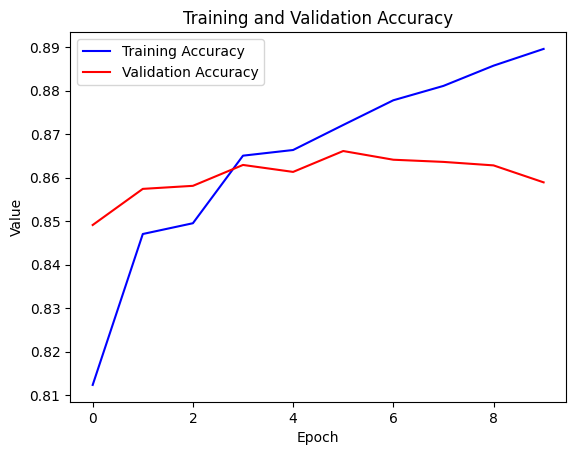

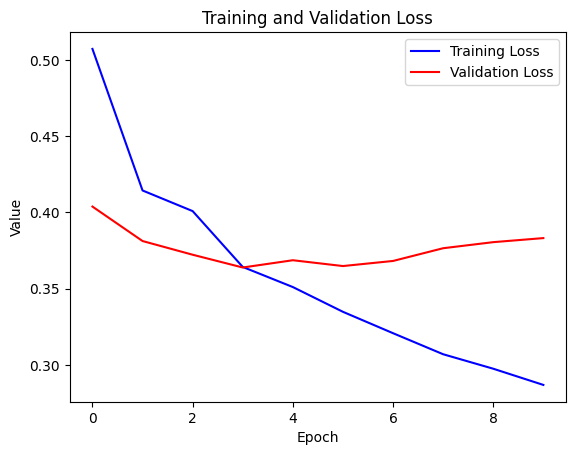

In [112]:
import matplotlib.pyplot as plt
import seaborn as sns

# akurasi
plt.plot(history.history['accuracy'], 'b',label='Training Accuracy')
plt.plot(history.history['val_accuracy'],'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.legend()
plt.show()
# loss
plt.plot(history.history['loss'], 'b', label='Training Loss')
plt.plot(history.history['val_loss'], 'r',label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.legend()
plt.show()

#### EVALUASI MODEL

313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step - accuracy: 0.8440 - loss: 0.4429
Loss pada data uji: 0.3889
Akurasi pada data uji: 0.8627
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step
Confusion Matrix:
 [[2942   48  376]
 [ 133  181  365]
 [ 335  116 5505]]
Accuracy: 0.8627
Precision: 0.8509
Recall: 0.8627
F1-score: 0.8536
              precision    recall  f1-score   support

           0     0.8628    0.8740    0.8684      3366
           1     0.5246    0.2666    0.3535       679
           2     0.8814    0.9243    0.9023      5956

    accuracy                         0.8627     10001
   macro avg     0.7563    0.6883    0.7081     10001
weighted avg     0.8509    0.8627    0.8536     10001



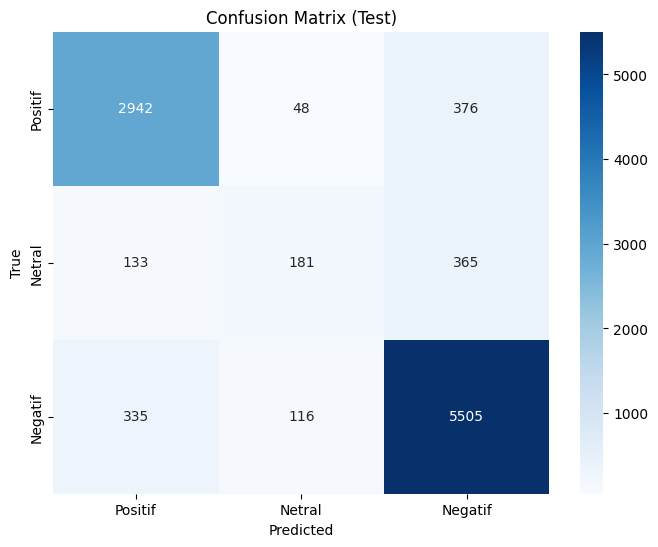

In [21]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Evaluasi Model pada Data Uji
loss, accuracy = model.evaluate(X_test_padded, y_test_onehot)
print(f"Loss pada data uji: {loss:.4f}")
print(f"Akurasi pada data uji: {accuracy:.4f}")

# Membuat prediksi pada data uji
y_pred = model.predict(X_test_padded)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test_onehot, axis=1)

# Menghitung confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)
print('Confusion Matrix:\n', cm)

# Menghitung metrik evaluasi lainnya
print(f"Accuracy: {accuracy_score(y_true, y_pred_classes):.4f}")
print(f"Precision: {precision_score(y_true, y_pred_classes, average='weighted', zero_division=0):.4f}")
print(f"Recall: {recall_score(y_true, y_pred_classes, average='weighted', zero_division=0):.4f}")
print(f"F1-score: {f1_score(y_true, y_pred_classes, average='weighted', zero_division=0):.4f}")
print(classification_report(y_true, y_pred_classes, digits=4))

# Visualisasi confusion matrix
plt.figure(figsize=(8, 6))
class_labels = ['Positif', 'Netral', 'Negatif']  # Sesuaikan dengan urutan label Anda
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Test)')
plt.show()


In [22]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

def predict_review(review, tokenizer, max_sequence_length, model):
    try:
        # Tokenisasi review
        review_tokenized = tokenizer.texts_to_sequences([review])  # Menggunakan tokenizer untuk konversi
        
        # Padding review
        review_padded = pad_sequences(review_tokenized, maxlen=max_sequence_length, padding='post')
        
        # Prediksi menggunakan model
        prediction = model.predict(review_padded)
        
        # Menampilkan hasil prediksi numerik
        print(f"Raw prediction: {prediction}")

        # Konversi probabilitas menjadi kelas
        predicted_class = np.argmax(prediction, axis=1)[0]
        
        # Konversi kelas menjadi label teks
        class_labels = ['Positif', 'Netral', 'Negatif']  # Sesuaikan dengan label kelas
        predicted_label = class_labels[predicted_class]
        
        return predicted_label
    except Exception as e:
        print(f"Error dalam prediksi review: {e}")
        return None

# Implementasi contoh
review_example = "aplikasi ini bagus"
predicted_label = predict_review(review_example, tokenizer, max_sequence_length, model)
print(f'\nReview: "{review_example}"\nPredicted Sentiment: {predicted_label}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
Raw prediction: [[0.85651505 0.01790414 0.12558083]]

Review: "aplikasi ini bagus"
Predicted Sentiment: Positif


In [27]:
import numpy as np
import random
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# Parameter grid yang diperbarui
param_grid = {
    'lstm_units': [32, 64, 96, 128, 256],
    'dense_units': [32, 64, 96, 128, 256],
    'dropout_rate': [0.2, 0.3, 0.4, 0.5],
    'bilstm_dropout_rate': [0.2, 0.3, 0.4, 0.5],  # Dropout untuk Bi-LSTM
    'bilstm_recurrent_dropout_rate': [0.2, 0.3, 0.4, 0.5],  # Recurrent dropout untuk Bi-LSTM
    'learning_rate': [0.0001, 0.001, 0.01, 0.1],
    'batch_size': [32, 64, 96, 256],
    'epochs': [10, 15, 20, 25]
}

# Fungsi untuk membuat model
def create_model(lstm_units, dense_units, dropout_rate, bilstm_dropout_rate, bilstm_recurrent_dropout_rate, learning_rate):
    model = Sequential()
    model.add(embedding_layer)  # Menggunakan embedding layer dari Word2Vec
    model.add(Bidirectional(LSTM(lstm_units, dropout=bilstm_dropout_rate, recurrent_dropout=bilstm_recurrent_dropout_rate)))
    model.add(Dense(dense_units, activation="relu"))
    model.add(Dropout(dropout_rate))
    model.add(Dense(3, activation="softmax"))  # Output untuk 3 kelas
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Inisialisasi variabel untuk menyimpan hasil terbaik
best_accuracy = 0
best_params = {}
best_model_path = "best_model.keras"  # Nama file untuk model terbaik

# Loop melalui 35 percobaan acak
for _ in range(35):
    lstm_units = random.choice(param_grid['lstm_units'])
    dense_units = random.choice(param_grid['dense_units'])
    dropout_rate = random.choice(param_grid['dropout_rate'])
    bilstm_dropout_rate = random.choice(param_grid['bilstm_dropout_rate'])
    bilstm_recurrent_dropout_rate = random.choice(param_grid['bilstm_recurrent_dropout_rate'])
    learning_rate = random.choice(param_grid['learning_rate'])
    batch_size = random.choice(param_grid['batch_size'])
    epochs = random.choice(param_grid['epochs'])

    print(f"Evaluating combination: LSTM units={lstm_units}, Dense units={dense_units}, Dropout={dropout_rate}, Bi-LSTM Dropout={bilstm_dropout_rate}, Bi-LSTM Recurrent Dropout={bilstm_recurrent_dropout_rate}, Learning rate={learning_rate}, Batch size={batch_size}, Epochs={epochs}")

    # Buat model baru dengan kombinasi hyperparameter ini
    model = create_model(lstm_units, dense_units, dropout_rate, bilstm_dropout_rate, bilstm_recurrent_dropout_rate, learning_rate)

    # Tentukan checkpoint dan early stopping
    checkpoint = ModelCheckpoint(best_model_path, monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)
    early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

    # Latih model dengan checkpoint dan early stopping
    model.fit(X_train_padded, y_train_onehot, batch_size=batch_size, epochs=epochs, 
              validation_data=(X_test_padded, y_test_onehot), 
              callbacks=[checkpoint, early_stopping], verbose=1)

    # Evaluasi model
    accuracy = model.evaluate(X_test_padded, y_test_onehot, verbose=1)[1]
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_params = {
            'lstm_units': lstm_units,
            'dense_units': dense_units,
            'dropout_rate': dropout_rate,
            'bilstm_dropout_rate': bilstm_dropout_rate,
            'bilstm_recurrent_dropout_rate': bilstm_recurrent_dropout_rate,
            'learning_rate': learning_rate,
            'batch_size': batch_size,
            'epochs': epochs
        }
        print(f"New best accuracy: {best_accuracy:.4f} with params: {best_params}")

print(f"Best accuracy: {best_accuracy:.4f} with params: {best_params}")


Evaluating combination: LSTM units=96, Dense units=128, Dropout=0.4, Bi-LSTM Dropout=0.3, Bi-LSTM Recurrent Dropout=0.3, Learning rate=0.01, Batch size=64, Epochs=15
Epoch 1/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step - accuracy: 0.7933 - loss: 0.5710
Epoch 1: val_accuracy improved from -inf to 0.83932, saving model to best_model.keras
625/625 ━━━━━━━━━━━━━━━━━━━━ 112s 171ms/step - accuracy: 0.7933 - loss: 0.5710 - val_accuracy: 0.8393 - val_loss: 0.4469
Epoch 2/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step - accuracy: 0.8320 - loss: 0.4758
Epoch 2: val_accuracy did not improve from 0.83932
625/625 ━━━━━━━━━━━━━━━━━━━━ 133s 157ms/step - accuracy: 0.8320 - loss: 0.4758 - val_accuracy: 0.8213 - val_loss: 0.4918
Epoch 3/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step - accuracy: 0.8234 - loss: 0.4843
Epoch 3: val_accuracy improved from 0.83932 to 0.84162, saving model to best_model.keras
625/625 ━━━━━━━━━━━━━━━━━━━━ 146s 163ms/step - accuracy: 0.8234 - loss: 0.4843 - val_accuracy: 0.8416 

In [29]:
print(f"Best model saved as: {'best'}")

Best model saved as: best


## HYPERPARAMETER (LSTM UNIT)

In [27]:
# Definisikan model Sequential
model_1 = Sequential()
# Tambahkan embedding layer
model_1.add(embedding_layer)
# Tambahkan Bidirectional LSTM
model_1.add(Bidirectional(LSTM(50, dropout=0.3, recurrent_dropout=0.2)))
# Tambahkan dense layer
model_1.add(Dense(128, activation="relu"))
# Tambahkan dropout
model_1.add(Dropout(0.5))
# Tambahkan output layer untuk klasifikasi multikelas (3 kelas)
model_1.add(Dense(3, activation="softmax"))
# Kompilasi model
model_1.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

In [29]:
history_1 = model_1.fit(X_train_padded, y_train_onehot, batch_size=64, epochs=10, validation_data=(X_test_padded, y_test_onehot))

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 77s 113ms/step - accuracy: 0.7552 - loss: 0.6258 - val_accuracy: 0.8463 - val_loss: 0.4133
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 74s 118ms/step - accuracy: 0.8389 - loss: 0.4390 - val_accuracy: 0.8561 - val_loss: 0.3842
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 79s 126ms/step - accuracy: 0.8498 - loss: 0.3991 - val_accuracy: 0.8582 - val_loss: 0.3775
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 81s 130ms/step - accuracy: 0.8598 - loss: 0.3738 - val_accuracy: 0.8571 - val_loss: 0.3740
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 75s 119ms/step - accuracy: 0.8640 - loss: 0.3623 - val_accuracy: 0.8609 - val_loss: 0.3717
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 85s 123ms/step - accuracy: 0.8720 - loss: 0.3447 - val_accuracy: 0.8615 - val_loss: 0.3712
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 91s 145ms/step - accuracy: 0.8751 - loss: 0.3323 - val_accuracy: 0.8619 - val_loss: 0.3780
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 89s 143ms/step - accuracy: 0.8744 - loss: 0

In [30]:
model_1.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 114, 300)       │     7,788,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_3 (Bidirectional) │ (None, 100)            │       140,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │        12,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,249,747 (31.47 MB)

 Trainable params: 153,715 (600.45 KB)

 Non-trainable params: 7,788,600 (29.71 MB)

 Optimizer params: 307,432 (1.17 MB)

In [31]:
# Simpan model
model_1.save('D:\skripsi - Copy\code\model_2\model_1.h5')

313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step - accuracy: 0.8320 - loss: 0.4603
Loss pada data uji: 0.3819308280944824
Akurasi pada data uji: 0.8615138530731201
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 20ms/step
Confusion matrix:
 [[2877   38  451]
 [ 124  143  412]
 [ 278   82 5596]]
Accuracy: 0.8615138486151385
Precision: 0.8481882712237182
Recall: 0.8615138486151385
F1-score: 0.8489244318865634
              precision    recall  f1-score   support

           0     0.8774    0.8547    0.8659      3366
           1     0.5437    0.2106    0.3036       679
           2     0.8664    0.9396    0.9015      5956

    accuracy                         0.8615     10001
   macro avg     0.7625    0.6683    0.6903     10001
weighted avg     0.8482    0.8615    0.8489     10001



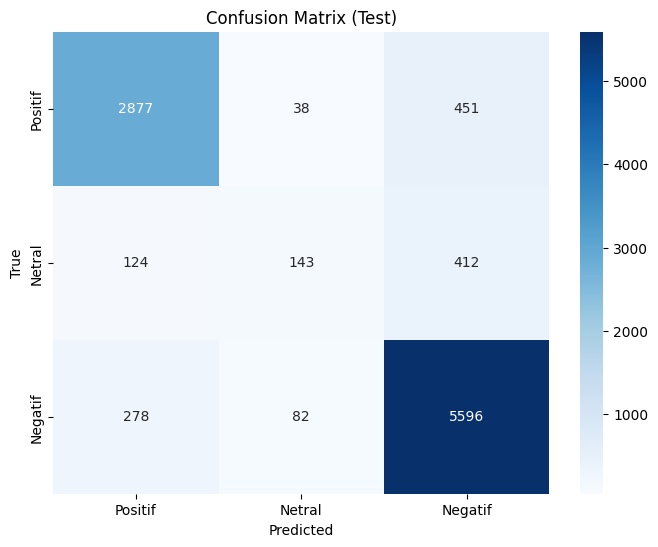

In [33]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluasi Model pada Data Uji
loss, accuracy = model_1.evaluate(X_test_padded, y_test_onehot)
print(f"Loss pada data uji: {loss}")
print(f"Akurasi pada data uji: {accuracy}")

# Membuat Confusion Matrix dan Laporan Klasifikasi
y_pred = model_1.predict(X_test_padded)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test_onehot, axis=1)

# Menghitung confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)
print('Confusion matrix:\n', cm)

# Menghitung metrik evaluasi lainnya
print('Accuracy:', accuracy_score(y_true, y_pred_classes))
print('Precision:', precision_score(y_true, y_pred_classes, average='weighted', zero_division=0))
print('Recall:', recall_score(y_true, y_pred_classes, average='weighted', zero_division=0))
print('F1-score:', f1_score(y_true, y_pred_classes, average='weighted', zero_division=0))
print(classification_report(y_true, y_pred_classes, digits=4))

# Visualisasi confusion matrix
plt.figure(figsize=(8, 6))
class_labels = ['Positif', 'Netral', 'Negatif']
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Test)')
plt.show()

In [34]:
# Definisikan model Sequential
model_2 = Sequential()
# Tambahkan embedding layer
model_2.add(embedding_layer)
# Tambahkan Bidirectional LSTM
model_2.add(Bidirectional(LSTM(150, dropout=0.3, recurrent_dropout=0.2)))
# Tambahkan dense layer
model_2.add(Dense(128, activation="relu"))
# Tambahkan dropout
model_2.add(Dropout(0.5))
# Tambahkan output layer untuk klasifikasi multikelas (3 kelas)
model_2.add(Dense(3, activation="softmax"))
# Kompilasi model
model_2.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

In [37]:
history_2 = model_2.fit(X_train_padded, y_train_onehot, batch_size=64, epochs=10, validation_data=(X_test_padded, y_test_onehot))

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 307s 482ms/step - accuracy: 0.7802 - loss: 0.5742 - val_accuracy: 0.8502 - val_loss: 0.3969
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 350s 527ms/step - accuracy: 0.8465 - loss: 0.4100 - val_accuracy: 0.8581 - val_loss: 0.3743
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 266s 340ms/step - accuracy: 0.8580 - loss: 0.3774 - val_accuracy: 0.8627 - val_loss: 0.3667
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 228s 286ms/step - accuracy: 0.8686 - loss: 0.3459 - val_accuracy: 0.8643 - val_loss: 0.3733
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 163s 261ms/step - accuracy: 0.8756 - loss: 0.3278 - val_accuracy: 0.8619 - val_loss: 0.3708
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 163s 260ms/step - accuracy: 0.8819 - loss: 0.3080 - val_accuracy: 0.8613 - val_loss: 0.3789
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 162s 259ms/step - accuracy: 0.8875 - loss: 0.2915 - val_accuracy: 0.8635 - val_loss: 0.3818
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 159s 254ms/step - accuracy: 0.8923 -

In [38]:
model_2.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 114, 300)       │     7,788,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_4 (Bidirectional) │ (None, 300)            │       541,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │        38,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,528,947 (36.35 MB)

 Trainable params: 580,115 (2.21 MB)

 Non-trainable params: 7,788,600 (29.71 MB)

 Optimizer params: 1,160,232 (4.43 MB)

In [39]:
# Simpan model
model_2.save('D:\skripsi - Copy\code\model_2\model_2.h5')

313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.8329 - loss: 0.5020
Loss pada data uji: 0.40787363052368164
Akurasi pada data uji: 0.8632136583328247
313/313 ━━━━━━━━━━━━━━━━━━━━ 13s 41ms/step
Confusion matrix:
 [[2876   47  443]
 [ 127  170  382]
 [ 276   93 5587]]
Accuracy: 0.8632136786321368
Precision: 0.8513482142713714
Recall: 0.8632136786321368
F1-score: 0.8527240152928234
              precision    recall  f1-score   support

           0     0.8771    0.8544    0.8656      3366
           1     0.5484    0.2504    0.3438       679
           2     0.8713    0.9380    0.9035      5956

    accuracy                         0.8632     10001
   macro avg     0.7656    0.6809    0.7043     10001
weighted avg     0.8513    0.8632    0.8527     10001



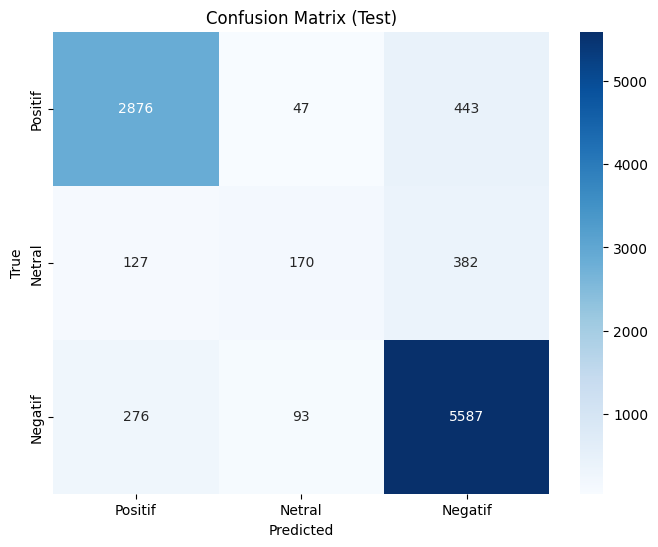

In [40]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluasi Model pada Data Uji
loss, accuracy = model_2.evaluate(X_test_padded, y_test_onehot)
print(f"Loss pada data uji: {loss}")
print(f"Akurasi pada data uji: {accuracy}")

# Membuat Confusion Matrix dan Laporan Klasifikasi
y_pred = model_2.predict(X_test_padded)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test_onehot, axis=1)

# Menghitung confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)
print('Confusion matrix:\n', cm)

# Menghitung metrik evaluasi lainnya
print('Accuracy:', accuracy_score(y_true, y_pred_classes))
print('Precision:', precision_score(y_true, y_pred_classes, average='weighted', zero_division=0))
print('Recall:', recall_score(y_true, y_pred_classes, average='weighted', zero_division=0))
print('F1-score:', f1_score(y_true, y_pred_classes, average='weighted', zero_division=0))
print(classification_report(y_true, y_pred_classes, digits=4))

# Visualisasi confusion matrix
plt.figure(figsize=(8, 6))
class_labels = ['Positif', 'Netral', 'Negatif']
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Test)')
plt.show()

In [18]:
# Definisikan model Sequential
model_3 = Sequential()
# Tambahkan embedding layer
model_3.add(embedding_layer)
# Tambahkan Bidirectional LSTM
model_3.add(Bidirectional(LSTM(200, dropout=0.3, recurrent_dropout=0.2)))
# Tambahkan dense layer
model_3.add(Dense(128, activation="relu"))
# Tambahkan dropout
model_3.add(Dropout(0.5))
# Tambahkan output layer untuk klasifikasi multikelas (3 kelas)
model_3.add(Dense(3, activation="softmax"))
# Kompilasi model
model_3.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

In [19]:
history_3 = model_3.fit(X_train_padded, y_train_onehot, batch_size=64, epochs=10, validation_data=(X_test_padded, y_test_onehot))

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 626s 990ms/step - accuracy: 0.7897 - loss: 0.5614 - val_accuracy: 0.8511 - val_loss: 0.3941
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 602s 963ms/step - accuracy: 0.8506 - loss: 0.3982 - val_accuracy: 0.8567 - val_loss: 0.3749
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 586s 905ms/step - accuracy: 0.8616 - loss: 0.3685 - val_accuracy: 0.8601 - val_loss: 0.3643
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 582s 931ms/step - accuracy: 0.8714 - loss: 0.3427 - val_accuracy: 0.8632 - val_loss: 0.3641
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 547s 876ms/step - accuracy: 0.8772 - loss: 0.3190 - val_accuracy: 0.8646 - val_loss: 0.3715
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 517s 828ms/step - accuracy: 0.8836 - loss: 0.2992 - val_accuracy: 0.8653 - val_loss: 0.3736
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 371s 593ms/step - accuracy: 0.8914 - loss: 0.2786 - val_accuracy: 0.8605 - val_loss: 0.3829
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 293s 469ms/step - accuracy: 0.8971 -

In [20]:
model_3.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 114, 300)       │     7,788,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 400)            │       801,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        51,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,348,547 (39.48 MB)

 Trainable params: 853,315 (3.26 MB)

 Non-trainable params: 7,788,600 (29.71 MB)

 Optimizer params: 1,706,632 (6.51 MB)

In [23]:
# Simpan model
model_3.save('D:\skripsi - Copy\code\model_2\model_3.h5')

313/313 ━━━━━━━━━━━━━━━━━━━━ 25s 79ms/step - accuracy: 0.8322 - loss: 0.5639
Loss pada data uji: 0.45933547616004944
Akurasi pada data uji: 0.8611139059066772
313/313 ━━━━━━━━━━━━━━━━━━━━ 27s 84ms/step
Confusion matrix:
 [[2878   47  441]
 [ 115  185  379]
 [ 296  111 5549]]
Accuracy: 0.8611138886111389
Precision: 0.8499925606259932
Recall: 0.8611138886111389
F1-score: 0.8519327008559662
              precision    recall  f1-score   support

           0     0.8750    0.8550    0.8649      3366
           1     0.5394    0.2725    0.3620       679
           2     0.8713    0.9317    0.9004      5956

    accuracy                         0.8611     10001
   macro avg     0.7619    0.6864    0.7091     10001
weighted avg     0.8500    0.8611    0.8519     10001



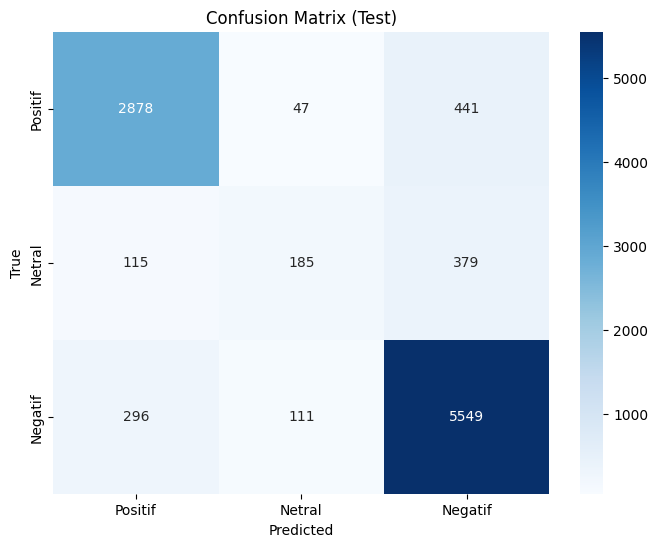

In [22]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluasi Model pada Data Uji
loss, accuracy = model_3.evaluate(X_test_padded, y_test_onehot)
print(f"Loss pada data uji: {loss}")
print(f"Akurasi pada data uji: {accuracy}")

# Membuat Confusion Matrix dan Laporan Klasifikasi
y_pred = model_3.predict(X_test_padded)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test_onehot, axis=1)

# Menghitung confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)
print('Confusion matrix:\n', cm)

# Menghitung metrik evaluasi lainnya
print('Accuracy:', accuracy_score(y_true, y_pred_classes))
print('Precision:', precision_score(y_true, y_pred_classes, average='weighted', zero_division=0))
print('Recall:', recall_score(y_true, y_pred_classes, average='weighted', zero_division=0))
print('F1-score:', f1_score(y_true, y_pred_classes, average='weighted', zero_division=0))
print(classification_report(y_true, y_pred_classes, digits=4))

# Visualisasi confusion matrix
plt.figure(figsize=(8, 6))
class_labels = ['Positif', 'Netral', 'Negatif']
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Test)')
plt.show()

## DROPOUT BI-LSTM

In [26]:
# Definisikan model Sequential
model_4 = Sequential()
# Tambahkan embedding layer
model_4.add(embedding_layer)
# Tambahkan Bidirectional LSTM
model_4.add(Bidirectional(LSTM(150, dropout=0.2, recurrent_dropout=0.2)))
# Tambahkan dense layer
model_4.add(Dense(128, activation="relu"))
# Tambahkan dropout
model_4.add(Dropout(0.5))
# Tambahkan output layer untuk klasifikasi multikelas (3 kelas)
model_4.add(Dense(3, activation="softmax"))
# Kompilasi model
model_4.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

In [27]:
history_4 = model_4.fit(X_train_padded, y_train_onehot, batch_size=64, epochs=10, validation_data=(X_test_padded, y_test_onehot))

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 231s 352ms/step - accuracy: 0.7844 - loss: 0.5607 - val_accuracy: 0.8411 - val_loss: 0.4092
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 248s 330ms/step - accuracy: 0.8514 - loss: 0.3929 - val_accuracy: 0.8585 - val_loss: 0.3720
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 261s 328ms/step - accuracy: 0.8670 - loss: 0.3556 - val_accuracy: 0.8615 - val_loss: 0.3662
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 211s 337ms/step - accuracy: 0.8732 - loss: 0.3278 - val_accuracy: 0.8638 - val_loss: 0.3668
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 214s 342ms/step - accuracy: 0.8810 - loss: 0.3108 - val_accuracy: 0.8627 - val_loss: 0.3719
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 256s 332ms/step - accuracy: 0.8912 - loss: 0.2794 - val_accuracy: 0.8653 - val_loss: 0.3803
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 211s 338ms/step - accuracy: 0.9012 - loss: 0.2546 - val_accuracy: 0.8638 - val_loss: 0.4044
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 208s 333ms/step - accuracy: 0.9109 -

In [28]:
# Simpan model
model_4.save('D:\skripsi - Copy\code\model_2\model_4.h5')

313/313 ━━━━━━━━━━━━━━━━━━━━ 18s 56ms/step - accuracy: 0.8315 - loss: 0.5434
Loss pada data uji: 0.450163334608078
Akurasi pada data uji: 0.8593140840530396
313/313 ━━━━━━━━━━━━━━━━━━━━ 21s 67ms/step
Confusion matrix:
 [[2871   55  440]
 [ 125  218  336]
 [ 292  159 5505]]
Accuracy: 0.8593140685931406
Precision: 0.8501053919264324
Recall: 0.8593140685931406
F1-score: 0.8529061806282499
              precision    recall  f1-score   support

           0     0.8732    0.8529    0.8629      3366
           1     0.5046    0.3211    0.3924       679
           2     0.8765    0.9243    0.8997      5956

    accuracy                         0.8593     10001
   macro avg     0.7514    0.6994    0.7184     10001
weighted avg     0.8501    0.8593    0.8529     10001



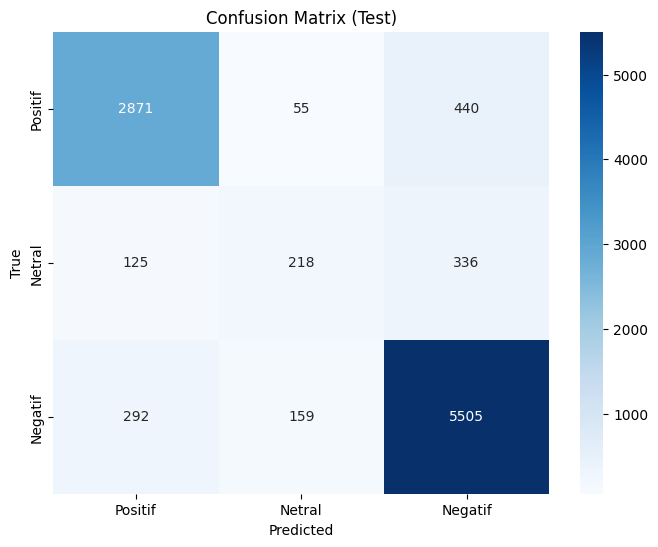

In [30]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluasi Model pada Data Uji
loss, accuracy = model_4.evaluate(X_test_padded, y_test_onehot)
print(f"Loss pada data uji: {loss}")
print(f"Akurasi pada data uji: {accuracy}")

# Membuat Confusion Matrix dan Laporan Klasifikasi
y_pred = model_4.predict(X_test_padded)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test_onehot, axis=1)

# Menghitung confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)
print('Confusion matrix:\n', cm)

# Menghitung metrik evaluasi lainnya
print('Accuracy:', accuracy_score(y_true, y_pred_classes))
print('Precision:', precision_score(y_true, y_pred_classes, average='weighted', zero_division=0))
print('Recall:', recall_score(y_true, y_pred_classes, average='weighted', zero_division=0))
print('F1-score:', f1_score(y_true, y_pred_classes, average='weighted', zero_division=0))
print(classification_report(y_true, y_pred_classes, digits=4))

# Visualisasi confusion matrix
plt.figure(figsize=(8, 6))
class_labels = ['Positif', 'Netral', 'Negatif']
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Test)')
plt.show()

In [31]:
# Definisikan model Sequential
model_5 = Sequential()
# Tambahkan embedding layer
model_5.add(embedding_layer)
# Tambahkan Bidirectional LSTM
model_5.add(Bidirectional(LSTM(150, dropout=0.3, recurrent_dropout=0.2)))
# Tambahkan dense layer
model_5.add(Dense(128, activation="relu"))
# Tambahkan dropout
model_5.add(Dropout(0.5))
# Tambahkan output layer untuk klasifikasi multikelas (3 kelas)
model_5.add(Dense(3, activation="softmax"))
# Kompilasi model
model_5.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

In [32]:
history_5 = model_5.fit(X_train_padded, y_train_onehot, batch_size=64, epochs=10, validation_data=(X_test_padded, y_test_onehot))

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 185s 286ms/step - accuracy: 0.7850 - loss: 0.5676 - val_accuracy: 0.8526 - val_loss: 0.3902
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 158s 253ms/step - accuracy: 0.8515 - loss: 0.4077 - val_accuracy: 0.8560 - val_loss: 0.3777
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 160s 256ms/step - accuracy: 0.8592 - loss: 0.3725 - val_accuracy: 0.8599 - val_loss: 0.3680
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 156s 250ms/step - accuracy: 0.8637 - loss: 0.3565 - val_accuracy: 0.8615 - val_loss: 0.3686
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 158s 252ms/step - accuracy: 0.8693 - loss: 0.3473 - val_accuracy: 0.8661 - val_loss: 0.3699
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 200s 248ms/step - accuracy: 0.8822 - loss: 0.3086 - val_accuracy: 0.8644 - val_loss: 0.3730
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 157s 251ms/step - accuracy: 0.8891 - loss: 0.2898 - val_accuracy: 0.8630 - val_loss: 0.3763
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 157s 252ms/step - accuracy: 0.8939 -

In [35]:
# Simpan model
model_5.save('D:\skripsi - Copy\code\model_2\model_5.h5')

313/313 ━━━━━━━━━━━━━━━━━━━━ 16s 50ms/step - accuracy: 0.8349 - loss: 0.5049
Loss pada data uji: 0.42017659544944763
Akurasi pada data uji: 0.860014021396637
313/313 ━━━━━━━━━━━━━━━━━━━━ 16s 49ms/step
Confusion matrix:
 [[2875   61  430]
 [ 115  204  360]
 [ 295  139 5522]]
Accuracy: 0.8600139986001399
Precision: 0.8498458351769311
Recall: 0.8600139986001399
F1-score: 0.8526720787718667
              precision    recall  f1-score   support

           0     0.8752    0.8541    0.8645      3366
           1     0.5050    0.3004    0.3767       679
           2     0.8748    0.9271    0.9002      5956

    accuracy                         0.8600     10001
   macro avg     0.7517    0.6939    0.7138     10001
weighted avg     0.8498    0.8600    0.8527     10001



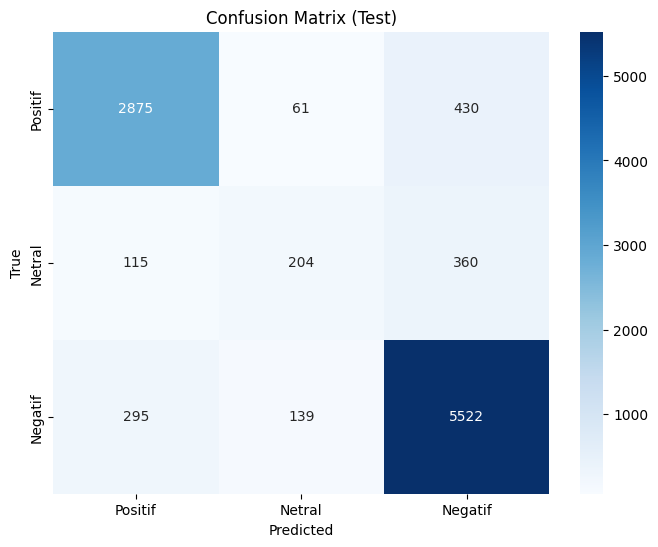

In [34]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluasi Model pada Data Uji
loss, accuracy = model_5.evaluate(X_test_padded, y_test_onehot)
print(f"Loss pada data uji: {loss}")
print(f"Akurasi pada data uji: {accuracy}")

# Membuat Confusion Matrix dan Laporan Klasifikasi
y_pred = model_5.predict(X_test_padded)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test_onehot, axis=1)

# Menghitung confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)
print('Confusion matrix:\n', cm)

# Menghitung metrik evaluasi lainnya
print('Accuracy:', accuracy_score(y_true, y_pred_classes))
print('Precision:', precision_score(y_true, y_pred_classes, average='weighted', zero_division=0))
print('Recall:', recall_score(y_true, y_pred_classes, average='weighted', zero_division=0))
print('F1-score:', f1_score(y_true, y_pred_classes, average='weighted', zero_division=0))
print(classification_report(y_true, y_pred_classes, digits=4))

# Visualisasi confusion matrix
plt.figure(figsize=(8, 6))
class_labels = ['Positif', 'Netral', 'Negatif']
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Test)')
plt.show()

In [36]:
# Definisikan model Sequential
model_6 = Sequential()
# Tambahkan embedding layer
model_6.add(embedding_layer)
# Tambahkan Bidirectional LSTM
model_6.add(Bidirectional(LSTM(150, dropout=0.4, recurrent_dropout=0.2)))
# Tambahkan dense layer
model_6.add(Dense(128, activation="relu"))
# Tambahkan dropout
model_6.add(Dropout(0.5))
# Tambahkan output layer untuk klasifikasi multikelas (3 kelas)
model_6.add(Dense(3, activation="softmax"))
# Kompilasi model
model_6.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

In [37]:
history_6 = model_6.fit(X_train_padded, y_train_onehot, batch_size=64, epochs=10, validation_data=(X_test_padded, y_test_onehot))

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 185s 275ms/step - accuracy: 0.7689 - loss: 0.5945 - val_accuracy: 0.8470 - val_loss: 0.4056
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 174s 278ms/step - accuracy: 0.8422 - loss: 0.4252 - val_accuracy: 0.8576 - val_loss: 0.3807
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 219s 306ms/step - accuracy: 0.8552 - loss: 0.3820 - val_accuracy: 0.8629 - val_loss: 0.3620
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 176s 282ms/step - accuracy: 0.8612 - loss: 0.3635 - val_accuracy: 0.8614 - val_loss: 0.3634
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 171s 273ms/step - accuracy: 0.8688 - loss: 0.3472 - val_accuracy: 0.8650 - val_loss: 0.3716
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 204s 277ms/step - accuracy: 0.8740 - loss: 0.3318 - val_accuracy: 0.8627 - val_loss: 0.3744
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 169s 271ms/step - accuracy: 0.8786 - loss: 0.3198 - val_accuracy: 0.8642 - val_loss: 0.3681
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 214s 289ms/step - accuracy: 0.8808 -

In [38]:
# Simpan model
model_6.save('D:\skripsi - Copy\code\model_2\model_6.h5')

313/313 ━━━━━━━━━━━━━━━━━━━━ 14s 44ms/step - accuracy: 0.8421 - loss: 0.4475
Loss pada data uji: 0.38618940114974976
Akurasi pada data uji: 0.8637136220932007
313/313 ━━━━━━━━━━━━━━━━━━━━ 15s 45ms/step
Confusion matrix:
 [[2935   41  390]
 [ 122  172  385]
 [ 324  101 5531]]
Accuracy: 0.8637136286371363
Precision: 0.8517077891748649
Recall: 0.8637136286371363
F1-score: 0.8535969919210981
              precision    recall  f1-score   support

           0     0.8681    0.8720    0.8700      3366
           1     0.5478    0.2533    0.3464       679
           2     0.8771    0.9286    0.9021      5956

    accuracy                         0.8637     10001
   macro avg     0.7643    0.6846    0.7062     10001
weighted avg     0.8517    0.8637    0.8536     10001



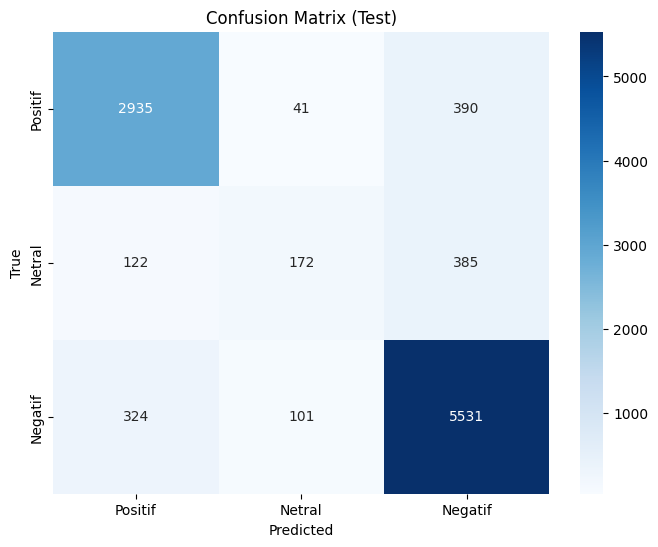

In [39]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluasi Model pada Data Uji
loss, accuracy = model_6.evaluate(X_test_padded, y_test_onehot)
print(f"Loss pada data uji: {loss}")
print(f"Akurasi pada data uji: {accuracy}")

# Membuat Confusion Matrix dan Laporan Klasifikasi
y_pred = model_6.predict(X_test_padded)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test_onehot, axis=1)

# Menghitung confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)
print('Confusion matrix:\n', cm)

# Menghitung metrik evaluasi lainnya
print('Accuracy:', accuracy_score(y_true, y_pred_classes))
print('Precision:', precision_score(y_true, y_pred_classes, average='weighted', zero_division=0))
print('Recall:', recall_score(y_true, y_pred_classes, average='weighted', zero_division=0))
print('F1-score:', f1_score(y_true, y_pred_classes, average='weighted', zero_division=0))
print(classification_report(y_true, y_pred_classes, digits=4))

# Visualisasi confusion matrix
plt.figure(figsize=(8, 6))
class_labels = ['Positif', 'Netral', 'Negatif']
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Test)')
plt.show()

In [40]:
# Definisikan model Sequential
model_7 = Sequential()
# Tambahkan embedding layer
model_7.add(embedding_layer)
# Tambahkan Bidirectional LSTM
model_7.add(Bidirectional(LSTM(200, dropout=0.5, recurrent_dropout=0.2)))
# Tambahkan dense layer
model_7.add(Dense(128, activation="relu"))
# Tambahkan dropout
model_7.add(Dropout(0.5))
# Tambahkan output layer untuk klasifikasi multikelas (3 kelas)
model_7.add(Dense(3, activation="softmax"))
# Kompilasi model
model_7.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

In [41]:
history_7 = model_7.fit(X_train_padded, y_train_onehot, batch_size=64, epochs=10, validation_data=(X_test_padded, y_test_onehot))

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 225s 353ms/step - accuracy: 0.7660 - loss: 0.6017 - val_accuracy: 0.8479 - val_loss: 0.4144
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 229s 366ms/step - accuracy: 0.8371 - loss: 0.4387 - val_accuracy: 0.8551 - val_loss: 0.3802
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 247s 343ms/step - accuracy: 0.8453 - loss: 0.4047 - val_accuracy: 0.8617 - val_loss: 0.3710
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 218s 348ms/step - accuracy: 0.8566 - loss: 0.3809 - val_accuracy: 0.8632 - val_loss: 0.3669
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 222s 356ms/step - accuracy: 0.8603 - loss: 0.3613 - val_accuracy: 0.8632 - val_loss: 0.3667
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 265s 360ms/step - accuracy: 0.8680 - loss: 0.3494 - val_accuracy: 0.8639 - val_loss: 0.3820
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 239s 383ms/step - accuracy: 0.8706 - loss: 0.3372 - val_accuracy: 0.8644 - val_loss: 0.3651
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 279s 410ms/step - accuracy: 0.8743 -

In [42]:
# Simpan model
model_7.save('D:\skripsi - Copy\code\model_2\model_7.h5')

313/313 ━━━━━━━━━━━━━━━━━━━━ 23s 74ms/step - accuracy: 0.8321 - loss: 0.4808
Loss pada data uji: 0.3864677846431732
Akurasi pada data uji: 0.8622137904167175
313/313 ━━━━━━━━━━━━━━━━━━━━ 25s 78ms/step
Confusion matrix:
 [[2873   46  447]
 [ 107  177  395]
 [ 252  131 5573]]
Accuracy: 0.8622137786221378
Precision: 0.8505011202671898
Recall: 0.8622137786221378
F1-score: 0.8529408192473606
              precision    recall  f1-score   support

           0     0.8889    0.8535    0.8709      3366
           1     0.5000    0.2607    0.3427       679
           2     0.8687    0.9357    0.9010      5956

    accuracy                         0.8622     10001
   macro avg     0.7526    0.6833    0.7048     10001
weighted avg     0.8505    0.8622    0.8529     10001



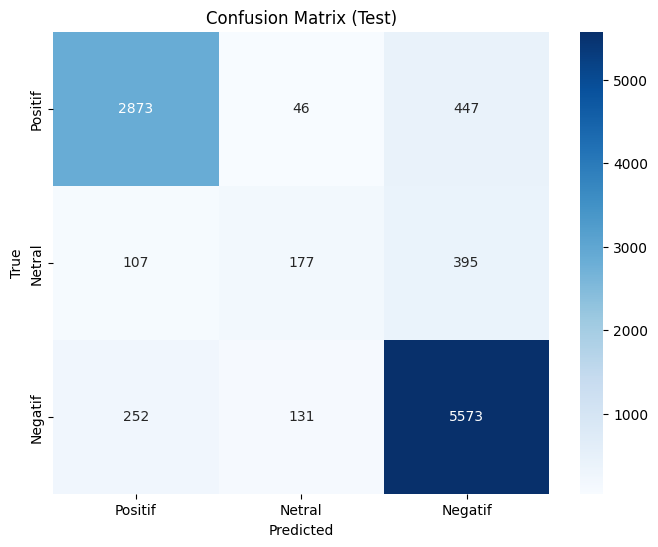

In [43]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluasi Model pada Data Uji
loss, accuracy = model_7.evaluate(X_test_padded, y_test_onehot)
print(f"Loss pada data uji: {loss}")
print(f"Akurasi pada data uji: {accuracy}")

# Membuat Confusion Matrix dan Laporan Klasifikasi
y_pred = model_7.predict(X_test_padded)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test_onehot, axis=1)

# Menghitung confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)
print('Confusion matrix:\n', cm)

# Menghitung metrik evaluasi lainnya
print('Accuracy:', accuracy_score(y_true, y_pred_classes))
print('Precision:', precision_score(y_true, y_pred_classes, average='weighted', zero_division=0))
print('Recall:', recall_score(y_true, y_pred_classes, average='weighted', zero_division=0))
print('F1-score:', f1_score(y_true, y_pred_classes, average='weighted', zero_division=0))
print(classification_report(y_true, y_pred_classes, digits=4))

# Visualisasi confusion matrix
plt.figure(figsize=(8, 6))
class_labels = ['Positif', 'Netral', 'Negatif']
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Test)')
plt.show()

## RECCURENT DROPOUT (BI-LSTM)


In [44]:
# Definisikan model Sequential
model_8 = Sequential()
# Tambahkan embedding layer
model_8.add(embedding_layer)
# Tambahkan Bidirectional LSTM
model_8.add(Bidirectional(LSTM(150, dropout=0.4, recurrent_dropout=0.2)))
# Tambahkan dense layer
model_8.add(Dense(128, activation="relu"))
# Tambahkan dropout
model_8.add(Dropout(0.5))
# Tambahkan output layer untuk klasifikasi multikelas (3 kelas)
model_8.add(Dense(3, activation="softmax"))
# Kompilasi model
model_8.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

In [47]:
history_8 = model_8.fit(X_train_padded, y_train_onehot, batch_size=64, epochs=10, validation_data=(X_test_padded, y_test_onehot))

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 168s 268ms/step - accuracy: 0.8437 - loss: 0.4205 - val_accuracy: 0.8556 - val_loss: 0.3836
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 155s 248ms/step - accuracy: 0.8567 - loss: 0.3865 - val_accuracy: 0.8571 - val_loss: 0.3870
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 157s 251ms/step - accuracy: 0.8595 - loss: 0.3777 - val_accuracy: 0.8615 - val_loss: 0.3697
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 154s 247ms/step - accuracy: 0.8641 - loss: 0.3560 - val_accuracy: 0.8648 - val_loss: 0.3678
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 244s 314ms/step - accuracy: 0.8763 - loss: 0.3234 - val_accuracy: 0.8636 - val_loss: 0.3706
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 169s 271ms/step - accuracy: 0.8754 - loss: 0.3233 - val_accuracy: 0.8626 - val_loss: 0.3662
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 191s 306ms/step - accuracy: 0.8787 - loss: 0.3122 - val_accuracy: 0.8630 - val_loss: 0.3794
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 165s 264ms/step - accuracy: 0.8858 -

In [48]:
# Simpan model
model_8.save('D:\skripsi - Copy\code\model_2\model_8.h5')

313/313 ━━━━━━━━━━━━━━━━━━━━ 13s 40ms/step - accuracy: 0.8321 - loss: 0.4662
Loss pada data uji: 0.39223429560661316
Akurasi pada data uji: 0.8607138991355896
313/313 ━━━━━━━━━━━━━━━━━━━━ 19s 57ms/step
Confusion matrix:
 [[2860   57  449]
 [ 107  242  330]
 [ 276  174 5506]]
Accuracy: 0.8607139286071392
Precision: 0.8532793907037587
Recall: 0.8607139286071392
F1-score: 0.8555662004891886
              precision    recall  f1-score   support

           0     0.8819    0.8497    0.8655      3366
           1     0.5116    0.3564    0.4201       679
           2     0.8761    0.9244    0.8996      5956

    accuracy                         0.8607     10001
   macro avg     0.7565    0.7102    0.7284     10001
weighted avg     0.8533    0.8607    0.8556     10001



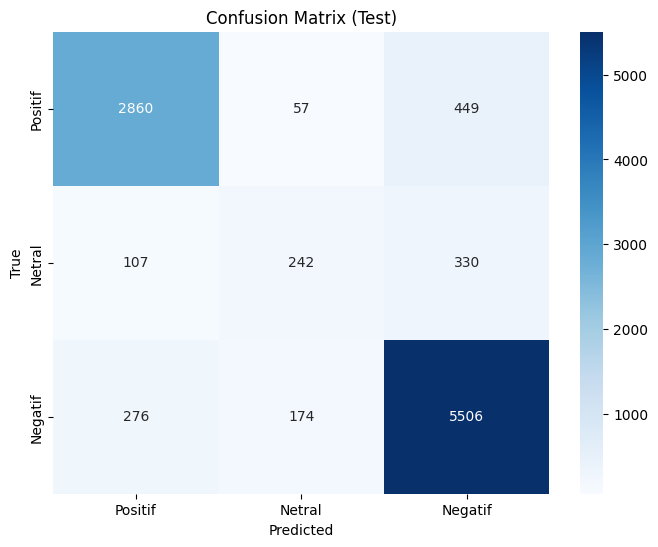

In [50]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluasi Model pada Data Uji
loss, accuracy = model_8.evaluate(X_test_padded, y_test_onehot)
print(f"Loss pada data uji: {loss}")
print(f"Akurasi pada data uji: {accuracy}")

# Membuat Confusion Matrix dan Laporan Klasifikasi
y_pred = model_8.predict(X_test_padded)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test_onehot, axis=1)

# Menghitung confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)
print('Confusion matrix:\n', cm)

# Menghitung metrik evaluasi lainnya
print('Accuracy:', accuracy_score(y_true, y_pred_classes))
print('Precision:', precision_score(y_true, y_pred_classes, average='weighted', zero_division=0))
print('Recall:', recall_score(y_true, y_pred_classes, average='weighted', zero_division=0))
print('F1-score:', f1_score(y_true, y_pred_classes, average='weighted', zero_division=0))
print(classification_report(y_true, y_pred_classes, digits=4))

# Visualisasi confusion matrix
plt.figure(figsize=(8, 6))
class_labels = ['Positif', 'Netral', 'Negatif']
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Test)')
plt.show()

In [53]:
# Definisikan model Sequential
model_9 = Sequential()
# Tambahkan embedding layer
model_9.add(embedding_layer)
# Tambahkan Bidirectional LSTM
model_9.add(Bidirectional(LSTM(150, dropout=0.4, recurrent_dropout=0.3)))
# Tambahkan dense layer
model_9.add(Dense(128, activation="relu"))
# Tambahkan dropout
model_9.add(Dropout(0.5))
# Tambahkan output layer untuk klasifikasi multikelas (3 kelas)
model_9.add(Dense(3, activation="softmax"))
# Kompilasi model
model_9.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

In [55]:
history_9 = model_9.fit(X_train_padded, y_train_onehot, batch_size=64, epochs=10, validation_data=(X_test_padded, y_test_onehot))

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 230s 369ms/step - accuracy: 0.7775 - loss: 0.5877 - val_accuracy: 0.8503 - val_loss: 0.4042
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 234s 323ms/step - accuracy: 0.8350 - loss: 0.4359 - val_accuracy: 0.8566 - val_loss: 0.3798
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 173s 276ms/step - accuracy: 0.8477 - loss: 0.3983 - val_accuracy: 0.8619 - val_loss: 0.3668
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 166s 265ms/step - accuracy: 0.8612 - loss: 0.3693 - val_accuracy: 0.8627 - val_loss: 0.3639
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 162s 260ms/step - accuracy: 0.8624 - loss: 0.3558 - val_accuracy: 0.8640 - val_loss: 0.3665
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 163s 260ms/step - accuracy: 0.8679 - loss: 0.3477 - val_accuracy: 0.8637 - val_loss: 0.3641
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 162s 259ms/step - accuracy: 0.8749 - loss: 0.3292 - val_accuracy: 0.8650 - val_loss: 0.3698
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 172s 276ms/step - accuracy: 0.8793 -

In [56]:
# Simpan model
model_9.save('D:\skripsi - Copy\code\model_2\model_9.h5')

313/313 ━━━━━━━━━━━━━━━━━━━━ 17s 54ms/step - accuracy: 0.8468 - loss: 0.4130
Loss pada data uji: 0.37871184945106506
Akurasi pada data uji: 0.8629137277603149
313/313 ━━━━━━━━━━━━━━━━━━━━ 16s 49ms/step
Confusion matrix:
 [[2955   31  380]
 [ 143  196  340]
 [ 351  126 5479]]
Accuracy: 0.8629137086291371
Precision: 0.8524268062361584
Recall: 0.8629137086291371
F1-score: 0.8545536256292641
              precision    recall  f1-score   support

           0     0.8568    0.8779    0.8672      3366
           1     0.5552    0.2887    0.3798       679
           2     0.8839    0.9199    0.9015      5956

    accuracy                         0.8629     10001
   macro avg     0.7653    0.6955    0.7162     10001
weighted avg     0.8524    0.8629    0.8546     10001



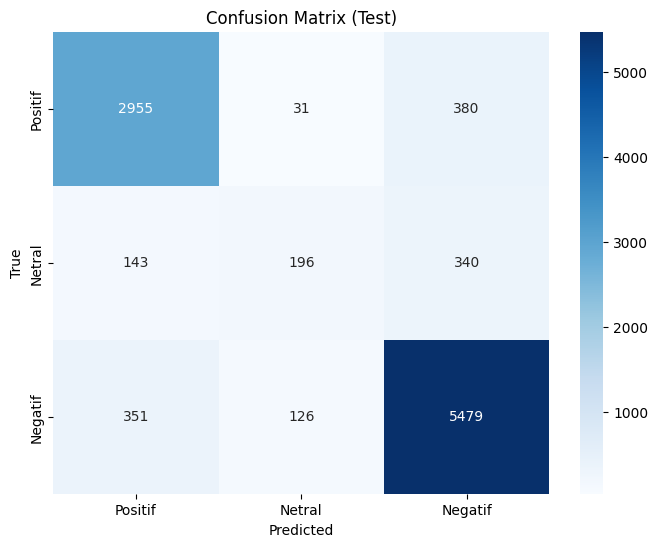

In [57]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluasi Model pada Data Uji
loss, accuracy = model_9.evaluate(X_test_padded, y_test_onehot)
print(f"Loss pada data uji: {loss}")
print(f"Akurasi pada data uji: {accuracy}")

# Membuat Confusion Matrix dan Laporan Klasifikasi
y_pred = model_9.predict(X_test_padded)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test_onehot, axis=1)

# Menghitung confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)
print('Confusion matrix:\n', cm)

# Menghitung metrik evaluasi lainnya
print('Accuracy:', accuracy_score(y_true, y_pred_classes))
print('Precision:', precision_score(y_true, y_pred_classes, average='weighted', zero_division=0))
print('Recall:', recall_score(y_true, y_pred_classes, average='weighted', zero_division=0))
print('F1-score:', f1_score(y_true, y_pred_classes, average='weighted', zero_division=0))
print(classification_report(y_true, y_pred_classes, digits=4))

# Visualisasi confusion matrix
plt.figure(figsize=(8, 6))
class_labels = ['Positif', 'Netral', 'Negatif']
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Test)')
plt.show()

In [58]:
# Definisikan model Sequential
model_10 = Sequential()
# Tambahkan embedding layer
model_10.add(embedding_layer)
# Tambahkan Bidirectional LSTM
model_10.add(Bidirectional(LSTM(150, dropout=0.4, recurrent_dropout=0.4)))
# Tambahkan dense layer
model_10.add(Dense(128, activation="relu"))
# Tambahkan dropout
model_10.add(Dropout(0.5))
# Tambahkan output layer untuk klasifikasi multikelas (3 kelas)
model_10.add(Dense(3, activation="softmax"))
# Kompilasi model
model_10.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

In [59]:
history_10 = model_10.fit(X_train_padded, y_train_onehot, batch_size=64, epochs=10, validation_data=(X_test_padded, y_test_onehot))

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 231s 348ms/step - accuracy: 0.7720 - loss: 0.5988 - val_accuracy: 0.8493 - val_loss: 0.4062
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 180s 288ms/step - accuracy: 0.8391 - loss: 0.4340 - val_accuracy: 0.8563 - val_loss: 0.3853
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 183s 257ms/step - accuracy: 0.8549 - loss: 0.3928 - val_accuracy: 0.8587 - val_loss: 0.3712
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 170s 272ms/step - accuracy: 0.8620 - loss: 0.3702 - val_accuracy: 0.8592 - val_loss: 0.3686
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 162s 259ms/step - accuracy: 0.8643 - loss: 0.3597 - val_accuracy: 0.8645 - val_loss: 0.3712
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 161s 258ms/step - accuracy: 0.8664 - loss: 0.3438 - val_accuracy: 0.8630 - val_loss: 0.3696
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 179s 287ms/step - accuracy: 0.8744 - loss: 0.3310 - val_accuracy: 0.8635 - val_loss: 0.3633
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 192s 270ms/step - accuracy: 0.8773 -

In [60]:
# Simpan model
model_10.save('D:\skripsi - Copy\code\model_2\model_10.h5')

313/313 ━━━━━━━━━━━━━━━━━━━━ 17s 53ms/step - accuracy: 0.8396 - loss: 0.4451
Loss pada data uji: 0.3790358901023865
Akurasi pada data uji: 0.8660134077072144
313/313 ━━━━━━━━━━━━━━━━━━━━ 15s 46ms/step
Confusion matrix:
 [[2901   32  433]
 [ 134  176  369]
 [ 272  100 5584]]
Accuracy: 0.8660133986601339
Precision: 0.8547904292009507
Recall: 0.8660133986601339
F1-score: 0.8557401075741118
              precision    recall  f1-score   support

           0     0.8772    0.8619    0.8695      3366
           1     0.5714    0.2592    0.3566       679
           2     0.8744    0.9375    0.9049      5956

    accuracy                         0.8660     10001
   macro avg     0.7744    0.6862    0.7103     10001
weighted avg     0.8548    0.8660    0.8557     10001



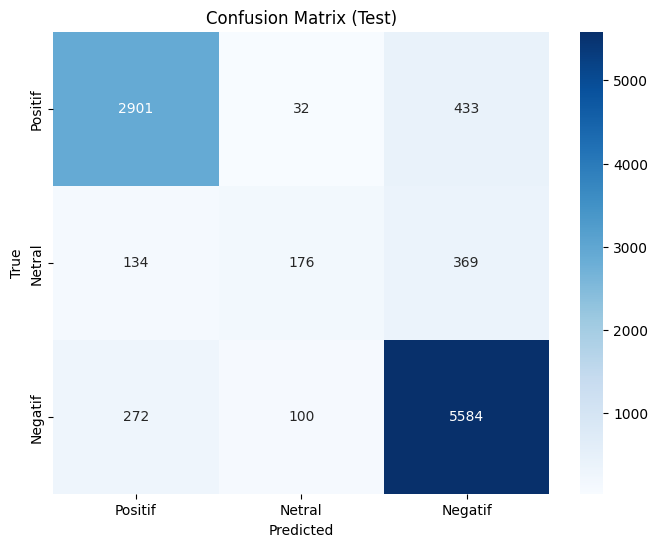

In [61]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluasi Model pada Data Uji
loss, accuracy = model_10.evaluate(X_test_padded, y_test_onehot)
print(f"Loss pada data uji: {loss}")
print(f"Akurasi pada data uji: {accuracy}")

# Membuat Confusion Matrix dan Laporan Klasifikasi
y_pred = model_10.predict(X_test_padded)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test_onehot, axis=1)

# Menghitung confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)
print('Confusion matrix:\n', cm)

# Menghitung metrik evaluasi lainnya
print('Accuracy:', accuracy_score(y_true, y_pred_classes))
print('Precision:', precision_score(y_true, y_pred_classes, average='weighted', zero_division=0))
print('Recall:', recall_score(y_true, y_pred_classes, average='weighted', zero_division=0))
print('F1-score:', f1_score(y_true, y_pred_classes, average='weighted', zero_division=0))
print(classification_report(y_true, y_pred_classes, digits=4))

# Visualisasi confusion matrix
plt.figure(figsize=(8, 6))
class_labels = ['Positif', 'Netral', 'Negatif']
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Test)')
plt.show()

In [62]:
# Definisikan model Sequential
model_11 = Sequential()
# Tambahkan embedding layer
model_11.add(embedding_layer)
# Tambahkan Bidirectional LSTM
model_11.add(Bidirectional(LSTM(150, dropout=0.4, recurrent_dropout=0.5)))
# Tambahkan dense layer
model_11.add(Dense(128, activation="relu"))
# Tambahkan dropout
model_11.add(Dropout(0.5))
# Tambahkan output layer untuk klasifikasi multikelas (3 kelas)
model_11.add(Dense(3, activation="softmax"))
# Kompilasi model
model_11.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

In [63]:
history_11 = model_11.fit(X_train_padded, y_train_onehot, batch_size=64, epochs=10, validation_data=(X_test_padded, y_test_onehot))

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 170s 263ms/step - accuracy: 0.7665 - loss: 0.6019 - val_accuracy: 0.8481 - val_loss: 0.4121
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 220s 352ms/step - accuracy: 0.8363 - loss: 0.4374 - val_accuracy: 0.8539 - val_loss: 0.3809
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 165s 264ms/step - accuracy: 0.8508 - loss: 0.3978 - val_accuracy: 0.8492 - val_loss: 0.4133
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 177s 283ms/step - accuracy: 0.8558 - loss: 0.3794 - val_accuracy: 0.8626 - val_loss: 0.3710
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 207s 291ms/step - accuracy: 0.8598 - loss: 0.3696 - val_accuracy: 0.8623 - val_loss: 0.3789
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 168s 269ms/step - accuracy: 0.8606 - loss: 0.3662 - val_accuracy: 0.8606 - val_loss: 0.3682
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 184s 293ms/step - accuracy: 0.8673 - loss: 0.3424 - val_accuracy: 0.8606 - val_loss: 0.3690
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 158s 253ms/step - accuracy: 0.8705 -

In [64]:
# Simpan model
model_11.save('D:\skripsi - Copy\code\model_2\model_11.h5')

313/313 ━━━━━━━━━━━━━━━━━━━━ 21s 67ms/step - accuracy: 0.8237 - loss: 0.4760
Loss pada data uji: 0.376495897769928
Akurasi pada data uji: 0.861913800239563
313/313 ━━━━━━━━━━━━━━━━━━━━ 21s 61ms/step
Confusion matrix:
 [[2822   34  510]
 [ 112  143  424]
 [ 220   81 5655]]
Accuracy: 0.8619138086191381
Precision: 0.8498907919614822
Recall: 0.8619138086191381
F1-score: 0.8489818131910375
              precision    recall  f1-score   support

           0     0.8947    0.8384    0.8656      3366
           1     0.5543    0.2106    0.3052       679
           2     0.8582    0.9495    0.9016      5956

    accuracy                         0.8619     10001
   macro avg     0.7691    0.6662    0.6908     10001
weighted avg     0.8499    0.8619    0.8490     10001



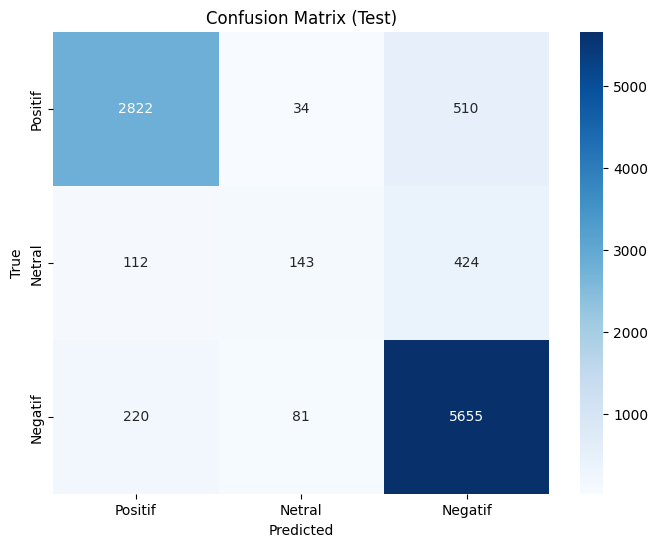

In [66]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluasi Model pada Data Uji
loss, accuracy = model_11.evaluate(X_test_padded, y_test_onehot)
print(f"Loss pada data uji: {loss}")
print(f"Akurasi pada data uji: {accuracy}")

# Membuat Confusion Matrix dan Laporan Klasifikasi
y_pred = model_11.predict(X_test_padded)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test_onehot, axis=1)

# Menghitung confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)
print('Confusion matrix:\n', cm)

# Menghitung metrik evaluasi lainnya
print('Accuracy:', accuracy_score(y_true, y_pred_classes))
print('Precision:', precision_score(y_true, y_pred_classes, average='weighted', zero_division=0))
print('Recall:', recall_score(y_true, y_pred_classes, average='weighted', zero_division=0))
print('F1-score:', f1_score(y_true, y_pred_classes, average='weighted', zero_division=0))
print(classification_report(y_true, y_pred_classes, digits=4))

# Visualisasi confusion matrix
plt.figure(figsize=(8, 6))
class_labels = ['Positif', 'Netral', 'Negatif']
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Test)')
plt.show()

## HYPERPARAMETER (DENSE UNIT)

In [67]:
# Definisikan model Sequential
model_12 = Sequential()
# Tambahkan embedding layer
model_12.add(embedding_layer)
# Tambahkan Bidirectional LSTM
model_12.add(Bidirectional(LSTM(150, dropout=0.4, recurrent_dropout=0.4)))
# Tambahkan dense layer
model_12.add(Dense(64, activation="relu"))
# Tambahkan dropout
model_12.add(Dropout(0.5))
# Tambahkan output layer untuk klasifikasi multikelas (3 kelas)
model_12.add(Dense(3, activation="softmax"))
# Kompilasi model
model_12.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

In [73]:
history_12 = model_12.fit(X_train_padded, y_train_onehot, batch_size=64, epochs=10, validation_data=(X_test_padded, y_test_onehot))

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 203s 325ms/step - accuracy: 0.8224 - loss: 0.4864 - val_accuracy: 0.8500 - val_loss: 0.3923
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 328s 525ms/step - accuracy: 0.8459 - loss: 0.4133 - val_accuracy: 0.8569 - val_loss: 0.3773
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 453s 638ms/step - accuracy: 0.8536 - loss: 0.3939 - val_accuracy: 0.8611 - val_loss: 0.3714
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 368s 589ms/step - accuracy: 0.8590 - loss: 0.3730 - val_accuracy: 0.8615 - val_loss: 0.3695
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 361s 577ms/step - accuracy: 0.8622 - loss: 0.3609 - val_accuracy: 0.8625 - val_loss: 0.3788
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 234s 373ms/step - accuracy: 0.8646 - loss: 0.3494 - val_accuracy: 0.8627 - val_loss: 0.3748
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 158s 252ms/step - accuracy: 0.8741 - loss: 0.3367 - val_accuracy: 0.8619 - val_loss: 0.3712
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 157s 251ms/step - accuracy: 0.8773 -

In [74]:
# Simpan model
model_12.save('D:\skripsi - Copy\code\model_2\model_12.h5')

313/313 ━━━━━━━━━━━━━━━━━━━━ 15s 48ms/step - accuracy: 0.8315 - loss: 0.4686
Loss pada data uji: 0.38308537006378174
Akurasi pada data uji: 0.8652134537696838
313/313 ━━━━━━━━━━━━━━━━━━━━ 17s 50ms/step
Confusion matrix:
 [[2877   17  472]
 [ 128  132  419]
 [ 260   52 5644]]
Accuracy: 0.8652134786521348
Precision: 0.8554994961692546
Recall: 0.8652134786521348
F1-score: 0.8506051941834067
              precision    recall  f1-score   support

           0     0.8812    0.8547    0.8677      3366
           1     0.6567    0.1944    0.3000       679
           2     0.8637    0.9476    0.9037      5956

    accuracy                         0.8652     10001
   macro avg     0.8005    0.6656    0.6905     10001
weighted avg     0.8555    0.8652    0.8506     10001



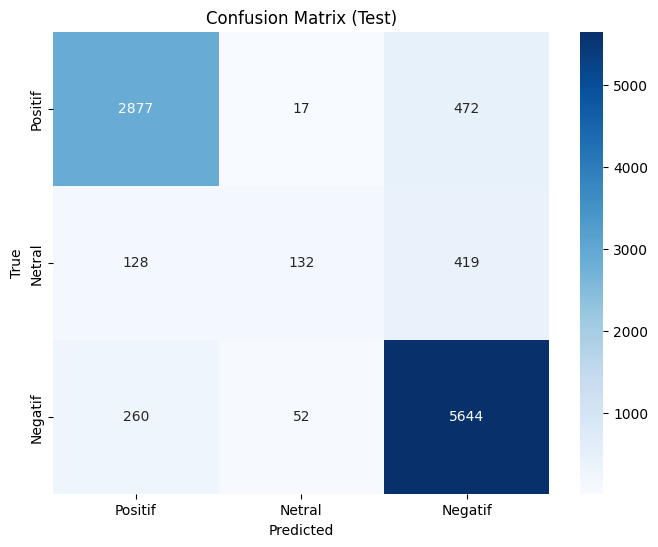

In [75]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluasi Model pada Data Uji
loss, accuracy = model_12.evaluate(X_test_padded, y_test_onehot)
print(f"Loss pada data uji: {loss}")
print(f"Akurasi pada data uji: {accuracy}")

# Membuat Confusion Matrix dan Laporan Klasifikasi
y_pred = model_12.predict(X_test_padded)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test_onehot, axis=1)

# Menghitung confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)
print('Confusion matrix:\n', cm)

# Menghitung metrik evaluasi lainnya
print('Accuracy:', accuracy_score(y_true, y_pred_classes))
print('Precision:', precision_score(y_true, y_pred_classes, average='weighted', zero_division=0))
print('Recall:', recall_score(y_true, y_pred_classes, average='weighted', zero_division=0))
print('F1-score:', f1_score(y_true, y_pred_classes, average='weighted', zero_division=0))
print(classification_report(y_true, y_pred_classes, digits=4))

# Visualisasi confusion matrix
plt.figure(figsize=(8, 6))
class_labels = ['Positif', 'Netral', 'Negatif']
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Test)')
plt.show()

In [76]:
# Definisikan model Sequential
model_13 = Sequential()
# Tambahkan embedding layer
model_13.add(embedding_layer)
# Tambahkan Bidirectional LSTM
model_13.add(Bidirectional(LSTM(150, dropout=0.4, recurrent_dropout=0.4)))
# Tambahkan dense layer
model_13.add(Dense(128, activation="relu"))
# Tambahkan dropout
model_13.add(Dropout(0.5))
# Tambahkan output layer untuk klasifikasi multikelas (3 kelas)
model_13.add(Dense(3, activation="softmax"))
# Kompilasi model
model_13.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

In [77]:
history_13 = model_13.fit(X_train_padded, y_train_onehot, batch_size=64, epochs=10, validation_data=(X_test_padded, y_test_onehot))

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 163s 252ms/step - accuracy: 0.7705 - loss: 0.5974 - val_accuracy: 0.8471 - val_loss: 0.4020
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 194s 238ms/step - accuracy: 0.8361 - loss: 0.4344 - val_accuracy: 0.8547 - val_loss: 0.3871
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 154s 246ms/step - accuracy: 0.8491 - loss: 0.4029 - val_accuracy: 0.8534 - val_loss: 0.3787
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 154s 246ms/step - accuracy: 0.8593 - loss: 0.3724 - val_accuracy: 0.8616 - val_loss: 0.3641
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 197s 238ms/step - accuracy: 0.8627 - loss: 0.3536 - val_accuracy: 0.8616 - val_loss: 0.3730
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 205s 242ms/step - accuracy: 0.8683 - loss: 0.3449 - val_accuracy: 0.8612 - val_loss: 0.3684
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 201s 240ms/step - accuracy: 0.8738 - loss: 0.3280 - val_accuracy: 0.8661 - val_loss: 0.3658
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 202s 241ms/step - accuracy: 0.8782 -

In [78]:
# Simpan model
model_13.save('D:\skripsi - Copy\code\model_2\model_13.h5')

313/313 ━━━━━━━━━━━━━━━━━━━━ 15s 48ms/step - accuracy: 0.8399 - loss: 0.4394
Loss pada data uji: 0.38378021121025085
Akurasi pada data uji: 0.8618138432502747
313/313 ━━━━━━━━━━━━━━━━━━━━ 17s 50ms/step
Confusion matrix:
 [[2919   41  406]
 [ 127  174  378]
 [ 322  108 5526]]
Accuracy: 0.8618138186181382
Precision: 0.8498177417344971
Recall: 0.8618138186181382
F1-score: 0.8519619633787002
              precision    recall  f1-score   support

           0     0.8667    0.8672    0.8669      3366
           1     0.5387    0.2563    0.3473       679
           2     0.8758    0.9278    0.9010      5956

    accuracy                         0.8618     10001
   macro avg     0.7604    0.6838    0.7051     10001
weighted avg     0.8498    0.8618    0.8520     10001



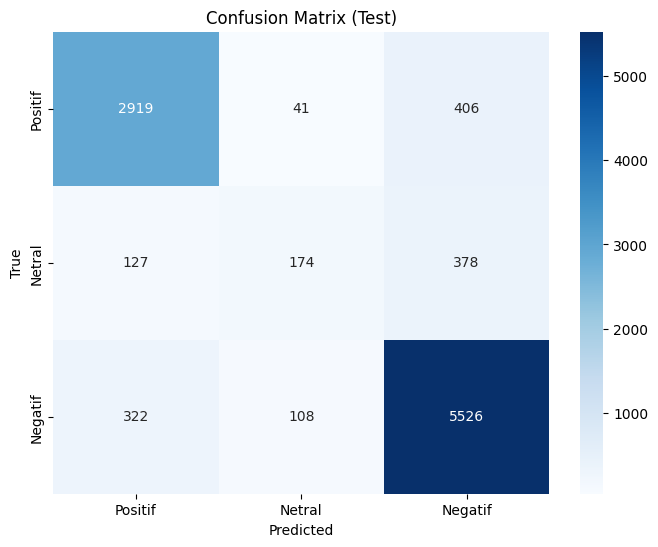

In [79]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluasi Model pada Data Uji
loss, accuracy = model_13.evaluate(X_test_padded, y_test_onehot)
print(f"Loss pada data uji: {loss}")
print(f"Akurasi pada data uji: {accuracy}")

# Membuat Confusion Matrix dan Laporan Klasifikasi
y_pred = model_13.predict(X_test_padded)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test_onehot, axis=1)

# Menghitung confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)
print('Confusion matrix:\n', cm)

# Menghitung metrik evaluasi lainnya
print('Accuracy:', accuracy_score(y_true, y_pred_classes))
print('Precision:', precision_score(y_true, y_pred_classes, average='weighted', zero_division=0))
print('Recall:', recall_score(y_true, y_pred_classes, average='weighted', zero_division=0))
print('F1-score:', f1_score(y_true, y_pred_classes, average='weighted', zero_division=0))
print(classification_report(y_true, y_pred_classes, digits=4))

# Visualisasi confusion matrix
plt.figure(figsize=(8, 6))
class_labels = ['Positif', 'Netral', 'Negatif']
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Test)')
plt.show()

In [80]:
# Definisikan model Sequential
model_14 = Sequential()
# Tambahkan embedding layer
model_14.add(embedding_layer)
# Tambahkan Bidirectional LSTM
model_14.add(Bidirectional(LSTM(150, dropout=0.4, recurrent_dropout=0.4)))
# Tambahkan dense layer
model_14.add(Dense(256, activation="relu"))
# Tambahkan dropout
model_14.add(Dropout(0.5))
# Tambahkan output layer untuk klasifikasi multikelas (3 kelas)
model_14.add(Dense(3, activation="softmax"))
# Kompilasi model
model_14.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

In [81]:
history_14 = model_14.fit(X_train_padded, y_train_onehot, batch_size=64, epochs=10, validation_data=(X_test_padded, y_test_onehot))

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 179s 253ms/step - accuracy: 0.7775 - loss: 0.5854 - val_accuracy: 0.8483 - val_loss: 0.4051
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 194s 240ms/step - accuracy: 0.8475 - loss: 0.4169 - val_accuracy: 0.8500 - val_loss: 0.3911
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 155s 247ms/step - accuracy: 0.8530 - loss: 0.3909 - val_accuracy: 0.8582 - val_loss: 0.3787
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 199s 243ms/step - accuracy: 0.8598 - loss: 0.3686 - val_accuracy: 0.8607 - val_loss: 0.3720
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 154s 247ms/step - accuracy: 0.8588 - loss: 0.3662 - val_accuracy: 0.8591 - val_loss: 0.3845
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 196s 237ms/step - accuracy: 0.8706 - loss: 0.3396 - val_accuracy: 0.8576 - val_loss: 0.3822
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 154s 246ms/step - accuracy: 0.8745 - loss: 0.3350 - val_accuracy: 0.8588 - val_loss: 0.3702
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 197s 238ms/step - accuracy: 0.8774 -

In [82]:
# Simpan model
model_14.save('D:\skripsi - Copy\code\model_2\model_14.h5')

313/313 ━━━━━━━━━━━━━━━━━━━━ 13s 41ms/step - accuracy: 0.8375 - loss: 0.4602
Loss pada data uji: 0.39315006136894226
Akurasi pada data uji: 0.8594140410423279
313/313 ━━━━━━━━━━━━━━━━━━━━ 14s 42ms/step
Confusion matrix:
 [[2917   39  410]
 [ 121  153  405]
 [ 351   80 5525]]
Accuracy: 0.8594140585941406
Precision: 0.8468656715163398
Recall: 0.8594140585941406
F1-score: 0.8477155812632904
              precision    recall  f1-score   support

           0     0.8607    0.8666    0.8637      3366
           1     0.5625    0.2253    0.3218       679
           2     0.8715    0.9276    0.8987      5956

    accuracy                         0.8594     10001
   macro avg     0.7649    0.6732    0.6947     10001
weighted avg     0.8469    0.8594    0.8477     10001



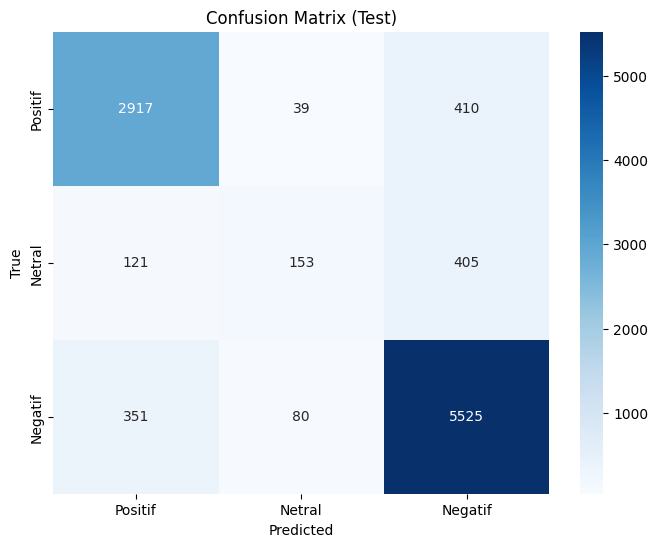

In [83]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluasi Model pada Data Uji
loss, accuracy = model_14.evaluate(X_test_padded, y_test_onehot)
print(f"Loss pada data uji: {loss}")
print(f"Akurasi pada data uji: {accuracy}")

# Membuat Confusion Matrix dan Laporan Klasifikasi
y_pred = model_14.predict(X_test_padded)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test_onehot, axis=1)

# Menghitung confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)
print('Confusion matrix:\n', cm)

# Menghitung metrik evaluasi lainnya
print('Accuracy:', accuracy_score(y_true, y_pred_classes))
print('Precision:', precision_score(y_true, y_pred_classes, average='weighted', zero_division=0))
print('Recall:', recall_score(y_true, y_pred_classes, average='weighted', zero_division=0))
print('F1-score:', f1_score(y_true, y_pred_classes, average='weighted', zero_division=0))
print(classification_report(y_true, y_pred_classes, digits=4))

# Visualisasi confusion matrix
plt.figure(figsize=(8, 6))
class_labels = ['Positif', 'Netral', 'Negatif']
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Test)')
plt.show()

In [17]:
# Definisikan model Sequential
model_15 = Sequential()
# Tambahkan embedding layer
model_15.add(embedding_layer)
# Tambahkan Bidirectional LSTM
model_15.add(Bidirectional(LSTM(150, dropout=0.4, recurrent_dropout=0.4)))
# Tambahkan dense layer
model_15.add(Dense(512, activation="relu"))
# Tambahkan dropout
model_15.add(Dropout(0.5))
# Tambahkan output layer untuk klasifikasi multikelas (3 kelas)
model_15.add(Dense(3, activation="softmax"))
# Kompilasi model
model_15.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

In [18]:
history_15 = model_15.fit(X_train_padded, y_train_onehot, batch_size=64, epochs=10, validation_data=(X_test_padded, y_test_onehot))

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 159s 241ms/step - accuracy: 0.7785 - loss: 0.5791 - val_accuracy: 0.8483 - val_loss: 0.4032
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 200s 238ms/step - accuracy: 0.8388 - loss: 0.4282 - val_accuracy: 0.8530 - val_loss: 0.3879
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 148s 237ms/step - accuracy: 0.8508 - loss: 0.3942 - val_accuracy: 0.8583 - val_loss: 0.3708
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 151s 242ms/step - accuracy: 0.8562 - loss: 0.3743 - val_accuracy: 0.8618 - val_loss: 0.3640
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 149s 239ms/step - accuracy: 0.8636 - loss: 0.3542 - val_accuracy: 0.8642 - val_loss: 0.3646
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 150s 240ms/step - accuracy: 0.8630 - loss: 0.3514 - val_accuracy: 0.8635 - val_loss: 0.3697
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 403s 646ms/step - accuracy: 0.8726 - loss: 0.3276 - val_accuracy: 0.8620 - val_loss: 0.3687
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 360s 575ms/step - accuracy: 0.8792 -

In [19]:
# Simpan model
model_15.save('D:\skripsi - Copy\code\model_2\model_15.h5')

313/313 ━━━━━━━━━━━━━━━━━━━━ 31s 98ms/step - accuracy: 0.8266 - loss: 0.4805
Loss pada data uji: 0.384153813123703
Akurasi pada data uji: 0.8629137277603149
313/313 ━━━━━━━━━━━━━━━━━━━━ 34s 101ms/step
Confusion matrix:
 [[2838   44  484]
 [ 105  179  395]
 [ 232  111 5613]]
Accuracy: 0.8629137086291371
Precision: 0.8521343017351964
Recall: 0.8629137086291371
F1-score: 0.8531289299554583
              precision    recall  f1-score   support

           0     0.8939    0.8431    0.8678      3366
           1     0.5359    0.2636    0.3534       679
           2     0.8646    0.9424    0.9018      5956

    accuracy                         0.8629     10001
   macro avg     0.7648    0.6831    0.7077     10001
weighted avg     0.8521    0.8629    0.8531     10001



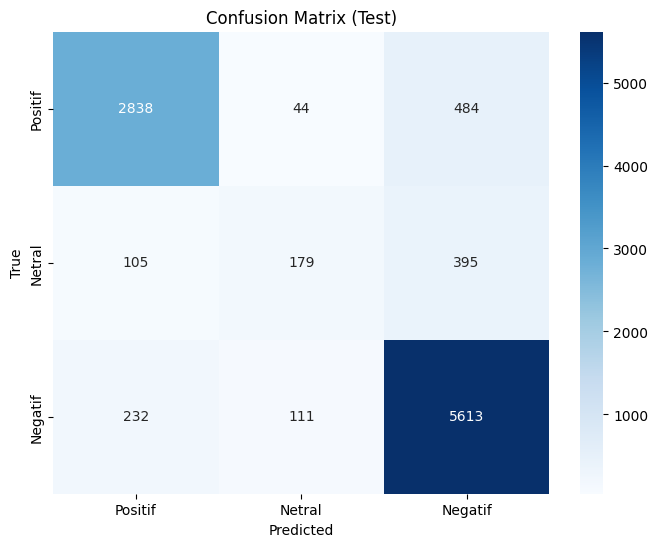

In [20]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluasi Model pada Data Uji
loss, accuracy = model_15.evaluate(X_test_padded, y_test_onehot)
print(f"Loss pada data uji: {loss}")
print(f"Akurasi pada data uji: {accuracy}")

# Membuat Confusion Matrix dan Laporan Klasifikasi
y_pred = model_15.predict(X_test_padded)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test_onehot, axis=1)

# Menghitung confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)
print('Confusion matrix:\n', cm)

# Menghitung metrik evaluasi lainnya
print('Accuracy:', accuracy_score(y_true, y_pred_classes))
print('Precision:', precision_score(y_true, y_pred_classes, average='weighted', zero_division=0))
print('Recall:', recall_score(y_true, y_pred_classes, average='weighted', zero_division=0))
print('F1-score:', f1_score(y_true, y_pred_classes, average='weighted', zero_division=0))
print(classification_report(y_true, y_pred_classes, digits=4))

# Visualisasi confusion matrix
plt.figure(figsize=(8, 6))
class_labels = ['Positif', 'Netral', 'Negatif']
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Test)')
plt.show()

## HYPERPARAMETER (DROPOUT LAYER)

In [22]:
# Definisikan model Sequential
model_16 = Sequential()
# Tambahkan embedding layer
model_16.add(embedding_layer)
# Tambahkan Bidirectional LSTM
model_16.add(Bidirectional(LSTM(150, dropout=0.4, recurrent_dropout=0.4)))
# Tambahkan dense layer
model_16.add(Dense(64, activation="relu"))
# Tambahkan dropout
model_16.add(Dropout(0.2))
# Tambahkan output layer untuk klasifikasi multikelas (3 kelas)
model_16.add(Dense(3, activation="softmax"))
# Kompilasi model
model_16.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

In [23]:
history_16 = model_16.fit(X_train_padded, y_train_onehot, batch_size=64, epochs=10, validation_data=(X_test_padded, y_test_onehot))

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 214s 330ms/step - accuracy: 0.7788 - loss: 0.5817 - val_accuracy: 0.8468 - val_loss: 0.4132
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 211s 338ms/step - accuracy: 0.8437 - loss: 0.4226 - val_accuracy: 0.8581 - val_loss: 0.3816
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 190s 303ms/step - accuracy: 0.8523 - loss: 0.3924 - val_accuracy: 0.8577 - val_loss: 0.3714
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 189s 283ms/step - accuracy: 0.8638 - loss: 0.3646 - val_accuracy: 0.8590 - val_loss: 0.3755
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 205s 288ms/step - accuracy: 0.8691 - loss: 0.3514 - val_accuracy: 0.8616 - val_loss: 0.3705
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 193s 309ms/step - accuracy: 0.8708 - loss: 0.3385 - val_accuracy: 0.8628 - val_loss: 0.3778
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 195s 312ms/step - accuracy: 0.8790 - loss: 0.3206 - val_accuracy: 0.8649 - val_loss: 0.3728
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 220s 352ms/step - accuracy: 0.8845 -

In [24]:
# Simpan model
model_16.save('D:\skripsi - Copy\code\model_2\model_16.h5')

313/313 ━━━━━━━━━━━━━━━━━━━━ 15s 49ms/step - accuracy: 0.8387 - loss: 0.4617
Loss pada data uji: 0.38908106088638306
Akurasi pada data uji: 0.8615138530731201
313/313 ━━━━━━━━━━━━━━━━━━━━ 20s 60ms/step
Confusion matrix:
 [[2907   44  415]
 [ 127  189  363]
 [ 299  137 5520]]
Accuracy: 0.8615138486151385
Precision: 0.8502020214418724
Recall: 0.8615138486151385
F1-score: 0.8531081028118676
              precision    recall  f1-score   support

           0     0.8722    0.8636    0.8679      3366
           1     0.5108    0.2784    0.3603       679
           2     0.8765    0.9268    0.9009      5956

    accuracy                         0.8615     10001
   macro avg     0.7532    0.6896    0.7097     10001
weighted avg     0.8502    0.8615    0.8531     10001



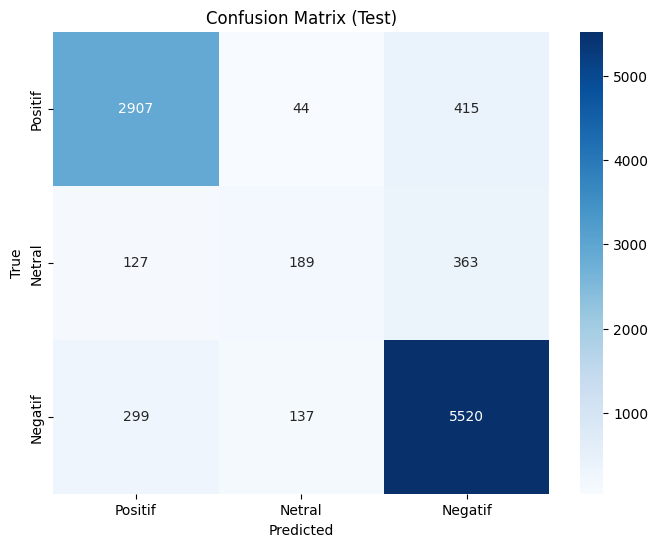

In [25]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluasi Model pada Data Uji
loss, accuracy = model_16.evaluate(X_test_padded, y_test_onehot)
print(f"Loss pada data uji: {loss}")
print(f"Akurasi pada data uji: {accuracy}")

# Membuat Confusion Matrix dan Laporan Klasifikasi
y_pred = model_16.predict(X_test_padded)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test_onehot, axis=1)

# Menghitung confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)
print('Confusion matrix:\n', cm)

# Menghitung metrik evaluasi lainnya
print('Accuracy:', accuracy_score(y_true, y_pred_classes))
print('Precision:', precision_score(y_true, y_pred_classes, average='weighted', zero_division=0))
print('Recall:', recall_score(y_true, y_pred_classes, average='weighted', zero_division=0))
print('F1-score:', f1_score(y_true, y_pred_classes, average='weighted', zero_division=0))
print(classification_report(y_true, y_pred_classes, digits=4))

# Visualisasi confusion matrix
plt.figure(figsize=(8, 6))
class_labels = ['Positif', 'Netral', 'Negatif']
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Test)')
plt.show()

In [17]:
# Definisikan model Sequential
model_17 = Sequential()
# Tambahkan embedding layer
model_17.add(embedding_layer)
# Tambahkan Bidirectional LSTM
model_17.add(Bidirectional(LSTM(150, dropout=0.4, recurrent_dropout=0.4)))
# Tambahkan dense layer
model_17.add(Dense(128, activation="relu"))
# Tambahkan dropout
model_17.add(Dropout(0.3))
# Tambahkan output layer untuk klasifikasi multikelas (3 kelas)
model_17.add(Dense(3, activation="softmax"))
# Kompilasi model
model_17.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

In [18]:
history_17 = model_17.fit(X_train_padded, y_train_onehot, batch_size=64, epochs=10, validation_data=(X_test_padded, y_test_onehot))

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 210s 325ms/step - accuracy: 0.7759 - loss: 0.5850 - val_accuracy: 0.8506 - val_loss: 0.3991
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 306s 490ms/step - accuracy: 0.8406 - loss: 0.4219 - val_accuracy: 0.8578 - val_loss: 0.3787
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 365s 558ms/step - accuracy: 0.8538 - loss: 0.3858 - val_accuracy: 0.8597 - val_loss: 0.3684
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 252s 403ms/step - accuracy: 0.8605 - loss: 0.3633 - val_accuracy: 0.8627 - val_loss: 0.3645
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 219s 351ms/step - accuracy: 0.8668 - loss: 0.3496 - val_accuracy: 0.8620 - val_loss: 0.3686
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 209s 264ms/step - accuracy: 0.8711 - loss: 0.3407 - val_accuracy: 0.8625 - val_loss: 0.3699
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 156s 250ms/step - accuracy: 0.8739 - loss: 0.3236 - val_accuracy: 0.8615 - val_loss: 0.3708
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 162s 259ms/step - accuracy: 0.8796 -

In [19]:
# Simpan model
model_17.save('D:\skripsi - Copy\code\model_2\model_17.h5')

313/313 ━━━━━━━━━━━━━━━━━━━━ 26s 82ms/step - accuracy: 0.8381 - loss: 0.4345
Loss pada data uji: 0.37893620133399963
Akurasi pada data uji: 0.8594140410423279
313/313 ━━━━━━━━━━━━━━━━━━━━ 28s 87ms/step
Confusion matrix:
 [[2900   45  421]
 [ 130  196  353]
 [ 317  140 5499]]
Accuracy: 0.8594140585941406
Precision: 0.8486029080995063
Recall: 0.8594140585941406
F1-score: 0.8514913334228059
              precision    recall  f1-score   support

           0     0.8664    0.8616    0.8640      3366
           1     0.5144    0.2887    0.3698       679
           2     0.8766    0.9233    0.8993      5956

    accuracy                         0.8594     10001
   macro avg     0.7525    0.6912    0.7110     10001
weighted avg     0.8486    0.8594    0.8515     10001



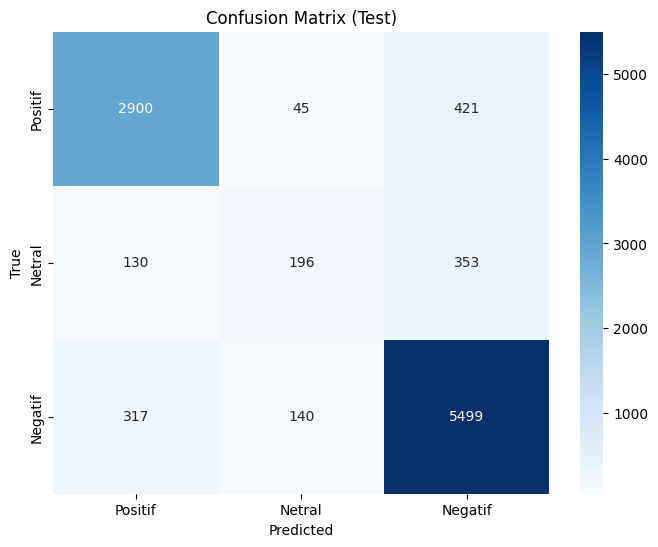

In [20]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluasi Model pada Data Uji
loss, accuracy = model_17.evaluate(X_test_padded, y_test_onehot)
print(f"Loss pada data uji: {loss}")
print(f"Akurasi pada data uji: {accuracy}")

# Membuat Confusion Matrix dan Laporan Klasifikasi
y_pred = model_17.predict(X_test_padded)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test_onehot, axis=1)

# Menghitung confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)
print('Confusion matrix:\n', cm)

# Menghitung metrik evaluasi lainnya
print('Accuracy:', accuracy_score(y_true, y_pred_classes))
print('Precision:', precision_score(y_true, y_pred_classes, average='weighted', zero_division=0))
print('Recall:', recall_score(y_true, y_pred_classes, average='weighted', zero_division=0))
print('F1-score:', f1_score(y_true, y_pred_classes, average='weighted', zero_division=0))
print(classification_report(y_true, y_pred_classes, digits=4))

# Visualisasi confusion matrix
plt.figure(figsize=(8, 6))
class_labels = ['Positif', 'Netral', 'Negatif']
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Test)')
plt.show()

In [21]:
# Definisikan model Sequential
model_18 = Sequential()
# Tambahkan embedding layer
model_18.add(embedding_layer)
# Tambahkan Bidirectional LSTM
model_18.add(Bidirectional(LSTM(150, dropout=0.4, recurrent_dropout=0.4)))
# Tambahkan dense layer
model_18.add(Dense(128, activation="relu"))
# Tambahkan dropout
model_18.add(Dropout(0.4))
# Tambahkan output layer untuk klasifikasi multikelas (3 kelas)
model_18.add(Dense(3, activation="softmax"))
# Kompilasi model
model_18.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

In [22]:
history_18 = model_18.fit(X_train_padded, y_train_onehot, batch_size=64, epochs=10, validation_data=(X_test_padded, y_test_onehot))

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 199s 297ms/step - accuracy: 0.7741 - loss: 0.5874 - val_accuracy: 0.8504 - val_loss: 0.4012
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 221s 326ms/step - accuracy: 0.8422 - loss: 0.4220 - val_accuracy: 0.8565 - val_loss: 0.3888
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 282s 357ms/step - accuracy: 0.8556 - loss: 0.3830 - val_accuracy: 0.8574 - val_loss: 0.3719
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 197s 252ms/step - accuracy: 0.8610 - loss: 0.3666 - val_accuracy: 0.8615 - val_loss: 0.3668
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 170s 271ms/step - accuracy: 0.8709 - loss: 0.3442 - val_accuracy: 0.8640 - val_loss: 0.3617
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 170s 272ms/step - accuracy: 0.8723 - loss: 0.3384 - val_accuracy: 0.8625 - val_loss: 0.3618
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 220s 301ms/step - accuracy: 0.8731 - loss: 0.3262 - val_accuracy: 0.8606 - val_loss: 0.3745
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 202s 301ms/step - accuracy: 0.8735 -

In [23]:
# Simpan model
model_18.save('D:\skripsi - Copy\code\model_2\model_18.h5')

In [57]:
from tensorflow.keras.models import load_model

# Memuat model yang telah disimpan
model = load_model('D:/skripsi - Copy/code/model_bi-lstm.h5')

313/313 ━━━━━━━━━━━━━━━━━━━━ 16s 50ms/step - accuracy: 0.8414 - loss: 0.4407
Loss pada data uji: 0.38127821683883667
Akurasi pada data uji: 0.8609139323234558
313/313 ━━━━━━━━━━━━━━━━━━━━ 19s 58ms/step
Confusion matrix:
 [[2929   53  384]
 [ 124  174  381]
 [ 336  113 5507]]
Accuracy: 0.8609139086091391
Precision: 0.8485304299312911
Recall: 0.8609139086091391
F1-score: 0.8514748072893235
              precision    recall  f1-score   support

           0     0.8643    0.8702    0.8672      3366
           1     0.5118    0.2563    0.3415       679
           2     0.8780    0.9246    0.9007      5956

    accuracy                         0.8609     10001
   macro avg     0.7514    0.6837    0.7031     10001
weighted avg     0.8485    0.8609    0.8515     10001



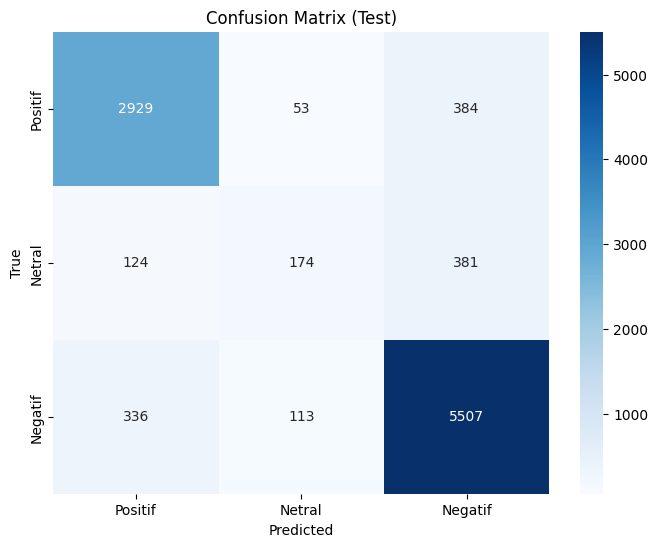

In [24]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluasi Model pada Data Uji
loss, accuracy = model_18.evaluate(X_test_padded, y_test_onehot)
print(f"Loss pada data uji: {loss}")
print(f"Akurasi pada data uji: {accuracy}")

# Membuat Confusion Matrix dan Laporan Klasifikasi
y_pred = model_18.predict(X_test_padded)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test_onehot, axis=1)

# Menghitung confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)
print('Confusion matrix:\n', cm)

# Menghitung metrik evaluasi lainnya
print('Accuracy:', accuracy_score(y_true, y_pred_classes))
print('Precision:', precision_score(y_true, y_pred_classes, average='weighted', zero_division=0))
print('Recall:', recall_score(y_true, y_pred_classes, average='weighted', zero_division=0))
print('F1-score:', f1_score(y_true, y_pred_classes, average='weighted', zero_division=0))
print(classification_report(y_true, y_pred_classes, digits=4))

# Visualisasi confusion matrix
plt.figure(figsize=(8, 6))
class_labels = ['Positif', 'Netral', 'Negatif']
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Test)')
plt.show()

In [26]:
# Definisikan model Sequential
model_19 = Sequential()
# Tambahkan embedding layer
model_19.add(embedding_layer)
# Tambahkan Bidirectional LSTM
model_19.add(Bidirectional(LSTM(150, dropout=0.4, recurrent_dropout=0.4)))
# Tambahkan dense layer
model_19.add(Dense(128, activation="relu"))
# Tambahkan dropout
model_19.add(Dropout(0.5))
# Tambahkan output layer untuk klasifikasi multikelas (3 kelas)
model_19.add(Dense(3, activation="softmax"))
# Kompilasi model
model_19.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

In [27]:
history_19 = model_19.fit(X_train_padded, y_train_onehot, batch_size=64, epochs=10, validation_data=(X_test_padded, y_test_onehot))

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 154s 236ms/step - accuracy: 0.7618 - loss: 0.6077 - val_accuracy: 0.8446 - val_loss: 0.4252
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 228s 364ms/step - accuracy: 0.8377 - loss: 0.4341 - val_accuracy: 0.8567 - val_loss: 0.3838
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 395s 576ms/step - accuracy: 0.8492 - loss: 0.3982 - val_accuracy: 0.8589 - val_loss: 0.3709
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 386s 617ms/step - accuracy: 0.8558 - loss: 0.3754 - val_accuracy: 0.8626 - val_loss: 0.3652
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 384s 614ms/step - accuracy: 0.8630 - loss: 0.3584 - val_accuracy: 0.8610 - val_loss: 0.3701
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 294s 471ms/step - accuracy: 0.8676 - loss: 0.3432 - val_accuracy: 0.8620 - val_loss: 0.3777
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 158s 253ms/step - accuracy: 0.8720 - loss: 0.3357 - val_accuracy: 0.8622 - val_loss: 0.3671
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 157s 251ms/step - accuracy: 0.8762 -

In [28]:
# Simpan model
model_19.save('D:\skripsi - Copy\code\model_2\model_19.h5')

313/313 ━━━━━━━━━━━━━━━━━━━━ 16s 51ms/step - accuracy: 0.8261 - loss: 0.4920
Loss pada data uji: 0.3850029408931732
Akurasi pada data uji: 0.86541348695755
313/313 ━━━━━━━━━━━━━━━━━━━━ 17s 51ms/step
Confusion matrix:
 [[2831   39  496]
 [ 105  175  399]
 [ 217   90 5649]]
Accuracy: 0.8654134586541345
Precision: 0.8553682429884145
Recall: 0.8654134586541345
F1-score: 0.854767550077648
              precision    recall  f1-score   support

           0     0.8979    0.8411    0.8685      3366
           1     0.5757    0.2577    0.3561       679
           2     0.8632    0.9485    0.9038      5956

    accuracy                         0.8654     10001
   macro avg     0.7789    0.6824    0.7095     10001
weighted avg     0.8554    0.8654    0.8548     10001



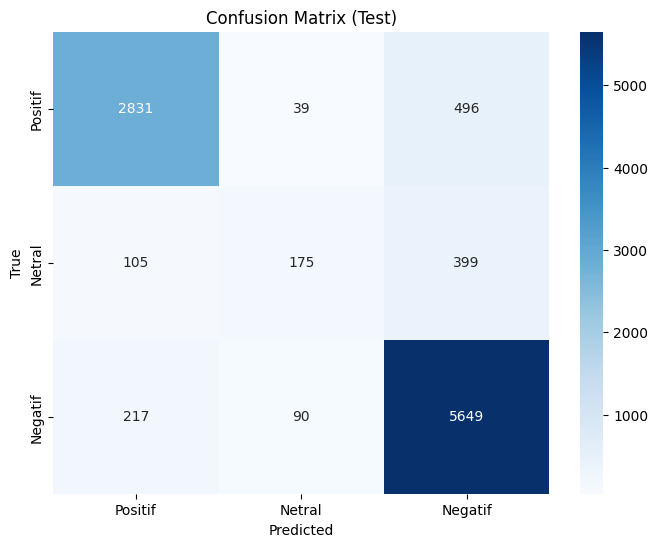

In [29]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluasi Model pada Data Uji
loss, accuracy = model_19.evaluate(X_test_padded, y_test_onehot)
print(f"Loss pada data uji: {loss}")
print(f"Akurasi pada data uji: {accuracy}")

# Membuat Confusion Matrix dan Laporan Klasifikasi
y_pred = model_19.predict(X_test_padded)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test_onehot, axis=1)

# Menghitung confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)
print('Confusion matrix:\n', cm)

# Menghitung metrik evaluasi lainnya
print('Accuracy:', accuracy_score(y_true, y_pred_classes))
print('Precision:', precision_score(y_true, y_pred_classes, average='weighted', zero_division=0))
print('Recall:', recall_score(y_true, y_pred_classes, average='weighted', zero_division=0))
print('F1-score:', f1_score(y_true, y_pred_classes, average='weighted', zero_division=0))
print(classification_report(y_true, y_pred_classes, digits=4))

# Visualisasi confusion matrix
plt.figure(figsize=(8, 6))
class_labels = ['Positif', 'Netral', 'Negatif']
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Test)')
plt.show()

## HYPERPARAMETER (LEARNING RATE)

In [30]:
# Definisikan model Sequential
model_20 = Sequential()
# Tambahkan embedding layer
model_20.add(embedding_layer)
# Tambahkan Bidirectional LSTM
model_20.add(Bidirectional(LSTM(150, dropout=0.4, recurrent_dropout=0.4)))
# Tambahkan dense layer
model_20.add(Dense(128, activation="relu"))
# Tambahkan dropout
model_20.add(Dropout(0.5))
# Tambahkan output layer untuk klasifikasi multikelas (3 kelas)
model_20.add(Dense(3, activation="softmax"))
# Kompilasi model
model_20.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

In [31]:
history_20 = model_20.fit(X_train_padded, y_train_onehot, batch_size=64, epochs=10, validation_data=(X_test_padded, y_test_onehot))

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 228s 352ms/step - accuracy: 0.7683 - loss: 0.5995 - val_accuracy: 0.8445 - val_loss: 0.4137
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 215s 344ms/step - accuracy: 0.8337 - loss: 0.4392 - val_accuracy: 0.8578 - val_loss: 0.3834
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 174s 279ms/step - accuracy: 0.8522 - loss: 0.3951 - val_accuracy: 0.8594 - val_loss: 0.3734
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 160s 256ms/step - accuracy: 0.8598 - loss: 0.3732 - val_accuracy: 0.8622 - val_loss: 0.3687
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 167s 268ms/step - accuracy: 0.8648 - loss: 0.3602 - val_accuracy: 0.8637 - val_loss: 0.3738
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 202s 267ms/step - accuracy: 0.8661 - loss: 0.3476 - val_accuracy: 0.8631 - val_loss: 0.3722
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 184s 294ms/step - accuracy: 0.8704 - loss: 0.3392 - val_accuracy: 0.8637 - val_loss: 0.3776
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 193s 280ms/step - accuracy: 0.8779 -

In [32]:
# Simpan model
model_20.save('D:\skripsi - Copy\code\model_2\model_20.h5')

313/313 ━━━━━━━━━━━━━━━━━━━━ 13s 40ms/step - accuracy: 0.8380 - loss: 0.4641
Loss pada data uji: 0.38677483797073364
Akurasi pada data uji: 0.8631137013435364
313/313 ━━━━━━━━━━━━━━━━━━━━ 14s 41ms/step
Confusion matrix:
 [[2900   38  428]
 [ 113  180  386]
 [ 300  104 5552]]
Accuracy: 0.8631136886311369
Precision: 0.8519531646367149
Recall: 0.8631136886311369
F1-score: 0.8533618625227097
              precision    recall  f1-score   support

           0     0.8753    0.8616    0.8684      3366
           1     0.5590    0.2651    0.3596       679
           2     0.8721    0.9322    0.9012      5956

    accuracy                         0.8631     10001
   macro avg     0.7688    0.6863    0.7097     10001
weighted avg     0.8520    0.8631    0.8534     10001



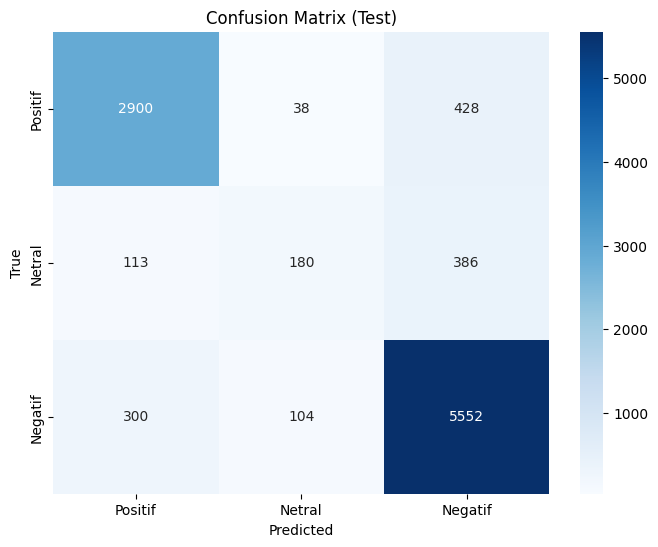

In [33]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluasi Model pada Data Uji
loss, accuracy = model_20.evaluate(X_test_padded, y_test_onehot)
print(f"Loss pada data uji: {loss}")
print(f"Akurasi pada data uji: {accuracy}")

# Membuat Confusion Matrix dan Laporan Klasifikasi
y_pred = model_20.predict(X_test_padded)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test_onehot, axis=1)

# Menghitung confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)
print('Confusion matrix:\n', cm)

# Menghitung metrik evaluasi lainnya
print('Accuracy:', accuracy_score(y_true, y_pred_classes))
print('Precision:', precision_score(y_true, y_pred_classes, average='weighted', zero_division=0))
print('Recall:', recall_score(y_true, y_pred_classes, average='weighted', zero_division=0))
print('F1-score:', f1_score(y_true, y_pred_classes, average='weighted', zero_division=0))
print(classification_report(y_true, y_pred_classes, digits=4))

# Visualisasi confusion matrix
plt.figure(figsize=(8, 6))
class_labels = ['Positif', 'Netral', 'Negatif']
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Test)')
plt.show()

In [34]:
# Definisikan model Sequential
model_21 = Sequential()
# Tambahkan embedding layer
model_21.add(embedding_layer)
# Tambahkan Bidirectional LSTM
model_21.add(Bidirectional(LSTM(150, dropout=0.4, recurrent_dropout=0.4)))
# Tambahkan dense layer
model_21.add(Dense(128, activation="relu"))
# Tambahkan dropout
model_21.add(Dropout(0.5))
# Tambahkan output layer untuk klasifikasi multikelas (3 kelas)
model_21.add(Dense(3, activation="softmax"))
# Kompilasi model
model_21.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.01), metrics=['accuracy'])

In [35]:
history_21 = model_21.fit(X_train_padded, y_train_onehot, batch_size=64, epochs=10, validation_data=(X_test_padded, y_test_onehot))

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 148s 228ms/step - accuracy: 0.7657 - loss: 0.6376 - val_accuracy: 0.7843 - val_loss: 0.5810
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 142s 227ms/step - accuracy: 0.7152 - loss: 0.7112 - val_accuracy: 0.7867 - val_loss: 0.5903
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 141s 226ms/step - accuracy: 0.7420 - loss: 0.6807 - val_accuracy: 0.5955 - val_loss: 0.8579
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 138s 221ms/step - accuracy: 0.5941 - loss: 0.8570 - val_accuracy: 0.5955 - val_loss: 0.8579
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 138s 221ms/step - accuracy: 0.5910 - loss: 0.8614 - val_accuracy: 0.5955 - val_loss: 0.8578
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 139s 222ms/step - accuracy: 0.5929 - loss: 0.8581 - val_accuracy: 0.5955 - val_loss: 0.8579
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 138s 221ms/step - accuracy: 0.5958 - loss: 0.8565 - val_accuracy: 0.5955 - val_loss: 0.8579
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 139s 222ms/step - accuracy: 0.5931 -

In [36]:
# Simpan model
model_21.save('D:\skripsi - Copy\code\model_2\model_21.h5')

313/313 ━━━━━━━━━━━━━━━━━━━━ 14s 43ms/step - accuracy: 0.2321 - loss: 1.0685
Loss pada data uji: 0.8578254580497742
Akurasi pada data uji: 0.595540463924408
313/313 ━━━━━━━━━━━━━━━━━━━━ 14s 42ms/step
Confusion matrix:
 [[   0    0 3366]
 [   0    0  679]
 [   0    0 5956]]
Accuracy: 0.5955404459554045
Precision: 0.35466842276876204
Recall: 0.5955404459554045
F1-score: 0.4445746564028814
              precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000      3366
           1     0.0000    0.0000    0.0000       679
           2     0.5955    1.0000    0.7465      5956

    accuracy                         0.5955     10001
   macro avg     0.1985    0.3333    0.2488     10001
weighted avg     0.3547    0.5955    0.4446     10001



C:\Users\anasafira\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\anasafira\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\anasafira\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classifica

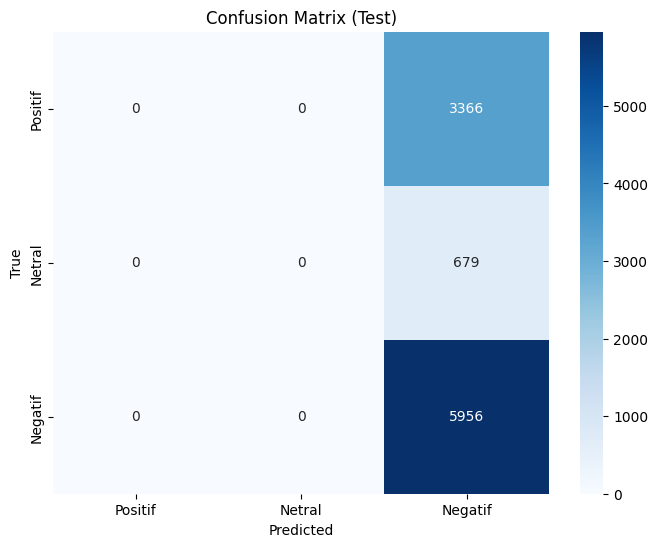

In [37]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluasi Model pada Data Uji
loss, accuracy = model_21.evaluate(X_test_padded, y_test_onehot)
print(f"Loss pada data uji: {loss}")
print(f"Akurasi pada data uji: {accuracy}")

# Membuat Confusion Matrix dan Laporan Klasifikasi
y_pred = model_21.predict(X_test_padded)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test_onehot, axis=1)

# Menghitung confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)
print('Confusion matrix:\n', cm)

# Menghitung metrik evaluasi lainnya
print('Accuracy:', accuracy_score(y_true, y_pred_classes))
print('Precision:', precision_score(y_true, y_pred_classes, average='weighted', zero_division=0))
print('Recall:', recall_score(y_true, y_pred_classes, average='weighted', zero_division=0))
print('F1-score:', f1_score(y_true, y_pred_classes, average='weighted', zero_division=0))
print(classification_report(y_true, y_pred_classes, digits=4))

# Visualisasi confusion matrix
plt.figure(figsize=(8, 6))
class_labels = ['Positif', 'Netral', 'Negatif']
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Test)')
plt.show()

In [38]:
# Definisikan model Sequential
model_22 = Sequential()
# Tambahkan embedding layer
model_22.add(embedding_layer)
# Tambahkan Bidirectional LSTM
model_22.add(Bidirectional(LSTM(150, dropout=0.4, recurrent_dropout=0.4)))
# Tambahkan dense layer
model_22.add(Dense(128, activation="relu"))
# Tambahkan dropout
model_22.add(Dropout(0.5))
# Tambahkan output layer untuk klasifikasi multikelas (3 kelas)
model_22.add(Dense(3, activation="softmax"))
# Kompilasi model
model_22.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.1), metrics=['accuracy'])

In [39]:
history_22 = model_22.fit(X_train_padded, y_train_onehot, batch_size=64, epochs=10, validation_data=(X_test_padded, y_test_onehot))

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 147s 229ms/step - accuracy: 0.5852 - loss: 1.0296 - val_accuracy: 0.5955 - val_loss: 0.8589
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 143s 229ms/step - accuracy: 0.5947 - loss: 0.8615 - val_accuracy: 0.5955 - val_loss: 0.8585
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 154s 246ms/step - accuracy: 0.5928 - loss: 0.8652 - val_accuracy: 0.5955 - val_loss: 0.8606
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 158s 253ms/step - accuracy: 0.5986 - loss: 0.8587 - val_accuracy: 0.5955 - val_loss: 0.8652
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 144s 230ms/step - accuracy: 0.5953 - loss: 0.8552 - val_accuracy: 0.5955 - val_loss: 0.8614
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 187s 299ms/step - accuracy: 0.5949 - loss: 0.8623 - val_accuracy: 0.5955 - val_loss: 0.8625
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 155s 247ms/step - accuracy: 0.5958 - loss: 0.8598 - val_accuracy: 0.5955 - val_loss: 0.8658
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 129s 206ms/step - accuracy: 0.5982 -

In [40]:
# Simpan model
model_22.save('D:\skripsi - Copy\code\model_2\model_22.h5')

313/313 ━━━━━━━━━━━━━━━━━━━━ 14s 45ms/step - accuracy: 0.2321 - loss: 1.0918
Loss pada data uji: 0.8607789874076843
Akurasi pada data uji: 0.595540463924408
313/313 ━━━━━━━━━━━━━━━━━━━━ 15s 46ms/step
Confusion matrix:
 [[   0    0 3366]
 [   0    0  679]
 [   0    0 5956]]
Accuracy: 0.5955404459554045
Precision: 0.35466842276876204
Recall: 0.5955404459554045
F1-score: 0.4445746564028814
              precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000      3366
           1     0.0000    0.0000    0.0000       679
           2     0.5955    1.0000    0.7465      5956

    accuracy                         0.5955     10001
   macro avg     0.1985    0.3333    0.2488     10001
weighted avg     0.3547    0.5955    0.4446     10001



C:\Users\anasafira\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\anasafira\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\anasafira\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classifica

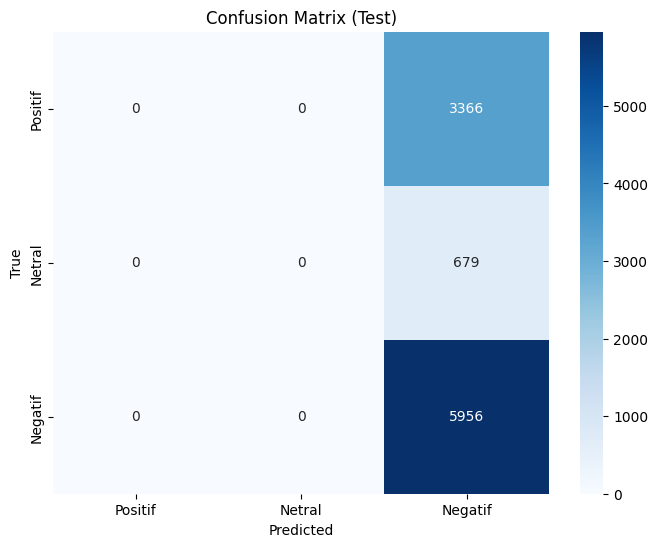

In [41]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluasi Model pada Data Uji
loss, accuracy = model_22.evaluate(X_test_padded, y_test_onehot)
print(f"Loss pada data uji: {loss}")
print(f"Akurasi pada data uji: {accuracy}")

# Membuat Confusion Matrix dan Laporan Klasifikasi
y_pred = model_22.predict(X_test_padded)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test_onehot, axis=1)

# Menghitung confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)
print('Confusion matrix:\n', cm)

# Menghitung metrik evaluasi lainnya
print('Accuracy:', accuracy_score(y_true, y_pred_classes))
print('Precision:', precision_score(y_true, y_pred_classes, average='weighted', zero_division=0))
print('Recall:', recall_score(y_true, y_pred_classes, average='weighted', zero_division=0))
print('F1-score:', f1_score(y_true, y_pred_classes, average='weighted', zero_division=0))
print(classification_report(y_true, y_pred_classes, digits=4))

# Visualisasi confusion matrix
plt.figure(figsize=(8, 6))
class_labels = ['Positif', 'Netral', 'Negatif']
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Test)')
plt.show()

In [42]:
# Definisikan model Sequential
model_23 = Sequential()
# Tambahkan embedding layer
model_23.add(embedding_layer)
# Tambahkan Bidirectional LSTM
model_23.add(Bidirectional(LSTM(150, dropout=0.4, recurrent_dropout=0.4)))
# Tambahkan dense layer
model_23.add(Dense(128, activation="relu"))
# Tambahkan dropout
model_23.add(Dropout(0.5))
# Tambahkan output layer untuk klasifikasi multikelas (3 kelas)
model_23.add(Dense(3, activation="softmax"))
# Kompilasi model
model_23.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.5), metrics=['accuracy'])

In [43]:
history_23 = model_23.fit(X_train_padded, y_train_onehot, batch_size=64, epochs=10, validation_data=(X_test_padded, y_test_onehot))

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 160s 245ms/step - accuracy: 0.5897 - loss: 3.9747 - val_accuracy: 0.5955 - val_loss: 0.8581
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 144s 230ms/step - accuracy: 0.5925 - loss: 0.8686 - val_accuracy: 0.5955 - val_loss: 0.8735
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 143s 229ms/step - accuracy: 0.5932 - loss: 0.8731 - val_accuracy: 0.5955 - val_loss: 0.8815
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 203s 231ms/step - accuracy: 0.5841 - loss: 0.8738 - val_accuracy: 0.5955 - val_loss: 0.8764
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 136s 218ms/step - accuracy: 0.5831 - loss: 0.8762 - val_accuracy: 0.5955 - val_loss: 0.8707
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 131s 209ms/step - accuracy: 0.5853 - loss: 0.8731 - val_accuracy: 0.5955 - val_loss: 0.8762
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 133s 213ms/step - accuracy: 0.5922 - loss: 0.8653 - val_accuracy: 0.5955 - val_loss: 0.8647
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 138s 206ms/step - accuracy: 0.5820 -

In [44]:
# Simpan model
model_23.save('D:\skripsi - Copy\code\model_2\model_23.h5')

313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 38ms/step - accuracy: 0.2321 - loss: 1.2118
Loss pada data uji: 0.8794845342636108
Akurasi pada data uji: 0.595540463924408
313/313 ━━━━━━━━━━━━━━━━━━━━ 13s 41ms/step
Confusion matrix:
 [[   0    0 3366]
 [   0    0  679]
 [   0    0 5956]]
Accuracy: 0.5955404459554045
Precision: 0.35466842276876204
Recall: 0.5955404459554045
F1-score: 0.4445746564028814
              precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000      3366
           1     0.0000    0.0000    0.0000       679
           2     0.5955    1.0000    0.7465      5956

    accuracy                         0.5955     10001
   macro avg     0.1985    0.3333    0.2488     10001
weighted avg     0.3547    0.5955    0.4446     10001



C:\Users\anasafira\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\anasafira\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\anasafira\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classifica

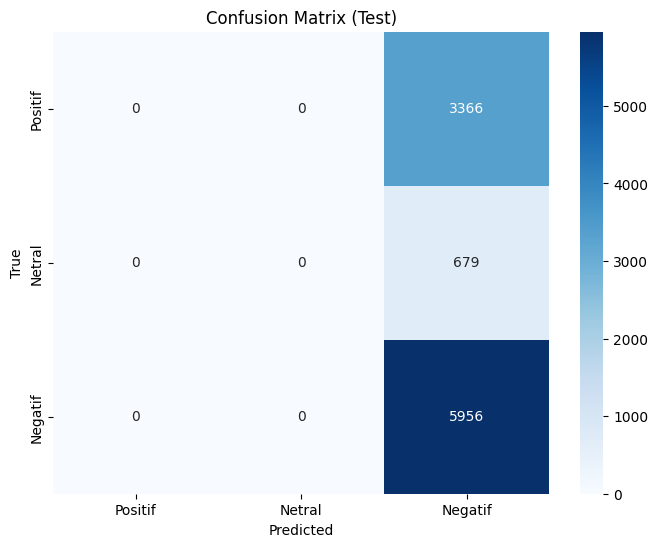

In [46]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluasi Model pada Data Uji
loss, accuracy = model_23.evaluate(X_test_padded, y_test_onehot)
print(f"Loss pada data uji: {loss}")
print(f"Akurasi pada data uji: {accuracy}")

# Membuat Confusion Matrix dan Laporan Klasifikasi
y_pred = model_23.predict(X_test_padded)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test_onehot, axis=1)

# Menghitung confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)
print('Confusion matrix:\n', cm)

# Menghitung metrik evaluasi lainnya
print('Accuracy:', accuracy_score(y_true, y_pred_classes))
print('Precision:', precision_score(y_true, y_pred_classes, average='weighted', zero_division=0))
print('Recall:', recall_score(y_true, y_pred_classes, average='weighted', zero_division=0))
print('F1-score:', f1_score(y_true, y_pred_classes, average='weighted', zero_division=0))
print(classification_report(y_true, y_pred_classes, digits=4))

# Visualisasi confusion matrix
plt.figure(figsize=(8, 6))
class_labels = ['Positif', 'Netral', 'Negatif']
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Test)')
plt.show()

## HYPERPARAMETER (BATCH SIZE)

In [19]:
# Definisikan model Sequential
model_24 = Sequential()
# Tambahkan embedding layer
model_24.add(embedding_layer)
# Tambahkan Bidirectional LSTM
model_24.add(Bidirectional(LSTM(150, dropout=0.4, recurrent_dropout=0.4)))
# Tambahkan dense layer
model_24.add(Dense(128, activation="relu"))
# Tambahkan dropout
model_24.add(Dropout(0.5))
# Tambahkan output layer untuk klasifikasi multikelas (3 kelas)
model_24.add(Dense(3, activation="softmax"))
# Kompilasi model
model_24.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

In [20]:
history_24 = model_24.fit(X_train_padded, y_train_onehot, batch_size=64, epochs=10, validation_data=(X_test_padded, y_test_onehot))

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 162s 248ms/step - accuracy: 0.7664 - loss: 0.5976 - val_accuracy: 0.8470 - val_loss: 0.4056
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 183s 292ms/step - accuracy: 0.8395 - loss: 0.4289 - val_accuracy: 0.8569 - val_loss: 0.3817
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 152s 243ms/step - accuracy: 0.8498 - loss: 0.3959 - val_accuracy: 0.8584 - val_loss: 0.3757
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 149s 239ms/step - accuracy: 0.8586 - loss: 0.3751 - val_accuracy: 0.8622 - val_loss: 0.3663
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 150s 241ms/step - accuracy: 0.8660 - loss: 0.3547 - val_accuracy: 0.8652 - val_loss: 0.3657
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 149s 238ms/step - accuracy: 0.8696 - loss: 0.3429 - val_accuracy: 0.8642 - val_loss: 0.3709
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 147s 236ms/step - accuracy: 0.8732 - loss: 0.3334 - val_accuracy: 0.8617 - val_loss: 0.3859
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 148s 237ms/step - accuracy: 0.8753 -

In [21]:
# Simpan model
model_24.save('D:\skripsi - Copy\code\model_2\model_24.h5')

313/313 ━━━━━━━━━━━━━━━━━━━━ 14s 43ms/step - accuracy: 0.8412 - loss: 0.4543
Loss pada data uji: 0.384665846824646
Akurasi pada data uji: 0.8671132922172546
313/313 ━━━━━━━━━━━━━━━━━━━━ 14s 44ms/step
Confusion matrix:
 [[2915   35  416]
 [ 123  178  378]
 [ 283   94 5579]]
Accuracy: 0.8671132886711329
Precision: 0.8561283053330284
Recall: 0.8671132886711329
F1-score: 0.8569218872251053
              precision    recall  f1-score   support

           0     0.8777    0.8660    0.8718      3366
           1     0.5798    0.2622    0.3611       679
           2     0.8754    0.9367    0.9050      5956

    accuracy                         0.8671     10001
   macro avg     0.7777    0.6883    0.7126     10001
weighted avg     0.8561    0.8671    0.8569     10001



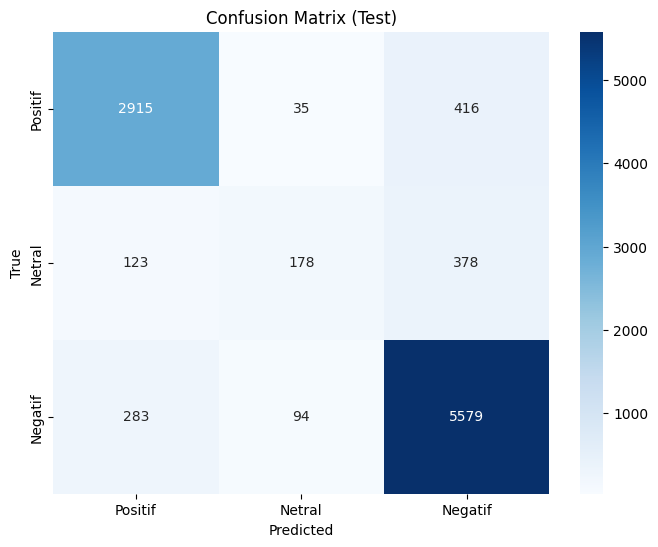

In [22]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluasi Model pada Data Uji
loss, accuracy = model_24.evaluate(X_test_padded, y_test_onehot)
print(f"Loss pada data uji: {loss}")
print(f"Akurasi pada data uji: {accuracy}")

# Membuat Confusion Matrix dan Laporan Klasifikasi
y_pred = model_24.predict(X_test_padded)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test_onehot, axis=1)

# Menghitung confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)
print('Confusion matrix:\n', cm)

# Menghitung metrik evaluasi lainnya
print('Accuracy:', accuracy_score(y_true, y_pred_classes))
print('Precision:', precision_score(y_true, y_pred_classes, average='weighted', zero_division=0))
print('Recall:', recall_score(y_true, y_pred_classes, average='weighted', zero_division=0))
print('F1-score:', f1_score(y_true, y_pred_classes, average='weighted', zero_division=0))
print(classification_report(y_true, y_pred_classes, digits=4))

# Visualisasi confusion matrix
plt.figure(figsize=(8, 6))
class_labels = ['Positif', 'Netral', 'Negatif']
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Test)')
plt.show()

In [23]:
# Definisikan model Sequential
model_25 = Sequential()
# Tambahkan embedding layer
model_25.add(embedding_layer)
# Tambahkan Bidirectional LSTM
model_25.add(Bidirectional(LSTM(150, dropout=0.4, recurrent_dropout=0.4)))
# Tambahkan dense layer
model_25.add(Dense(128, activation="relu"))
# Tambahkan dropout
model_25.add(Dropout(0.5))
# Tambahkan output layer untuk klasifikasi multikelas (3 kelas)
model_25.add(Dense(3, activation="softmax"))
# Kompilasi model
model_25.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

In [24]:
history_25 = model_25.fit(X_train_padded, y_train_onehot, batch_size=64, epochs=10, validation_data=(X_test_padded, y_test_onehot))

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 166s 257ms/step - accuracy: 0.7751 - loss: 0.5930 - val_accuracy: 0.8439 - val_loss: 0.4087
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 159s 254ms/step - accuracy: 0.8384 - loss: 0.4341 - val_accuracy: 0.8483 - val_loss: 0.3946
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 158s 253ms/step - accuracy: 0.8484 - loss: 0.3975 - val_accuracy: 0.8590 - val_loss: 0.3788
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 161s 258ms/step - accuracy: 0.8584 - loss: 0.3749 - val_accuracy: 0.8631 - val_loss: 0.3676
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 170s 272ms/step - accuracy: 0.8632 - loss: 0.3629 - val_accuracy: 0.8631 - val_loss: 0.3629
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 180s 288ms/step - accuracy: 0.8704 - loss: 0.3414 - val_accuracy: 0.8616 - val_loss: 0.3706
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 195s 276ms/step - accuracy: 0.8758 - loss: 0.3273 - val_accuracy: 0.8634 - val_loss: 0.3695
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 203s 278ms/step - accuracy: 0.8744 -

In [25]:
# Simpan model
model_25.save('D:\skripsi - Copy\code\model_2\model_25.h5')

313/313 ━━━━━━━━━━━━━━━━━━━━ 16s 51ms/step - accuracy: 0.8398 - loss: 0.4578
Loss pada data uji: 0.37940311431884766
Akurasi pada data uji: 0.8645135760307312
313/313 ━━━━━━━━━━━━━━━━━━━━ 18s 56ms/step
Confusion matrix:
 [[2893   42  431]
 [ 124  180  375]
 [ 277  106 5573]]
Accuracy: 0.8645135486451355
Precision: 0.8531450714082008
Recall: 0.8645135486451355
F1-score: 0.8548048673353071
              precision    recall  f1-score   support

           0     0.8783    0.8595    0.8688      3366
           1     0.5488    0.2651    0.3575       679
           2     0.8736    0.9357    0.9036      5956

    accuracy                         0.8645     10001
   macro avg     0.7669    0.6868    0.7100     10001
weighted avg     0.8531    0.8645    0.8548     10001



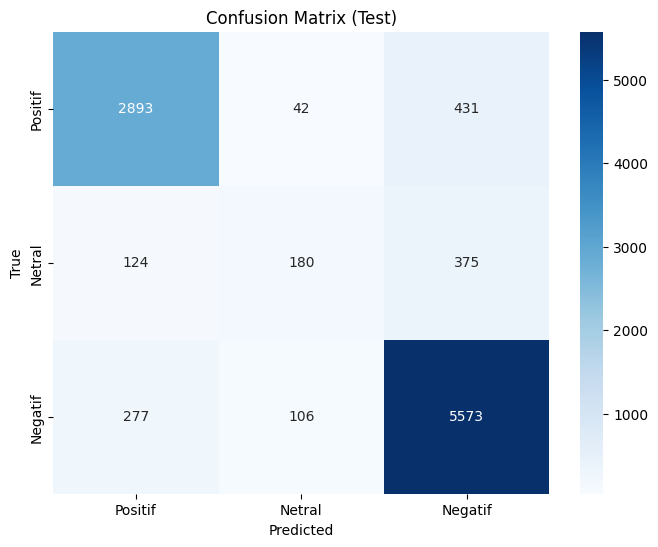

In [26]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluasi Model pada Data Uji
loss, accuracy = model_25.evaluate(X_test_padded, y_test_onehot)
print(f"Loss pada data uji: {loss}")
print(f"Akurasi pada data uji: {accuracy}")

# Membuat Confusion Matrix dan Laporan Klasifikasi
y_pred = model_25.predict(X_test_padded)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test_onehot, axis=1)

# Menghitung confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)
print('Confusion matrix:\n', cm)

# Menghitung metrik evaluasi lainnya
print('Accuracy:', accuracy_score(y_true, y_pred_classes))
print('Precision:', precision_score(y_true, y_pred_classes, average='weighted', zero_division=0))
print('Recall:', recall_score(y_true, y_pred_classes, average='weighted', zero_division=0))
print('F1-score:', f1_score(y_true, y_pred_classes, average='weighted', zero_division=0))
print(classification_report(y_true, y_pred_classes, digits=4))

# Visualisasi confusion matrix
plt.figure(figsize=(8, 6))
class_labels = ['Positif', 'Netral', 'Negatif']
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Test)')
plt.show()

In [27]:
# Definisikan model Sequential
model_26 = Sequential()
# Tambahkan embedding layer
model_26.add(embedding_layer)
# Tambahkan Bidirectional LSTM
model_26.add(Bidirectional(LSTM(150, dropout=0.4, recurrent_dropout=0.4)))
# Tambahkan dense layer
model_26.add(Dense(128, activation="relu"))
# Tambahkan dropout
model_26.add(Dropout(0.5))
# Tambahkan output layer untuk klasifikasi multikelas (3 kelas)
model_26.add(Dense(3, activation="softmax"))
# Kompilasi model
model_26.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

In [28]:
history_26 = model_26.fit(X_train_padded, y_train_onehot, batch_size=64, epochs=10, validation_data=(X_test_padded, y_test_onehot))

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 170s 263ms/step - accuracy: 0.7674 - loss: 0.5999 - val_accuracy: 0.8478 - val_loss: 0.4101
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 162s 260ms/step - accuracy: 0.8382 - loss: 0.4341 - val_accuracy: 0.8561 - val_loss: 0.3819
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 161s 258ms/step - accuracy: 0.8512 - loss: 0.3939 - val_accuracy: 0.8574 - val_loss: 0.3732
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 164s 263ms/step - accuracy: 0.8559 - loss: 0.3770 - val_accuracy: 0.8626 - val_loss: 0.3690
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 159s 255ms/step - accuracy: 0.8601 - loss: 0.3631 - val_accuracy: 0.8606 - val_loss: 0.3714
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 162s 259ms/step - accuracy: 0.8689 - loss: 0.3464 - val_accuracy: 0.8635 - val_loss: 0.3690
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 164s 263ms/step - accuracy: 0.8696 - loss: 0.3329 - val_accuracy: 0.8628 - val_loss: 0.3669
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 158s 253ms/step - accuracy: 0.8732 -

In [29]:
# Simpan model
model_26.save('D:\skripsi - Copy\code\model_2\model_26.h5')

313/313 ━━━━━━━━━━━━━━━━━━━━ 13s 42ms/step - accuracy: 0.8411 - loss: 0.4438
Loss pada data uji: 0.3832981586456299
Akurasi pada data uji: 0.8637136220932007
313/313 ━━━━━━━━━━━━━━━━━━━━ 15s 48ms/step
Confusion matrix:
 [[2913   28  425]
 [ 136  192  351]
 [ 315  108 5533]]
Accuracy: 0.8637136286371363
Precision: 0.8534760413755275
Recall: 0.8637136286371363
F1-score: 0.8545688902529928
              precision    recall  f1-score   support

           0     0.8659    0.8654    0.8657      3366
           1     0.5854    0.2828    0.3813       679
           2     0.8770    0.9290    0.9022      5956

    accuracy                         0.8637     10001
   macro avg     0.7761    0.6924    0.7164     10001
weighted avg     0.8535    0.8637    0.8546     10001



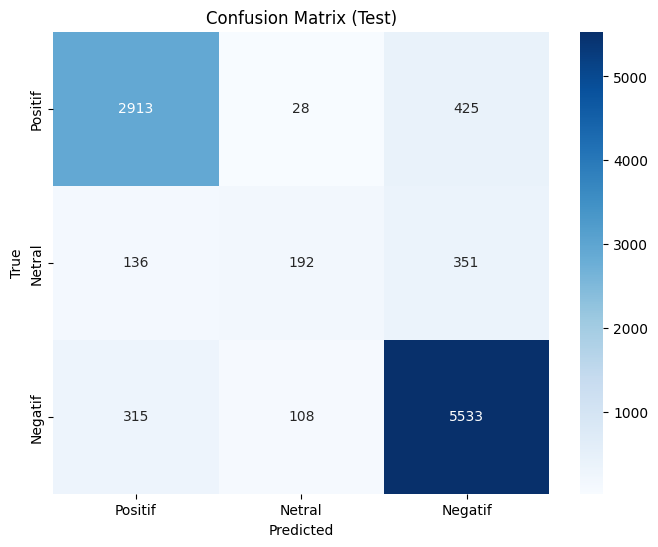

In [30]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluasi Model pada Data Uji
loss, accuracy = model_26.evaluate(X_test_padded, y_test_onehot)
print(f"Loss pada data uji: {loss}")
print(f"Akurasi pada data uji: {accuracy}")

# Membuat Confusion Matrix dan Laporan Klasifikasi
y_pred = model_26.predict(X_test_padded)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test_onehot, axis=1)

# Menghitung confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)
print('Confusion matrix:\n', cm)

# Menghitung metrik evaluasi lainnya
print('Accuracy:', accuracy_score(y_true, y_pred_classes))
print('Precision:', precision_score(y_true, y_pred_classes, average='weighted', zero_division=0))
print('Recall:', recall_score(y_true, y_pred_classes, average='weighted', zero_division=0))
print('F1-score:', f1_score(y_true, y_pred_classes, average='weighted', zero_division=0))
print(classification_report(y_true, y_pred_classes, digits=4))

# Visualisasi confusion matrix
plt.figure(figsize=(8, 6))
class_labels = ['Positif', 'Netral', 'Negatif']
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Test)')
plt.show()

In [31]:
# Definisikan model Sequential
model_27 = Sequential()
# Tambahkan embedding layer
model_27.add(embedding_layer)
# Tambahkan Bidirectional LSTM
model_27.add(Bidirectional(LSTM(150, dropout=0.4, recurrent_dropout=0.4)))
# Tambahkan dense layer
model_27.add(Dense(128, activation="relu"))
# Tambahkan dropout
model_27.add(Dropout(0.5))
# Tambahkan output layer untuk klasifikasi multikelas (3 kelas)
model_27.add(Dense(3, activation="softmax"))
# Kompilasi model
model_27.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

In [32]:
history_27 = model_27.fit(X_train_padded, y_train_onehot, batch_size=64, epochs=10, validation_data=(X_test_padded, y_test_onehot))

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 160s 250ms/step - accuracy: 0.7776 - loss: 0.5945 - val_accuracy: 0.8487 - val_loss: 0.4016
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 158s 253ms/step - accuracy: 0.8372 - loss: 0.4345 - val_accuracy: 0.8566 - val_loss: 0.3882
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 156s 249ms/step - accuracy: 0.8552 - loss: 0.3910 - val_accuracy: 0.8583 - val_loss: 0.3658
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 161s 258ms/step - accuracy: 0.8593 - loss: 0.3662 - val_accuracy: 0.8604 - val_loss: 0.3657
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 156s 249ms/step - accuracy: 0.8629 - loss: 0.3577 - val_accuracy: 0.8615 - val_loss: 0.3757
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 197s 241ms/step - accuracy: 0.8686 - loss: 0.3475 - val_accuracy: 0.8626 - val_loss: 0.3650
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 157s 252ms/step - accuracy: 0.8743 - loss: 0.3308 - val_accuracy: 0.8650 - val_loss: 0.3702
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 155s 248ms/step - accuracy: 0.8725 -

In [33]:
# Simpan model
model_27.save('D:\skripsi - Copy\code\model_2\model_27.h5')

313/313 ━━━━━━━━━━━━━━━━━━━━ 13s 43ms/step - accuracy: 0.8440 - loss: 0.4281
Loss pada data uji: 0.37500911951065063
Akurasi pada data uji: 0.8623137474060059
313/313 ━━━━━━━━━━━━━━━━━━━━ 15s 46ms/step
Confusion matrix:
 [[2934   49  383]
 [ 135  211  333]
 [ 314  163 5479]]
Accuracy: 0.8623137686231377
Precision: 0.8524724130232257
Recall: 0.8623137686231377
F1-score: 0.8557002861189086
              precision    recall  f1-score   support

           0     0.8673    0.8717    0.8695      3366
           1     0.4988    0.3108    0.3829       679
           2     0.8844    0.9199    0.9018      5956

    accuracy                         0.8623     10001
   macro avg     0.7502    0.7008    0.7181     10001
weighted avg     0.8525    0.8623    0.8557     10001



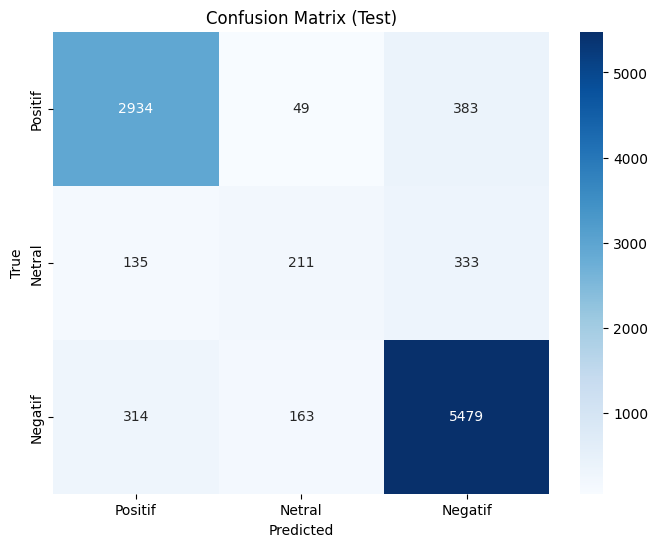

In [34]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluasi Model pada Data Uji
loss, accuracy = model_27.evaluate(X_test_padded, y_test_onehot)
print(f"Loss pada data uji: {loss}")
print(f"Akurasi pada data uji: {accuracy}")

# Membuat Confusion Matrix dan Laporan Klasifikasi
y_pred = model_27.predict(X_test_padded)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test_onehot, axis=1)

# Menghitung confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)
print('Confusion matrix:\n', cm)

# Menghitung metrik evaluasi lainnya
print('Accuracy:', accuracy_score(y_true, y_pred_classes))
print('Precision:', precision_score(y_true, y_pred_classes, average='weighted', zero_division=0))
print('Recall:', recall_score(y_true, y_pred_classes, average='weighted', zero_division=0))
print('F1-score:', f1_score(y_true, y_pred_classes, average='weighted', zero_division=0))
print(classification_report(y_true, y_pred_classes, digits=4))

# Visualisasi confusion matrix
plt.figure(figsize=(8, 6))
class_labels = ['Positif', 'Netral', 'Negatif']
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Test)')
plt.show()

## HYPERPARAMETER (EPOCH)

In [35]:
# Definisikan model Sequential
model_28 = Sequential()
# Tambahkan embedding layer
model_28.add(embedding_layer)
# Tambahkan Bidirectional LSTM
model_28.add(Bidirectional(LSTM(150, dropout=0.4, recurrent_dropout=0.4)))
# Tambahkan dense layer
model_28.add(Dense(128, activation="relu"))
# Tambahkan dropout
model_28.add(Dropout(0.5))
# Tambahkan output layer untuk klasifikasi multikelas (3 kelas)
model_28.add(Dense(3, activation="softmax"))
# Kompilasi model
model_28.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

In [36]:
history_28 = model_28.fit(X_train_padded, y_train_onehot, batch_size=64, epochs=10, validation_data=(X_test_padded, y_test_onehot))

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 201s 310ms/step - accuracy: 0.7735 - loss: 0.5889 - val_accuracy: 0.8502 - val_loss: 0.4143
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 186s 284ms/step - accuracy: 0.8387 - loss: 0.4372 - val_accuracy: 0.8572 - val_loss: 0.3777
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 175s 280ms/step - accuracy: 0.8510 - loss: 0.4017 - val_accuracy: 0.8592 - val_loss: 0.3723
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 169s 270ms/step - accuracy: 0.8577 - loss: 0.3778 - val_accuracy: 0.8602 - val_loss: 0.3695
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 150s 240ms/step - accuracy: 0.8585 - loss: 0.3710 - val_accuracy: 0.8595 - val_loss: 0.3654
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 151s 242ms/step - accuracy: 0.8670 - loss: 0.3510 - val_accuracy: 0.8612 - val_loss: 0.3702
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 152s 243ms/step - accuracy: 0.8660 - loss: 0.3431 - val_accuracy: 0.8612 - val_loss: 0.3677
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 204s 246ms/step - accuracy: 0.8753 -

In [37]:
# Simpan model
model_28.save('D:\skripsi - Copy\code\model_2\model_28.h5')

313/313 ━━━━━━━━━━━━━━━━━━━━ 14s 44ms/step - accuracy: 0.8505 - loss: 0.3841
Loss pada data uji: 0.38197576999664307
Akurasi pada data uji: 0.8578141927719116
313/313 ━━━━━━━━━━━━━━━━━━━━ 14s 44ms/step
Confusion matrix:
 [[2992   30  344]
 [ 150  175  354]
 [ 429  115 5412]]
Accuracy: 0.8578142185781422
Precision: 0.8466312881033203
Recall: 0.8578142185781422
F1-score: 0.8483546815949244
              precision    recall  f1-score   support

           0     0.8379    0.8889    0.8626      3366
           1     0.5469    0.2577    0.3504       679
           2     0.8858    0.9087    0.8971      5956

    accuracy                         0.8578     10001
   macro avg     0.7568    0.6851    0.7033     10001
weighted avg     0.8466    0.8578    0.8484     10001



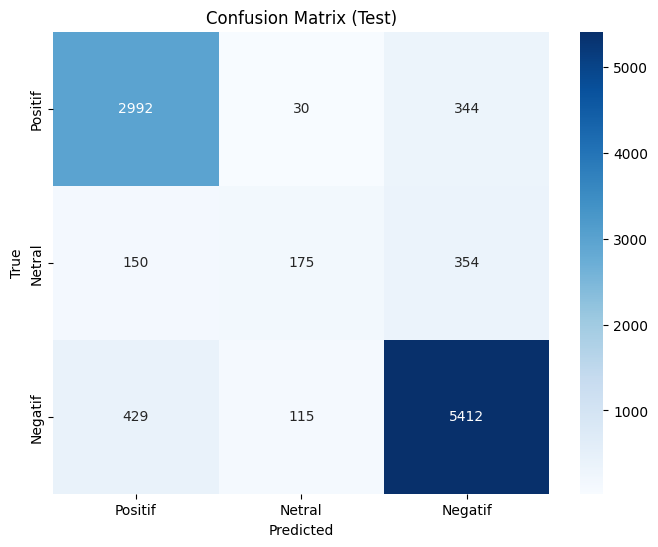

In [38]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluasi Model pada Data Uji
loss, accuracy = model_28.evaluate(X_test_padded, y_test_onehot)
print(f"Loss pada data uji: {loss}")
print(f"Akurasi pada data uji: {accuracy}")

# Membuat Confusion Matrix dan Laporan Klasifikasi
y_pred = model_28.predict(X_test_padded)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test_onehot, axis=1)

# Menghitung confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)
print('Confusion matrix:\n', cm)

# Menghitung metrik evaluasi lainnya
print('Accuracy:', accuracy_score(y_true, y_pred_classes))
print('Precision:', precision_score(y_true, y_pred_classes, average='weighted', zero_division=0))
print('Recall:', recall_score(y_true, y_pred_classes, average='weighted', zero_division=0))
print('F1-score:', f1_score(y_true, y_pred_classes, average='weighted', zero_division=0))
print(classification_report(y_true, y_pred_classes, digits=4))

# Visualisasi confusion matrix
plt.figure(figsize=(8, 6))
class_labels = ['Positif', 'Netral', 'Negatif']
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Test)')
plt.show()

In [39]:
# Definisikan model Sequential
model_29 = Sequential()
# Tambahkan embedding layer
model_29.add(embedding_layer)
# Tambahkan Bidirectional LSTM
model_29.add(Bidirectional(LSTM(150, dropout=0.4, recurrent_dropout=0.4)))
# Tambahkan dense layer
model_29.add(Dense(128, activation="relu"))
# Tambahkan dropout
model_29.add(Dropout(0.5))
# Tambahkan output layer untuk klasifikasi multikelas (3 kelas)
model_29.add(Dense(3, activation="softmax"))
# Kompilasi model
model_29.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

In [40]:
history_29 = model_29.fit(X_train_padded, y_train_onehot, batch_size=64, epochs=15, validation_data=(X_test_padded, y_test_onehot))

Epoch 1/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 163s 249ms/step - accuracy: 0.7687 - loss: 0.5974 - val_accuracy: 0.8496 - val_loss: 0.4025
Epoch 2/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 165s 265ms/step - accuracy: 0.8384 - loss: 0.4360 - val_accuracy: 0.8575 - val_loss: 0.3837
Epoch 3/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 165s 264ms/step - accuracy: 0.8505 - loss: 0.3963 - val_accuracy: 0.8594 - val_loss: 0.3722
Epoch 4/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 165s 264ms/step - accuracy: 0.8582 - loss: 0.3760 - val_accuracy: 0.8616 - val_loss: 0.3671
Epoch 5/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 164s 263ms/step - accuracy: 0.8652 - loss: 0.3575 - val_accuracy: 0.8621 - val_loss: 0.3675
Epoch 6/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 167s 267ms/step - accuracy: 0.8712 - loss: 0.3397 - val_accuracy: 0.8649 - val_loss: 0.3733
Epoch 7/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 178s 285ms/step - accuracy: 0.8714 - loss: 0.3285 - val_accuracy: 0.8635 - val_loss: 0.3817
Epoch 8/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 189s 263ms/step - accuracy: 0.8732 -

In [41]:
# Simpan model
model_29.save('D:\skripsi - Copy\code\model_2\model_29.h5')

313/313 ━━━━━━━━━━━━━━━━━━━━ 13s 42ms/step - accuracy: 0.8362 - loss: 0.5158
Loss pada data uji: 0.41869086027145386
Akurasi pada data uji: 0.8642135858535767
313/313 ━━━━━━━━━━━━━━━━━━━━ 14s 42ms/step
Confusion matrix:
 [[2880   57  429]
 [ 115  200  364]
 [ 274  119 5563]]
Accuracy: 0.8642135786421358
Precision: 0.8538679272245167
Recall: 0.8642135786421358
F1-score: 0.8560954413808877
              precision    recall  f1-score   support

           0     0.8810    0.8556    0.8681      3366
           1     0.5319    0.2946    0.3791       679
           2     0.8752    0.9340    0.9037      5956

    accuracy                         0.8642     10001
   macro avg     0.7627    0.6947    0.7170     10001
weighted avg     0.8539    0.8642    0.8561     10001



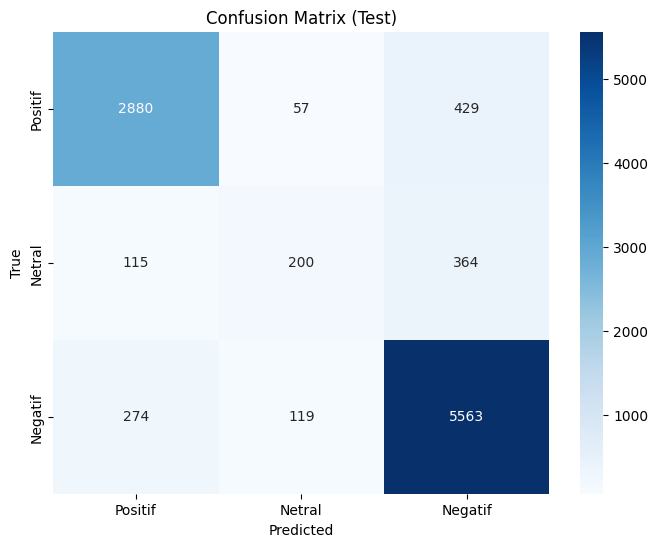

In [42]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluasi Model pada Data Uji
loss, accuracy = model_29.evaluate(X_test_padded, y_test_onehot)
print(f"Loss pada data uji: {loss}")
print(f"Akurasi pada data uji: {accuracy}")

# Membuat Confusion Matrix dan Laporan Klasifikasi
y_pred = model_29.predict(X_test_padded)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test_onehot, axis=1)

# Menghitung confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)
print('Confusion matrix:\n', cm)

# Menghitung metrik evaluasi lainnya
print('Accuracy:', accuracy_score(y_true, y_pred_classes))
print('Precision:', precision_score(y_true, y_pred_classes, average='weighted', zero_division=0))
print('Recall:', recall_score(y_true, y_pred_classes, average='weighted', zero_division=0))
print('F1-score:', f1_score(y_true, y_pred_classes, average='weighted', zero_division=0))
print(classification_report(y_true, y_pred_classes, digits=4))

# Visualisasi confusion matrix
plt.figure(figsize=(8, 6))
class_labels = ['Positif', 'Netral', 'Negatif']
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Test)')
plt.show()

In [19]:
# Definisikan model Sequential
model_30 = Sequential()
# Tambahkan embedding layer
model_30.add(embedding_layer)
# Tambahkan Bidirectional LSTM
model_30.add(Bidirectional(LSTM(150, dropout=0.4, recurrent_dropout=0.4)))
# Tambahkan dense layer
model_30.add(Dense(128, activation="relu"))
# Tambahkan dropout
model_30.add(Dropout(0.5))
# Tambahkan output layer untuk klasifikasi multikelas (3 kelas)
model_30.add(Dense(3, activation="softmax"))
# Kompilasi model
model_30.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

In [20]:
history_30 = model_30.fit(X_train_padded, y_train_onehot, batch_size=64, epochs=20, validation_data=(X_test_padded, y_test_onehot))

Epoch 1/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 332s 475ms/step - accuracy: 0.7702 - loss: 0.5986 - val_accuracy: 0.8430 - val_loss: 0.4200
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 140s 225ms/step - accuracy: 0.8405 - loss: 0.4307 - val_accuracy: 0.8578 - val_loss: 0.3766
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 146s 234ms/step - accuracy: 0.8532 - loss: 0.3936 - val_accuracy: 0.8592 - val_loss: 0.3698
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 148s 236ms/step - accuracy: 0.8594 - loss: 0.3729 - val_accuracy: 0.8596 - val_loss: 0.3723
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 147s 236ms/step - accuracy: 0.8617 - loss: 0.3622 - val_accuracy: 0.8616 - val_loss: 0.3647
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 146s 234ms/step - accuracy: 0.8678 - loss: 0.3465 - val_accuracy: 0.8639 - val_loss: 0.3663
Epoch 7/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 143s 229ms/step - accuracy: 0.8707 - loss: 0.3337 - val_accuracy: 0.8634 - val_loss: 0.3625
Epoch 8/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 148s 237ms/step - accuracy: 0.8775 -

In [21]:
# Simpan model
model_30.save('D:\skripsi - Copy\code\model_2\model_30.h5')

313/313 ━━━━━━━━━━━━━━━━━━━━ 14s 43ms/step - accuracy: 0.8489 - loss: 0.4873
Loss pada data uji: 0.4460890293121338
Akurasi pada data uji: 0.8563143610954285
313/313 ━━━━━━━━━━━━━━━━━━━━ 14s 43ms/step
Confusion matrix:
 [[2960   63  343]
 [ 129  237  313]
 [ 394  195 5367]]
Accuracy: 0.8563143685631437
Precision: 0.8492113593909316
Recall: 0.8563143685631437
F1-score: 0.8519709505152467
              precision    recall  f1-score   support

           0     0.8498    0.8794    0.8644      3366
           1     0.4788    0.3490    0.4037       679
           2     0.8911    0.9011    0.8961      5956

    accuracy                         0.8563     10001
   macro avg     0.7399    0.7098    0.7214     10001
weighted avg     0.8492    0.8563    0.8520     10001



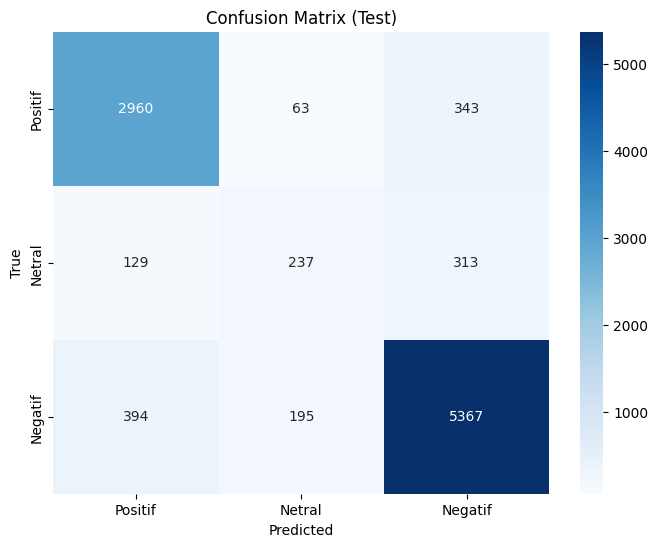

In [22]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluasi Model pada Data Uji
loss, accuracy = model_30.evaluate(X_test_padded, y_test_onehot)
print(f"Loss pada data uji: {loss}")
print(f"Akurasi pada data uji: {accuracy}")

# Membuat Confusion Matrix dan Laporan Klasifikasi
y_pred = model_30.predict(X_test_padded)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test_onehot, axis=1)

# Menghitung confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)
print('Confusion matrix:\n', cm)

# Menghitung metrik evaluasi lainnya
print('Accuracy:', accuracy_score(y_true, y_pred_classes))
print('Precision:', precision_score(y_true, y_pred_classes, average='weighted', zero_division=0))
print('Recall:', recall_score(y_true, y_pred_classes, average='weighted', zero_division=0))
print('F1-score:', f1_score(y_true, y_pred_classes, average='weighted', zero_division=0))
print(classification_report(y_true, y_pred_classes, digits=4))

# Visualisasi confusion matrix
plt.figure(figsize=(8, 6))
class_labels = ['Positif', 'Netral', 'Negatif']
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Test)')
plt.show()

In [23]:
# Definisikan model Sequential
model_31 = Sequential()
# Tambahkan embedding layer
model_31.add(embedding_layer)
# Tambahkan Bidirectional LSTM
model_31.add(Bidirectional(LSTM(150, dropout=0.4, recurrent_dropout=0.4)))
# Tambahkan dense layer
model_31.add(Dense(128, activation="relu"))
# Tambahkan dropout
model_31.add(Dropout(0.5))
# Tambahkan output layer untuk klasifikasi multikelas (3 kelas)
model_31.add(Dense(3, activation="softmax"))
# Kompilasi model
model_31.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

In [24]:
history_31 = model_31.fit(X_train_padded, y_train_onehot, batch_size=64, epochs=25, validation_data=(X_test_padded, y_test_onehot))

Epoch 1/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 172s 267ms/step - accuracy: 0.7697 - loss: 0.5991 - val_accuracy: 0.8487 - val_loss: 0.4092
Epoch 2/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 161s 258ms/step - accuracy: 0.8420 - loss: 0.4327 - val_accuracy: 0.8579 - val_loss: 0.3738
Epoch 3/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 162s 260ms/step - accuracy: 0.8507 - loss: 0.3988 - val_accuracy: 0.8556 - val_loss: 0.3711
Epoch 4/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 164s 262ms/step - accuracy: 0.8581 - loss: 0.3786 - val_accuracy: 0.8602 - val_loss: 0.3748
Epoch 5/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 156s 249ms/step - accuracy: 0.8669 - loss: 0.3562 - val_accuracy: 0.8633 - val_loss: 0.3651
Epoch 6/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 159s 255ms/step - accuracy: 0.8685 - loss: 0.3470 - val_accuracy: 0.8635 - val_loss: 0.3675
Epoch 7/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 156s 250ms/step - accuracy: 0.8709 - loss: 0.3305 - val_accuracy: 0.8629 - val_loss: 0.3688
Epoch 8/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 156s 249ms/step - accuracy: 0.8798 -

In [25]:
# Simpan model
model_31.save('D:\skripsi - Copy\code\model_2\model_31.h5')

313/313 ━━━━━━━━━━━━━━━━━━━━ 13s 43ms/step - accuracy: 0.8319 - loss: 0.5675
Loss pada data uji: 0.4597359001636505
Akurasi pada data uji: 0.8576142191886902
313/313 ━━━━━━━━━━━━━━━━━━━━ 14s 42ms/step
Confusion matrix:
 [[2865   56  445]
 [ 123  220  336]
 [ 290  174 5492]]
Accuracy: 0.8576142385761424
Precision: 0.8487486639710836
Recall: 0.8576142385761424
F1-score: 0.8516355382977717
              precision    recall  f1-score   support

           0     0.8740    0.8512    0.8624      3366
           1     0.4889    0.3240    0.3897       679
           2     0.8755    0.9221    0.8982      5956

    accuracy                         0.8576     10001
   macro avg     0.7461    0.6991    0.7168     10001
weighted avg     0.8487    0.8576    0.8516     10001



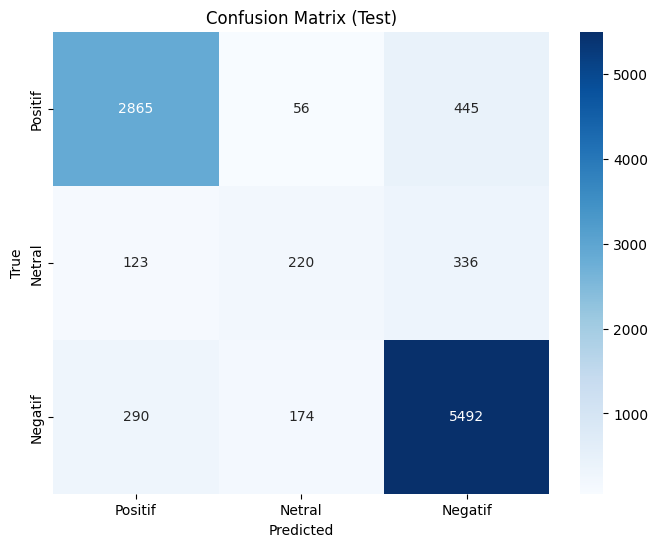

In [26]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluasi Model pada Data Uji
loss, accuracy = model_31.evaluate(X_test_padded, y_test_onehot)
print(f"Loss pada data uji: {loss}")
print(f"Akurasi pada data uji: {accuracy}")

# Membuat Confusion Matrix dan Laporan Klasifikasi
y_pred = model_31.predict(X_test_padded)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test_onehot, axis=1)

# Menghitung confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)
print('Confusion matrix:\n', cm)

# Menghitung metrik evaluasi lainnya
print('Accuracy:', accuracy_score(y_true, y_pred_classes))
print('Precision:', precision_score(y_true, y_pred_classes, average='weighted', zero_division=0))
print('Recall:', recall_score(y_true, y_pred_classes, average='weighted', zero_division=0))
print('F1-score:', f1_score(y_true, y_pred_classes, average='weighted', zero_division=0))
print(classification_report(y_true, y_pred_classes, digits=4))

# Visualisasi confusion matrix
plt.figure(figsize=(8, 6))
class_labels = ['Positif', 'Netral', 'Negatif']
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Test)')
plt.show()

## KESIMPULAN

lstm unit
1. 50=0.8615
2. 100=0.8627
3. 150=0.8632 ***
4. 200=0.8611

dropout bilstm
1. 0.2=0.8593
2. 0.3=0.8600
3. 0.4=0.8637 ***
4. 0.5=0.8622

reccurent dropout
1. 0.2=0.8607
2. 0.3=0.8629
3. 0.4=0.8660 ***   
4. 0.5=0.8619

dense layer
1. 64=0.8652 ***
2. 128=0.8618
3. 256=0.8594
4. 512=0.8629

dropout
1. 0.2=0.8615
2. 0.3=0.8594
3. 0.4=0.8609
4. 0.5=0.8654 ***

learning rate
1. 0.001=0.8631 ***
2. 0.01=0.5955
3. 0.1=0.5955
4. 0.5=0.5955

batch size
1. 64=0.8671 ***
2. 128=0.8645
3. 256=0.8637
4. 512=0.8623

epoch
1. 10=0.8578
2. 15=0.8642 ***
3. 20=0.8563
4. 25=0.8576 

In [30]:
# Definisikan model Sequential
model_bilstm = Sequential()
# Tambahkan embedding layer
model_bilstm.add(embedding_layer)
# Tambahkan Bidirectional LSTM
model_bilstm.add(Bidirectional(LSTM(150, dropout=0.4, recurrent_dropout=0.4)))
# Tambahkan dense layer
model_bilstm.add(Dense(128, activation="relu"))
# Tambahkan dropout
model_bilstm.add(Dropout(0.5))
# Tambahkan output layer untuk klasifikasi multikelas (3 kelas)
model_bilstm.add(Dense(3, activation="softmax"))
# Kompilasi model
model_bilstm.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

In [32]:
history_bilstm = model_bilstm.fit(X_train_padded, y_train_onehot, batch_size=64, epochs=15, validation_data=(X_test_padded, y_test_onehot))

Epoch 1/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 242s 388ms/step - accuracy: 0.7949 - loss: 0.5533 - val_accuracy: 0.8487 - val_loss: 0.4038
Epoch 2/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 163s 261ms/step - accuracy: 0.8408 - loss: 0.4303 - val_accuracy: 0.8570 - val_loss: 0.3804
Epoch 3/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 164s 262ms/step - accuracy: 0.8510 - loss: 0.3974 - val_accuracy: 0.8615 - val_loss: 0.3694
Epoch 4/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 197s 254ms/step - accuracy: 0.8587 - loss: 0.3705 - val_accuracy: 0.8637 - val_loss: 0.3668
Epoch 5/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 207s 331ms/step - accuracy: 0.8628 - loss: 0.3596 - val_accuracy: 0.8615 - val_loss: 0.3661
Epoch 6/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 210s 336ms/step - accuracy: 0.8678 - loss: 0.3409 - val_accuracy: 0.8626 - val_loss: 0.3668
Epoch 7/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 174s 279ms/step - accuracy: 0.8756 - loss: 0.3296 - val_accuracy: 0.8667 - val_loss: 0.3705
Epoch 8/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 192s 263ms/step - accuracy: 0.8768 -

In [41]:
# Simpan model
model_bilstm.save('D:\skripsi - Copy\code\model_2\model_bilstm_fix.h5')

313/313 ━━━━━━━━━━━━━━━━━━━━ 14s 46ms/step - accuracy: 0.8339 - loss: 0.5044
Loss pada data uji: 0.417594313621521
Akurasi pada data uji: 0.8604139685630798
313/313 ━━━━━━━━━━━━━━━━━━━━ 20s 61ms/step
Confusion matrix:
 [[2886   34  446]
 [ 128  171  380]
 [ 305  103 5548]]
Accuracy: 0.8604139586041396
Precision: 0.8487165073299865
Recall: 0.8604139586041396
F1-score: 0.8500633983995366
              precision    recall  f1-score   support

           0     0.8695    0.8574    0.8634      3366
           1     0.5552    0.2518    0.3465       679
           2     0.8704    0.9315    0.8999      5956

    accuracy                         0.8604     10001
   macro avg     0.7650    0.6802    0.7033     10001
weighted avg     0.8487    0.8604    0.8501     10001



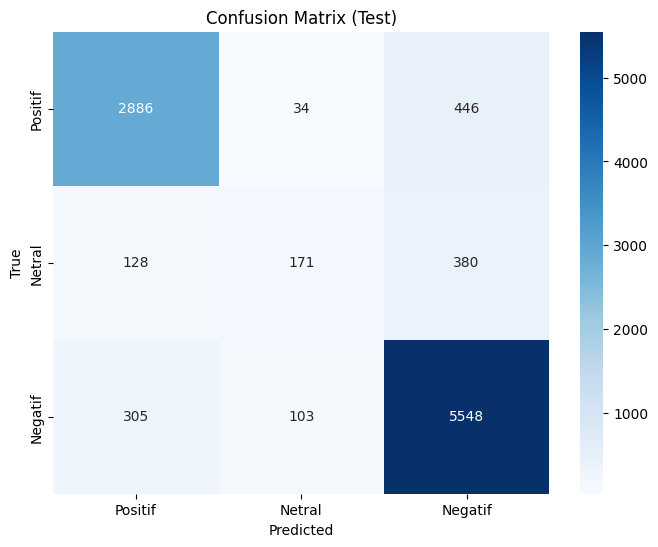

In [34]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluasi Model pada Data Uji
loss, accuracy = model_bilstm.evaluate(X_test_padded, y_test_onehot)
print(f"Loss pada data uji: {loss}")
print(f"Akurasi pada data uji: {accuracy}")

# Membuat Confusion Matrix dan Laporan Klasifikasi
y_pred = model_bilstm.predict(X_test_padded)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test_onehot, axis=1)

# Menghitung confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)
print('Confusion matrix:\n', cm)

# Menghitung metrik evaluasi lainnya
print('Accuracy:', accuracy_score(y_true, y_pred_classes))
print('Precision:', precision_score(y_true, y_pred_classes, average='weighted', zero_division=0))
print('Recall:', recall_score(y_true, y_pred_classes, average='weighted', zero_division=0))
print('F1-score:', f1_score(y_true, y_pred_classes, average='weighted', zero_division=0))
print(classification_report(y_true, y_pred_classes, digits=4))

# Visualisasi confusion matrix
plt.figure(figsize=(8, 6))
class_labels = ['Positif', 'Netral', 'Negatif']
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Test)')
plt.show()

In [ ]:
from tensorflow.keras.models import load_model

# Memuat model yang telah disimpan
model = load_model('D:/skripsi - Copy/code/model_bi-lstm.h5')

In [36]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

def predict_review(review, tokenizer, max_sequence_length, model_bilstm):
    try:
        # Tokenisasi review
        review_tokenized = tokenizer.texts_to_sequences([review])  # Menggunakan tokenizer untuk konversi
        
        # Padding review
        review_padded = pad_sequences(review_tokenized, maxlen=max_sequence_length, padding='post')
        
        # Prediksi menggunakan model
        prediction = model.predict(review_padded)
        
        # Menampilkan hasil prediksi numerik
        print(f"Raw prediction: {prediction}")

        # Konversi probabilitas menjadi kelas
        predicted_class = np.argmax(prediction, axis=1)[0]
        
        # Konversi kelas menjadi label teks
        class_labels = ['Positif', 'Netral', 'Negatif']  # Sesuaikan dengan label kelas
        predicted_label = class_labels[predicted_class]
        
        return predicted_label
    except Exception as e:
        print(f"Error dalam prediksi review: {e}")
        return None

# Implementasi contoh
review_example = "aplikasi ini bagus"
predicted_label = predict_review(review_example, tokenizer, max_sequence_length, model_bilstm)
print(f'\nReview: "{review_example}"\nPredicted Sentiment: {predicted_label}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
Raw prediction: [[0.98674625 0.00502801 0.00822586]]

Review: "aplikasi ini bagus"
Predicted Sentiment: Positif


In [37]:
# Definisikan model Sequential
model_coba = Sequential()
# Tambahkan embedding layer
model_coba.add(embedding_layer)
# Tambahkan Bidirectional LSTM
model_coba.add(Bidirectional(LSTM(150, dropout=0.4, recurrent_dropout=0.4)))
# Tambahkan dense layer
model_coba.add(Dense(128, activation="relu"))
# Tambahkan dropout
model_coba.add(Dropout(0.5))
# Tambahkan output layer untuk klasifikasi multikelas (3 kelas)
model_coba.add(Dense(3, activation="softmax"))
# Kompilasi model
model_coba.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.0005), metrics=['accuracy'])

In [38]:
history_coba= model_coba.fit(X_train_padded, y_train_onehot, batch_size=64, epochs=15, validation_data=(X_test_padded, y_test_onehot))

Epoch 1/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 169s 263ms/step - accuracy: 0.7533 - loss: 0.6368 - val_accuracy: 0.8380 - val_loss: 0.4290
Epoch 2/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 200s 260ms/step - accuracy: 0.8324 - loss: 0.4584 - val_accuracy: 0.8507 - val_loss: 0.3925
Epoch 3/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 193s 245ms/step - accuracy: 0.8452 - loss: 0.4156 - val_accuracy: 0.8549 - val_loss: 0.3826
Epoch 4/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 202s 246ms/step - accuracy: 0.8532 - loss: 0.3913 - val_accuracy: 0.8586 - val_loss: 0.3667
Epoch 5/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 202s 245ms/step - accuracy: 0.8572 - loss: 0.3741 - val_accuracy: 0.8621 - val_loss: 0.3616
Epoch 6/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 201s 244ms/step - accuracy: 0.8604 - loss: 0.3653 - val_accuracy: 0.8628 - val_loss: 0.3693
Epoch 7/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 204s 247ms/step - accuracy: 0.8626 - loss: 0.3552 - val_accuracy: 0.8645 - val_loss: 0.3706
Epoch 8/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 201s 245ms/step - accuracy: 0.8703 -

313/313 ━━━━━━━━━━━━━━━━━━━━ 13s 40ms/step - accuracy: 0.8360 - loss: 0.4636
Loss pada data uji: 0.3833046853542328
Akurasi pada data uji: 0.8644135594367981
313/313 ━━━━━━━━━━━━━━━━━━━━ 17s 53ms/step
Confusion matrix:
 [[2894   33  439]
 [ 130  155  394]
 [ 268   92 5596]]
Accuracy: 0.8644135586441356
Precision: 0.8518362829799495
Recall: 0.8644135586441356
F1-score: 0.8527082704151933
              precision    recall  f1-score   support

           0     0.8791    0.8598    0.8693      3366
           1     0.5536    0.2283    0.3233       679
           2     0.8704    0.9396    0.9037      5956

    accuracy                         0.8644     10001
   macro avg     0.7677    0.6759    0.6988     10001
weighted avg     0.8518    0.8644    0.8527     10001



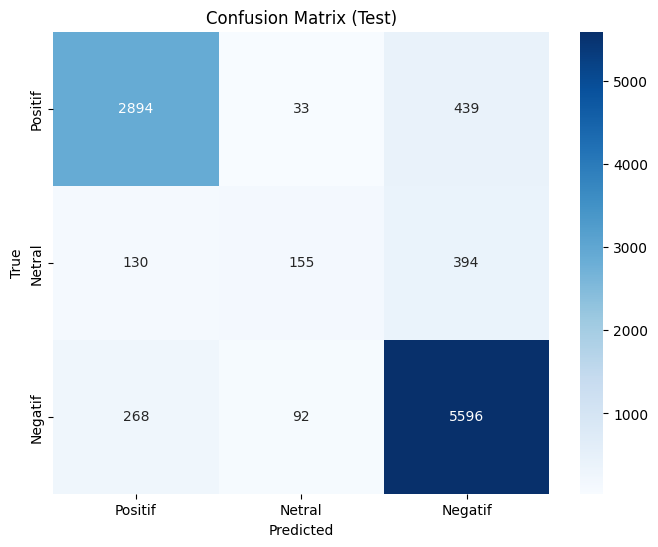

In [39]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluasi Model pada Data Uji
loss, accuracy = model_coba.evaluate(X_test_padded, y_test_onehot)
print(f"Loss pada data uji: {loss}")
print(f"Akurasi pada data uji: {accuracy}")

# Membuat Confusion Matrix dan Laporan Klasifikasi
y_pred = model_coba.predict(X_test_padded)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test_onehot, axis=1)

# Menghitung confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)
print('Confusion matrix:\n', cm)

# Menghitung metrik evaluasi lainnya
print('Accuracy:', accuracy_score(y_true, y_pred_classes))
print('Precision:', precision_score(y_true, y_pred_classes, average='weighted', zero_division=0))
print('Recall:', recall_score(y_true, y_pred_classes, average='weighted', zero_division=0))
print('F1-score:', f1_score(y_true, y_pred_classes, average='weighted', zero_division=0))
print(classification_report(y_true, y_pred_classes, digits=4))

# Visualisasi confusion matrix
plt.figure(figsize=(8, 6))
class_labels = ['Positif', 'Netral', 'Negatif']
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Test)')
plt.show()

In [22]:
# from tensorflow.keras.callbacks import ModelCheckpoint

# # Menyimpan model di setiap epoch
# checkpoint_callback = ModelCheckpoint(
#     filepath='/content/drive/MyDrive/SKRIPSI/Code/checkpoints/model_{epoch:02d}.h5',
#     save_weights_only=True,
#     save_freq='epoch'
# )

In [23]:
# from bayes_opt import BayesianOptimization
# import numpy as np
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Bidirectional, LSTM, Dense, Dropout
# from tensorflow.keras.optimizers import Adam
# from sklearn.metrics import confusion_matrix, classification_report

# # Daftar nilai parameter tetap
# epochs_values = [10, 15, 20, 25]
# lstm_units_values = [50, 100, 150, 200]
# dense_units_values = [64, 128, 256, 512]
# dropout_rate_values = [0.2, 0.3, 0.4, 0.5]
# learning_rate_values = [0.001, 0.01, 0.1, 0.05]
# batch_size_values = [64, 128, 256, 512]

# # Fungsi untuk membuat dan melatih model
# def train_model(lstm_units, dense_units, dropout_rate, learning_rate, batch_size, epochs_idx):
#     epochs = epochs_values[int(epochs_idx)]  # Ambil nilai epochs dari indeks
#     model = Sequential()
#     model.add(embedding_layer)  # Menggunakan embedding layer dari Word2Vec
#     model.add(Bidirectional(LSTM(int(lstm_units), dropout=dropout_rate, recurrent_dropout=dropout_rate)))
#     model.add(Dense(int(dense_units), activation="relu"))
#     model.add(Dropout(dropout_rate))
#     model.add(Dense(1, activation="sigmoid"))  # Untuk klasifikasi biner
#     optimizer = Adam(learning_rate=learning_rate)
#     model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    
#     model.fit(X_train, y_train, batch_size=int(batch_size), epochs=int(epochs), validation_split=0.2, verbose=0)
    
#     loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
#     return accuracy

# # Fungsi untuk Bayesian Optimization
# def bayesian_opt(lstm_units, dense_units, dropout_rate, learning_rate, batch_size, epochs_idx):
#     return train_model(lstm_units, dense_units, dropout_rate, learning_rate, batch_size, epochs_idx)

# # Batasan parameter untuk optimasi
# pbounds = {
#     'lstm_units': (50, 200),
#     'dense_units': (64, 512),
#     'dropout_rate': (0.2, 0.5),
#     'learning_rate': (0.001, 0.1),
#     'batch_size': (64, 512),
#     'epochs_idx': (0, len(epochs_values) - 1)  # Indeks untuk epochs_values
# }

# optimizer = BayesianOptimization(
#     f=bayesian_opt,
#     pbounds=pbounds,
#     random_state=42,
#     verbose=2
# )

# # Jalankan optimasi
# optimizer.maximize(
#     init_points=10,  # Jumlah iterasi awal dengan parameter acak
#     n_iter=50  # Jumlah iterasi Bayesian Optimization
# )

# # Dapatkan parameter terbaik
# best_params = optimizer.max['params']
# best_params['epochs'] = epochs_values[int(best_params.pop('epochs_idx'))]  # Konversi indeks ke nilai epochs
# print(f'Best Parameters: {best_params}')


In [24]:
# from bayes_opt import BayesianOptimization

# # Daftar nilai parameter

# lstm_units_values = [50, 100, 150, 200]
# dense_units_values = [64, 128, 256, 512]
# dropout_rate_values = [0.2, 0.3, 0.4, 0.5]
# learning_rate_values = [0.001, 0.01, 0.1, 0.05]
# batch_size_values = [64, 128, 256, 512]
# epochs_values = [10, 15, 20, 25]

# # Fungsi untuk membuat model
# def build_model(lstm_units, dense_units, dropout_rate, learning_rate):
#     model = Sequential()
#     model.add(embedding_layer)  # Menggunakan embedding layer dari Word2Vec
#     model.add(Bidirectional(LSTM(units=int(lstm_units), dropout=dropout_rate, recurrent_dropout=dropout_rate)))
#     model.add(Dense(units=int(dense_units), activation="relu"))
#     model.add(Dropout(rate=dropout_rate))
#     model.add(Dense(1, activation="sigmoid"))  # Untuk klasifikasi biner
#     optimizer = Adam(learning_rate=learning_rate)
#     model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
#     return model

# # Fungsi untuk mengoptimasi model
# def optimize_model(lstm_units_idx, dense_units_idx, dropout_rate, learning_rate_idx, batch_size_idx, epochs_idx):
#     lstm_units = lstm_units_values[int(lstm_units_idx)]
#     dense_units = dense_units_values[int(dense_units_idx)]
#     learning_rate = learning_rate_values[int(learning_rate_idx)]
#     batch_size = batch_size_values[int(batch_size_idx)]
#     epochs = epochs_values[int(epochs_idx)]
    
#     model = build_model(lstm_units, dense_units, dropout_rate, learning_rate)
#     history = model.fit(X_train, y_train, validation_split=0.2, epochs=int(epochs), batch_size=int(batch_size), verbose=0)
#     val_accuracy = max(history.history['val_accuracy'])
#     return val_accuracy

# # Batasan parameter
# pbounds = {
#     'lstm_units_idx': (0, len(lstm_units_values) - 1),
#     'dense_units_idx': (0, len(dense_units_values) - 1),
#     'dropout_rate': (0.2, 0.5),  # Rentang nilai untuk dropout_rate
#     'learning_rate_idx': (0, len(learning_rate_values) - 1),
#     'batch_size_idx': (0, len(batch_size_values) - 1),
#     'epochs_idx': (0, len(epochs_values) - 1)
# }

# # Membuat optimizer Bayesian
# optimizer = BayesianOptimization(
#     f=optimize_model,
#     pbounds=pbounds,
#     random_state=42,
#     verbose=2
# )

# # Melakukan optimasi
# optimizer.maximize(
#     init_points=5,
#     n_iter=20
# )

# # Menampilkan hasil terbaik
# best_params_idx = optimizer.max['params']
# best_params = {
#     'lstm_units': lstm_units_values[int(best_params_idx['lstm_units_idx'])],
#     'dense_units': dense_units_values[int(best_params_idx['dense_units_idx'])],
#     'dropout_rate': best_params_idx['dropout_rate'],  # Nilai dropout_rate tidak perlu dikonversi
#     'learning_rate': learning_rate_values[int(best_params_idx['learning_rate_idx'])],
#     'batch_size': batch_size_values[int(best_params_idx['batch_size_idx'])],
#     'epochs': epochs_values[int(best_params_idx['epochs_idx'])]
# }

# # Cetak hyperparameters terbaik
# print(f'Best Hyperparameters: {best_params}')

In [25]:
# # Install keras-tuner jika belum diinstal

# import keras_tuner as kt

# # Fungsi untuk membuat model dengan hyperparameter
# def build_model(hp):
#     model = Sequential()
#     model.add(embedding_layer)  # Menggunakan embedding layer dari Word2Vec
#     model.add(Bidirectional(LSTM(units=hp.Choice('hidden_units', values=[32, 64, 128, 160, 192, 224, 256, 288, 320, 352, 384, 416, 448, 480, 512]),
#                                   dropout=hp.Choice('dropout_bilstm', values=[0.2, 0.3, 0.4, 0.5]),
#                                   recurrent_dropout=hp.Choice('recurrent_dropout_bilstm', values=[0.2, 0.3, 0.4, 0.5]))))
#     model.add(Dense(units=hp.Choice('dense_units', values=[32, 64, 96, 128, 160, 192, 224, 256, 288, 320, 352, 384, 416, 448, 480, 512]), activation="relu"))
#     model.add(Dropout(rate=hp.Choice('dropout', values=[0.2, 0.3, 0.4, 0.5])))
#     model.add(Dense(1, activation="sigmoid"))  # Untuk klasifikasi biner
#     optimizer = Adam(learning_rate=hp.Float('learning_rate', min_value=0.001, max_value=0.1, sampling='log'))
#     model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
#     return model

# # Inisialisasi tuner
# tuner = kt.RandomSearch(build_model,
#                         objective='val_accuracy',
#                         max_trials=50,
#                         executions_per_trial=1,
#                         directory='random_search_dir',
#                         project_name='random_search_project')

# # Rentang nilai hyperparameter
# param_grid = {
#     'epochs': [10, 15, 20, 25],
#     'batch_size': [32, 64, 96, 128, 256]
# }

# # Melakukan pencarian hyperparameter
# for batch_size in param_grid['batch_size']:
#     for epochs in param_grid['epochs']:
#         print(f"Evaluating combination: Batch size={batch_size}, Epochs={epochs}")
#         tuner.search(X_train, y_train, epochs=epochs, validation_split=0.2, batch_size=batch_size)

# # Mendapatkan hyperparameter terbaik
# best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# # Membangun model dengan hyperparameter terbaik
# model = tuner.hypermodel.build(best_hps)
# history = model.fit(X_train, y_train, epochs=best_hps.get('epochs', 20), validation_split=0.2, batch_size=best_hps.get('batch_size', 32))

# # Menentukan epoch terbaik berdasarkan akurasi validasi
# val_acc_per_epoch = history.history['val_accuracy']
# best_epoch = val_acc_per_epoch.index(max(val_acc_per_epoch)) + 1
# print(f'Best epoch: {best_epoch}')

# print(f'Best hyperparameters: {best_hps}')

# Install keras-tuner jika belum diinstal
import keras_tuner as kt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Bidirectional, LSTM, Dropout
from tensorflow.keras.optimizers import Adam

# Fungsi untuk membuat model dengan hyperparameter
def build_model(hp):
    model = Sequential()
    model.add(embedding_layer)  # Menggunakan embedding layer dari Word2Vec
    model.add(Bidirectional(LSTM(units=hp.Choice('hidden_units', values=[32, 64, 96, 128, 160, 192, 224, 256, 288, 320, 352, 384, 416, 448, 480, 512]),
                                  dropout=hp.Choice('dropout_bilstm', values=[0.2, 0.3, 0.4, 0.5]),
                                  recurrent_dropout=hp.Choice('recurrent_dropout_bilstm', values=[0.2, 0.3, 0.4, 0.5]))))
    model.add(Dense(units=hp.Choice('dense_units', values=[32, 64, 96, 128, 160, 192, 224, 256, 288, 320, 352, 384, 416, 448, 480, 512]), activation="relu"))
    model.add(Dropout(rate=hp.Choice('dropout', values=[0.2, 0.3, 0.4, 0.5])))
    model.add(Dense(1, activation="sigmoid"))  # Untuk klasifikasi biner
    optimizer = Adam(learning_rate=hp.Choice('learning_rate', values=[0.001, 0.01, 0.05, 0.1]))
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Inisialisasi tuner
tuner = kt.RandomSearch(build_model,
                        objective='val_accuracy',
                        max_trials=50,
                        executions_per_trial=1,
                        directory='random_search_dir',
                        project_name='random_search_project')

# Melakukan pencarian hyperparameter
tuner.search(X_train, y_train, validation_split=0.2,
             batch_size=kt.HyperParameters().Choice('batch_size', values=[32, 64, 96, 128]),
             epochs=kt.HyperParameters().Choice('epochs', values=[10, 15, 20, 25]))

# Mendapatkan hyperparameter terbaik
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Membangun model dengan hyperparameter terbaik
model = tuner.hypermodel.build(best_hps)
history = model.fit(X_train, y_train, epochs=best_hps.get('epochs'), validation_split=0.2, batch_size=best_hps.get('batch_size'))

# Menampilkan hyperparameter terbaik
print(f'Best hyperparameters: {best_hps}')


Trial 10 Complete [05h 30m 46s]
val_accuracy: 0.0

Best val_accuracy So Far: 1.0
Total elapsed time: 21h 45m 58s

Search: Running Trial #11

Value             |Best Value So Far |Hyperparameter
224               |416               |hidden_units
0.4               |0.2               |dropout_bilstm
0.2               |0.4               |recurrent_dropout_bilstm
64                |352               |dense_units
0.3               |0.3               |dropout
0.031018          |0.077187          |learning_rate

Epoch 1/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 468s 449ms/step - accuracy: 0.6055 - loss: 0.6773 - val_accuracy: 0.9521 - val_loss: 0.5589
Epoch 2/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 446s 446ms/step - accuracy: 0.6173 - loss: 0.6341 - val_accuracy: 0.0000e+00 - val_loss: 0.8302
Epoch 3/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 444s 444ms/step - accuracy: 0.5441 - loss: 0.6896 - val_accuracy: 0.0000e+00 - val_loss: 0.8371
Epoch 4/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 446s 446ms/step - accuracy: 0.5482 - l

In [133]:
import numpy as np
import random
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, LSTM, Dense, Dropout, Embedding
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

# Parameter grid
param_grid = {
    'lstm_units': [32, 64, 256, 512],
    'dense_units': [64, 128, 256, 512],
    'dropout_rate': [0.2, 0.3, 0.4, 0.5],
    'bilstm_dropout_rate': [0.2, 0.3, 0.4, 0.5],  # Dropout untuk Bi-LSTM
    'bilstm_recurrent_dropout_rate': [0.2, 0.3, 0.4, 0.5],  # Recurrent dropout untuk Bi-LSTM
    'learning_rate': [0.001, 0.01, 0.1, 0.5],
    'batch_size': [32, 64, 96, 128],
    'epochs': [10, 15, 20, 25]
}

# Fungsi untuk membuat model
def create_model(lstm_units, dense_units, bilstm_dropout_rate, bilstm_recurrent_dropout_rate, dropout_rate, learning_rate):
    model = Sequential()
    model.add(embedding_layer)  # Menggunakan embedding layer dari Word2Vec
    model.add(Bidirectional(
        LSTM(lstm_units,
             dropout=bilstm_dropout_rate,
             recurrent_dropout=bilstm_recurrent_dropout_rate
        )
    ))
    model.add(Dense(dense_units, activation="relu"))
    model.add(Dropout(dropout_rate))
    model.add(Dense(3, activation="softmax"))  # Untuk klasifikasi multi-class
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Inisialisasi variabel untuk menyimpan hasil terbaik
best_accuracy = 0
best_params = {}


# Loop melalui 50 percobaan acak
for _ in range(50):
    lstm_units = random.choice(param_grid['lstm_units'])
    dense_units = random.choice(param_grid['dense_units'])
    bilstm_dropout_rate = random.choice(param_grid['bilstm_dropout_rate'])
    bilstm_recurrent_dropout_rate = random.choice(param_grid['bilstm_recurrent_dropout_rate'])
    dropout_rate = random.choice(param_grid['dropout_rate'])
    learning_rate = random.choice(param_grid['learning_rate'])
    batch_size = random.choice(param_grid['batch_size'])
    epochs = random.choice(param_grid['epochs'])
    
    print(f"Evaluating combination: LSTM units={lstm_units}, Dense units={dense_units}, Bi-LSTM dropout={bilstm_dropout_rate}, Bi-LSTM recurrent dropout={bilstm_recurrent_dropout_rate}, Dropout={dropout_rate}, Learning rate={learning_rate}, Batch size={batch_size}, Epochs={epochs}")
    
    model = create_model(lstm_units, dense_units, bilstm_dropout_rate, bilstm_recurrent_dropout_rate, dropout_rate, learning_rate)
    model.fit(X_train_padded, y_train_encoded, batch_size=batch_size, epochs=epochs, validation_data=(X_test_padded, y_test_encoded), verbose=1)
    accuracy = model.evaluate(X_test_padded, y_test_encoded, verbose=1)[1]
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_params = {
            'lstm_units': lstm_units,
            'dense_units': dense_units,
            'bilstm_dropout_rate': bilstm_dropout_rate,
            'bilstm_recurrent_dropout_rate': bilstm_recurrent_dropout_rate,
            'dropout_rate': dropout_rate,
            'learning_rate': learning_rate,
            'batch_size': batch_size,
            'epochs': epochs
        }
        print(f"New best accuracy: {best_accuracy:.4f} with params: {best_params}")

print(f"Best accuracy: {best_accuracy:.4f} with params: {best_params}")





Evaluating combination: LSTM units=512, Dense units=64, Bi-LSTM dropout=0.3, Bi-LSTM recurrent dropout=0.4, Dropout=0.4, Learning rate=0.1, Batch size=128, Epochs=10


ValueError: Unrecognized data type: x=[[    2     1    10 ...     0     0     0]
 [   47     4  1103 ...     0     0     0]
 [    4    25  2637 ...     0     0     0]
 ...
 [   22   174  1241 ...     0     0     0]
 [ 9876    39    64 ...     0     0     0]
 [   99  1194 22811 ...     0     0     0]] (of type <class 'numpy.ndarray'>)

In [135]:
import numpy as np

# Mengonversi data dari list ke numpy array
X_train_padded = np.array(X_train_padded)
y_train_encoded = np.array(y_train_encoded)
X_test_padded = np.array(X_test_padded)
y_test_encoded = np.array(y_test_encoded)

# Sekarang Anda dapat memeriksa bentuk data
print(f"X_train_padded shape: {X_train_padded.shape}")
print(f"y_train_encoded shape: {y_train_encoded.shape}")
print(f"X_test_padded shape: {X_test_padded.shape}")
print(f"y_test_encoded shape: {y_test_encoded.shape}")

X_train_padded shape: (39999, 114)
y_train_encoded shape: (39999,)
X_test_padded shape: (10001, 114)
y_test_encoded shape: (10001,)
y_test_encoded shape: (10001,)


In [54]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

# Definisikan fungsi predict_review
def predict_review(review):
    # Tokenisasi review
    review_tokenized = [token_dict.get(word, 0) for word in review.split()]  # Default to 0 for unknown words
    # Padding review
    review_padded = pad_sequences([review_tokenized], maxlen=max_sequence_length, padding='post')
    # Prediksi menggunakan model
    prediction = model.predict(review_padded)
    # Konversi probabilitas menjadi kelas
    predicted_class = np.argmax(prediction, axis=1)[0]
    # Konversi kelas menjadi label teks
    class_labels = ['negatif', 'netral', 'positif']  # Sesuaikan dengan label kelas Anda
    predicted_label = class_labels[predicted_class]
    return predicted_label

# Implementasi contoh
review_example = ""
predicted_label = predict_review(review_example)
print(f'\nReview: "{review_example}"\nPredicted Sentiment: {predicted_label}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step

Review: "Kok tidak bisa buat pesanan?? padahal udah di update lagi lho. Sy udah pilih barang, masukkan ke keranjang, lalu checkout. Pas mau buat pesanan, tombol buat pesanannya tidak muncul (berwarna abu2, tidak bs diklik). Saya coba buat pesanan lain di toko lain, sama juga.. ðŸ˜‘"
Predicted Sentiment: negatif
